### **1.Import Python Libraries:**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools
%matplotlib inline

# setting up plot style
style.use('seaborn-poster')
style.use('fivethirtyeight')


<ipython-input-1-0ea1bc90fd02>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-poster')


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

## **2.Reading & Understanding the data**



**2.1  Importing the input files**

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
applicationDF = pd.read_csv('application_data.csv')
previousDF = pd.read_csv('previous_application.csv')
applicationDF.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI FONDKAPREMONT_MODE  HOUSETYPE_MODE  TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120          NaN         1.0             1.0              0.0               1.0         1.0         0.0        Laborers              1.0                   2.0                          2.0                  WEDNESDAY                     10.0                         0.0                         0.0                          0.0                     0.0                     0.0                      0.0  Business Entity Type 3      0.083037      0.262949      0.139376          0.0247            0.0369                       0.9722           0.6192          0.0143           0.00         0.0690         0.0833         0.1250        0.0369                0.0202          0.0190                   0.0000             0.0000           0.0252             0.0383                        0.9722            0.6341           0.0144          0.0000          0.0690          0.0833          0.1250         0.0377                  0.022           0.0198                       0.0                 0.0           0.0250             0.0369                        0.9722            0.6243           0.0144            0.00          0.0690          0.0833          0.1250         0.0375                 0.0205           0.0193                    0.0000                0.00   reg oper account  block of flats          0.0149       Stone, brick       

In [ ]:
previousDF.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1                0.0               0.182832                  0.867336                    XAP             Approved          -73.0  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide              35.0         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved         -164.0                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center              -1.0                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved         -301.0  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices              -1.0                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved         -512.0  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices              -1.0                  XNA         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs              Refused         -781.0  Cash through the bank   

**2.2 Inspect Data Frames**


In [ ]:
print("Database dimension - applicationDF     :",applicationDF.shape)
print("Database dimension - previousDF        :",previousDF.shape)

#Database size
print("Database size - applicationDF          :",applicationDF.size)
print("Database size - previousDF             :",previousDF.size)

Database dimension - applicationDF     : (176680, 122)
Database dimension - previousDF        : (8465, 37)
Database size - applicationDF          : 21554960
Database size - previousDF             : 313205


In [ ]:
applicationDF.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176680 entries, 0 to 176679
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [ ]:
previousDF.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_PREV                   8465 non-null   int64  
 1   SK_ID_CURR                   8465 non-null   int64  
 2   NAME_CONTRACT_TYPE           8465 non-null   object 
 3   AMT_ANNUITY                  6758 non-null   float64
 4   AMT_APPLICATION              8465 non-null   float64
 5   AMT_CREDIT                   8465 non-null   float64
 6   AMT_DOWN_PAYMENT             4395 non-null   float64
 7   AMT_GOODS_PRICE              6750 non-null   float64
 8   WEEKDAY_APPR_PROCESS_START   8465 non-null   object 
 9   HOUR_APPR_PROCESS_START      8465 non-null   int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  8465 non-null   object 
 11  NFLAG_LAST_APPL_IN_DAY       8465 non-null   int64  
 12  RATE_DOWN_PAYMENT            4395 non-null   float64
 13  RATE_INTEREST_PRIM

In [ ]:
applicationDF.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH   OWN_CAR_AGE     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI  TOTALAREA_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
count  176680.000000  176680.000000  176680.000000      1.766800e+05  1.766800e+05  176672.000000     1.765370e+05               176680.000000  176680.000000  176680.000000      176680.000000    176680.000000  60016.000000  176679.000000   176679.000000    176679.000000     176679.000000  176679.000000  176679.000000    176678.000000         176679.000000                176679.000000            176679.000000               176679.000000               176679.000000                176679.000000           176679.000000           176679.000000            176679.000000  77201.000000  1.762970e+05  141658.000000    86815.000000      73159.000000                 90342.000000     59155.000000    53127.000000   82382.000000   87560.000000   88601.000000   56744.000000  71697.000000          55817.000000    87826.000000             53957.000000       79055.000000     86815.000000       73159.000000                  90342.000000      59155.000000     53127.000000    82382.000000    87560.000000    88601.000000    56744.000000   71697.000000           55817.000000     87826.000000              53957.000000        79055.000000     86815.000000       73159.000000                  90342.000000      59155.000000     53127.000000    82382.000000    87560.000000    88601.000000    56744.000000   71697.000000           55817.000000     87826.000000              53957.000000        79055.000000    91214.000000             176094.000000             176094.000000             176094.000000             176094.000000           176678.000000    176679.000000    176679.000000    176679.000000    176679.000000    176679.000000    176679.000000    176679.000000    176679.000000     176679.000000     176679.000000     176679.000000     176679.000000     176679.000000     176679.000000     176679.000000     176679.000000     176679.000000     176679.000000     176679.000000     176679.000000               152909.000000              152909.000000     

In [ ]:
previousDF.describe()

SK_ID_PREV     SK_ID_CURR    AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
count  8.465000e+03    8465.000000    6758.000000     8.465000e+03  8.465000e+03       4395.000000     6.750000e+03              8465.000000             8465.000000        4395.000000              36.000000                 36.000000    8464.000000      8.464000e+03  6757.000000         5297.000000     5297.000000                5297.000000    5297.000000       5297.000000                5297.000000
mean   1.922164e+06  280375.319905   14929.829900     1.628921e+05  1.823300e+05       6535.029317     2.042787e+05                12.554991                0.996929           0.079535               0.209529                  0.792371    -909.297023      8.477363e+02    15.209708       344714.242024    14662.528412               30940.946951   75397.747215      80042.074571                   0.303757
std    5.367953e+05  102853.570315   13894.798081     2.705861e+05  2.976771e+05      16635.119286     2.887325e+05                 3.316031                0.055339           0.107990               0.120888                  0.093239     791.197295      4.350041e+04    13.596289        84238.710300    74363.374736              102861.085660  148827.174697     152036.551492                   0.459922
min    1.000140e+06  100035.000000       0.000000     0.000000e+00  0.000000e+00          0.000000     0.000000e+00                 1.000000                0.000000           0.000000               0.142440                  0.568710   -2920.000000     -1.000000e+00     0.000000        -2888.000000    -2889.000000               -2783.000000   -2829.000000      -2726.000000                   0.000000
25%    1.457145e+06  192458.000000    6079.533750     2.407910e+04  2.766600e+04          0.000000     4.892175e+04                10.000000                1.000000           0.000000               0.160716                  0.715645   -1373.250000     -1.000000e+00     6.000000       365243.000000    -1626.000000               -1289.000000   -1338.000000      -1302.000000                   0.000000
50%    1.914944e+06  279571.000000   10526.422500     7.150500e+04  7.810200e+04       1570.500000     9.895500e+04                12.000000                1.000000           0.048451               0.189136                  0.835095    -605.000000      2.000000e+01    12.000000       365243.000000     -811.000000                -376.000000    -537.000000       -501.000000                   0.000000
75%    2.389371e+06  371084.000000   18979.526250     1.644300e+05  1.819845e+05       7947.000000     2.225340e+05                15.000000                1.000000           0.108913               0.193333                  0.856237    -296.000000      1.290000e+02    18.000000       365243.000000     -395.000000                  99.000000     -76.000000        -52.000000                   1.000000
max    2.845356e+06  456254.000000  204635.790000     2.700000e+06  3.020760e+06     489600.000000     2.700000e+06                22.000000                1.000000           0.818315               0.696163                  0.867336      -2.000000      4.000000e+06    60.000000       365243.000000   365243.000000              365243.000000  365243.000000     365243.000000                   1.000000

## **3.Data Cleaning & Manipulation**



**3.1 Null Value Calculation**


3.1.1 applicationDF Missing values


<Axes: >

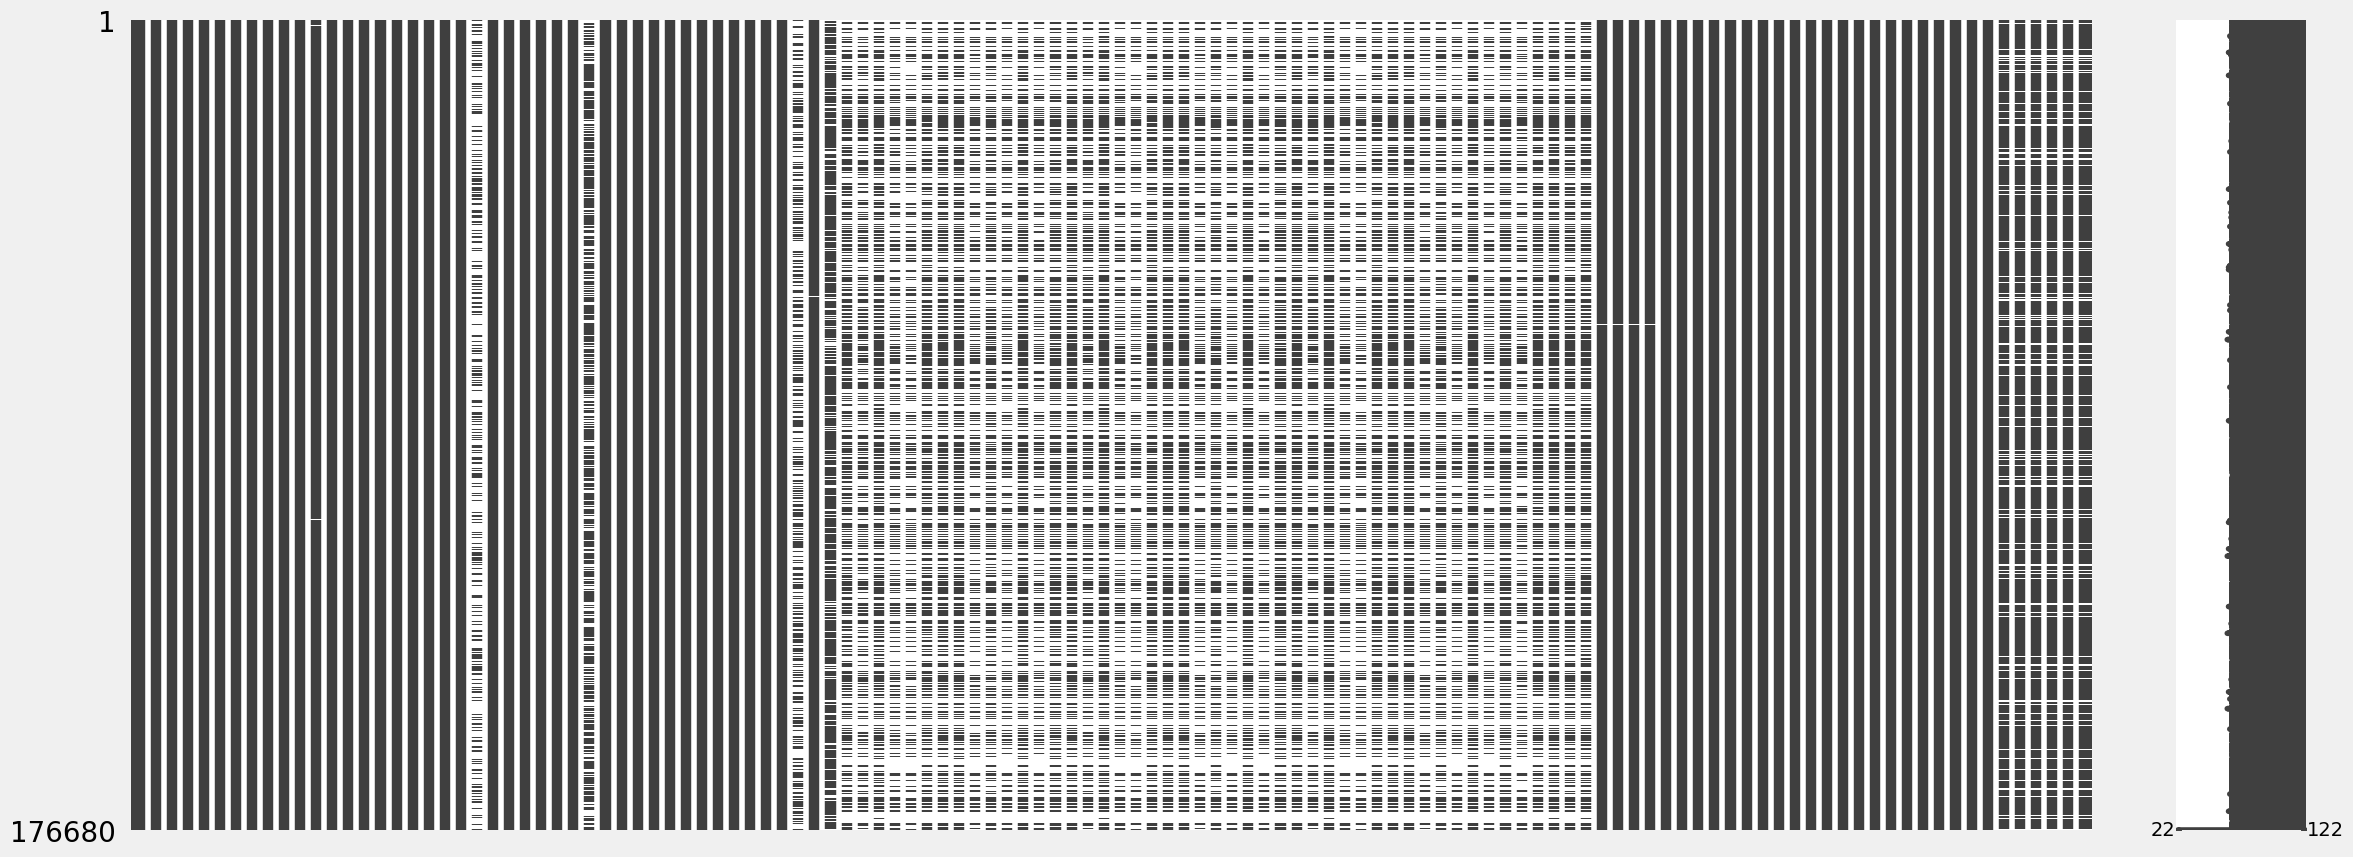

In [ ]:
import missingno as mn
mn.matrix(applicationDF)

In [ ]:
round(applicationDF.isnull().sum() / applicationDF.shape[0] * 100.00,2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.08
NAME_TYPE_SUITE                  0.40
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     66.03
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

**Let's plot the columns vs missing value % with 40% being the cut-off marks**


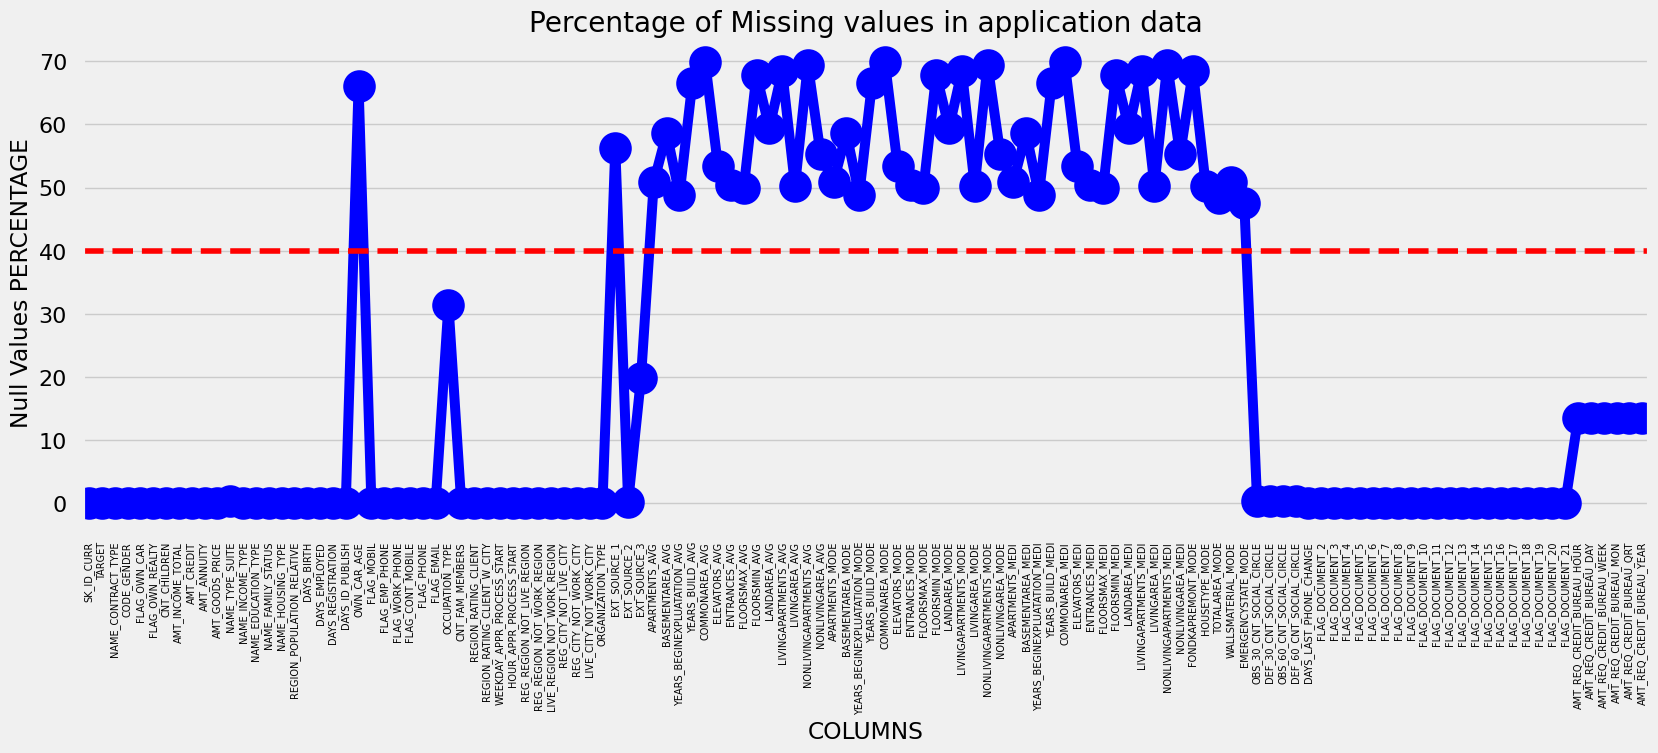

In [ ]:
null_applicationDF = pd.DataFrame((applicationDF.isnull().sum())*100/applicationDF.shape[0]).reset_index()
null_applicationDF.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_applicationDF,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

Let's check the columns which has more than 40% missing values


In [ ]:
nullcol_40_application = null_applicationDF[null_applicationDF["Null Values Percentage"]>=40]
nullcol_40_application


Column Name  Null Values Percentage
21                   OWN_CAR_AGE               66.031243
41                  EXT_SOURCE_1               56.304619
44                APARTMENTS_AVG               50.863142
45              BASEMENTAREA_AVG               58.592370
46   YEARS_BEGINEXPLUATATION_AVG               48.866878
47               YEARS_BUILD_AVG               66.518565
48                COMMONAREA_AVG               69.930383
49                 ELEVATORS_AVG               53.372198
50                 ENTRANCES_AVG               50.441476
51                 FLOORSMAX_AVG               49.852275
52                 FLOORSMIN_AVG               67.883179
53                  LANDAREA_AVG               59.419855
54          LIVINGAPARTMENTS_AVG               68.407856
55                LIVINGAREA_AVG               50.290921
56       NONLIVINGAPARTMENTS_AVG               69.460607
57             NONLIVINGAREA_AVG               55.255264
58               APARTMENTS_MODE               50.863142
59             BASEMENTAREA_MODE               58.592370
60  YEARS_BEGINEXPLUATATION_MODE               48.866878
61              YEARS_BUILD_MODE               66.518565
62               COMMONAREA_MODE               69.930383
63                ELEVATORS_MODE               53.372198
64                ENTRANCES_MODE               50.441476
65                FLOORSMAX_MODE               49.852275
66                FLOORSMIN_MODE               67.883179
67                 LANDAREA_MODE               59.419855
68         LIVINGAPARTMENTS_MODE               68.407856
69               LIVINGAREA_MODE               50.290921
70      NONLIVINGAPARTMENTS_MODE               69.460607
71            NONLIVINGAREA_MODE               55.255264
72               APARTMENTS_MEDI               50.863142
73             BASEMENTAREA_MEDI               58.592370
74  YEARS_BEGINEXPLUATATION_MEDI               48.866878
75              YEARS_BUILD_MEDI               66.518565
76               COMMONAREA_MEDI               69.930383
77                ELEVATORS_MEDI               53.372198
78                ENTRANCES_MEDI               50.441476
79                FLOORSMAX_MEDI               49.852275
80                FLOORSMIN_MEDI               67.883179
81                 LANDAREA_MEDI               59.419855
82         LIVINGAPARTMENTS_MEDI               68.407856
83               LIVINGAREA_MEDI               50.290921
84      NONLIVINGAPARTMENTS_MEDI               69.460607
85            NONLIVINGAREA_MEDI               55.255264
86            FONDKAPREMONT_MODE               68.403328
87                HOUSETYPE_MODE               50.293751
88                TOTALAREA_MODE               48.373330
89            WALLSMATERIAL_MODE               50.915214
90           EMERGENCYSTATE_MODE               47.505094

In [ ]:
len(nullcol_40_application)

49

*Total of 49 columns are there which have more than 40% null values.Seems like most of the columns with high missing values are related to different area sizes on apartment owned/rented by the loan applicant*


**3.1.2 previousDF Missing Values**




<Axes: >

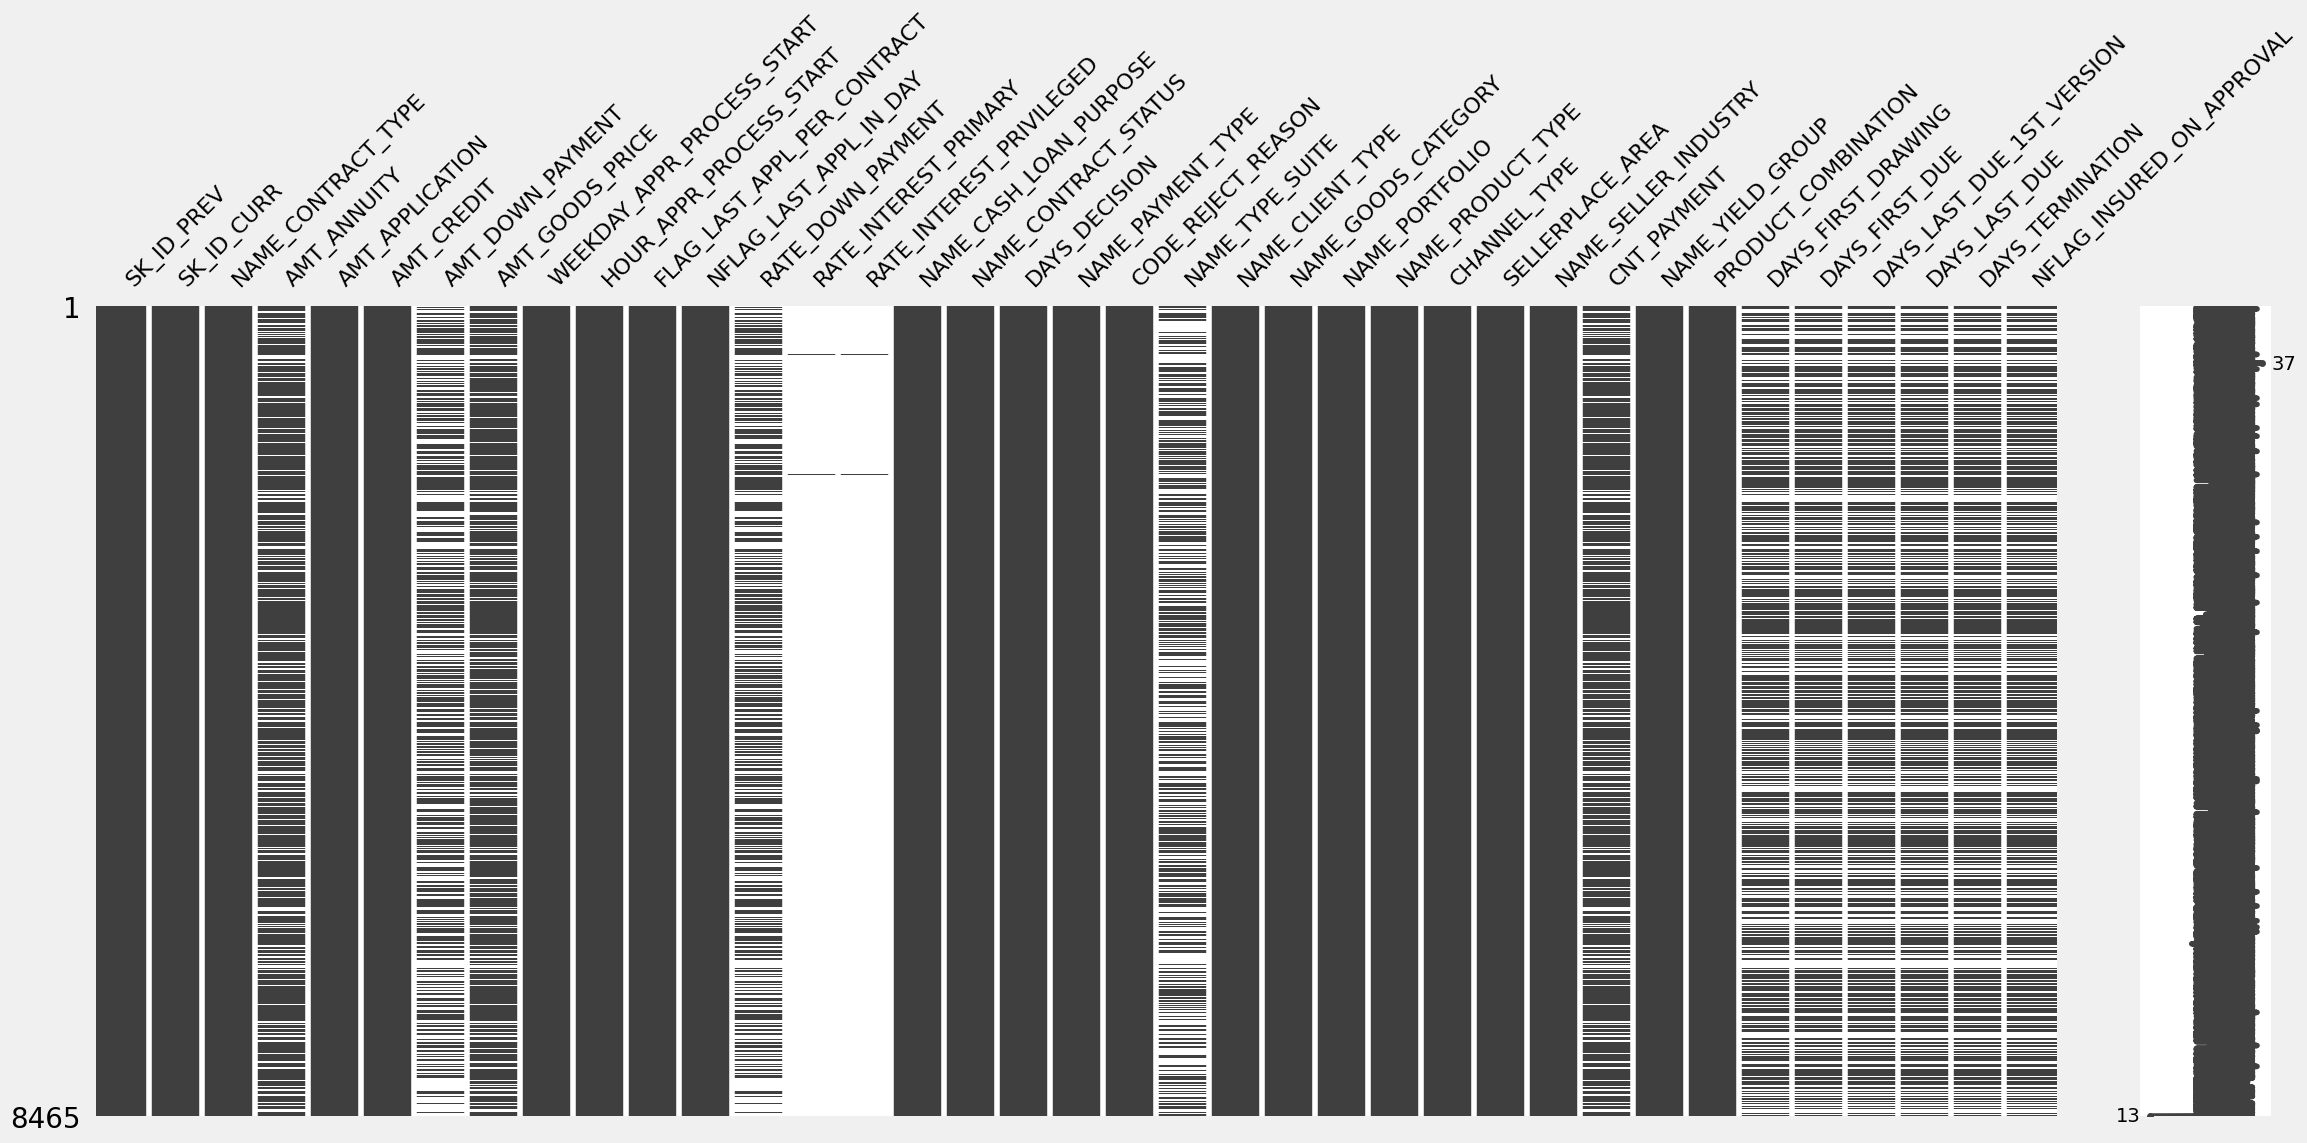

In [ ]:
mn.matrix(previousDF)

In [ ]:
round(previousDF.isnull().sum() / previousDF.shape[0] * 100.00,2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    20.17
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               48.08
AMT_GOODS_PRICE                20.26
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              48.08
RATE_INTEREST_PRIMARY          99.57
RATE_INTEREST_PRIVILEGED       99.57
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.01
NAME_PAYMENT_TYPE               0.01
CODE_REJECT_REASON              0.01
NAME_TYPE_SUITE                48.46
NAME_CLIENT_TYPE                0.01
NAME_GOODS_CATEGORY             0.01
NAME_PORTFOLIO                  0.01
NAME_PRODUCT_TYPE               0.01
CHANNEL_TYPE                    0.01
SELLERPLACE_AREA                0.01
N

There are many columns in previousDF dataframe where missing value is more than 40%. Let's plot the columns vs missing value % with 40% being the cut-off marks

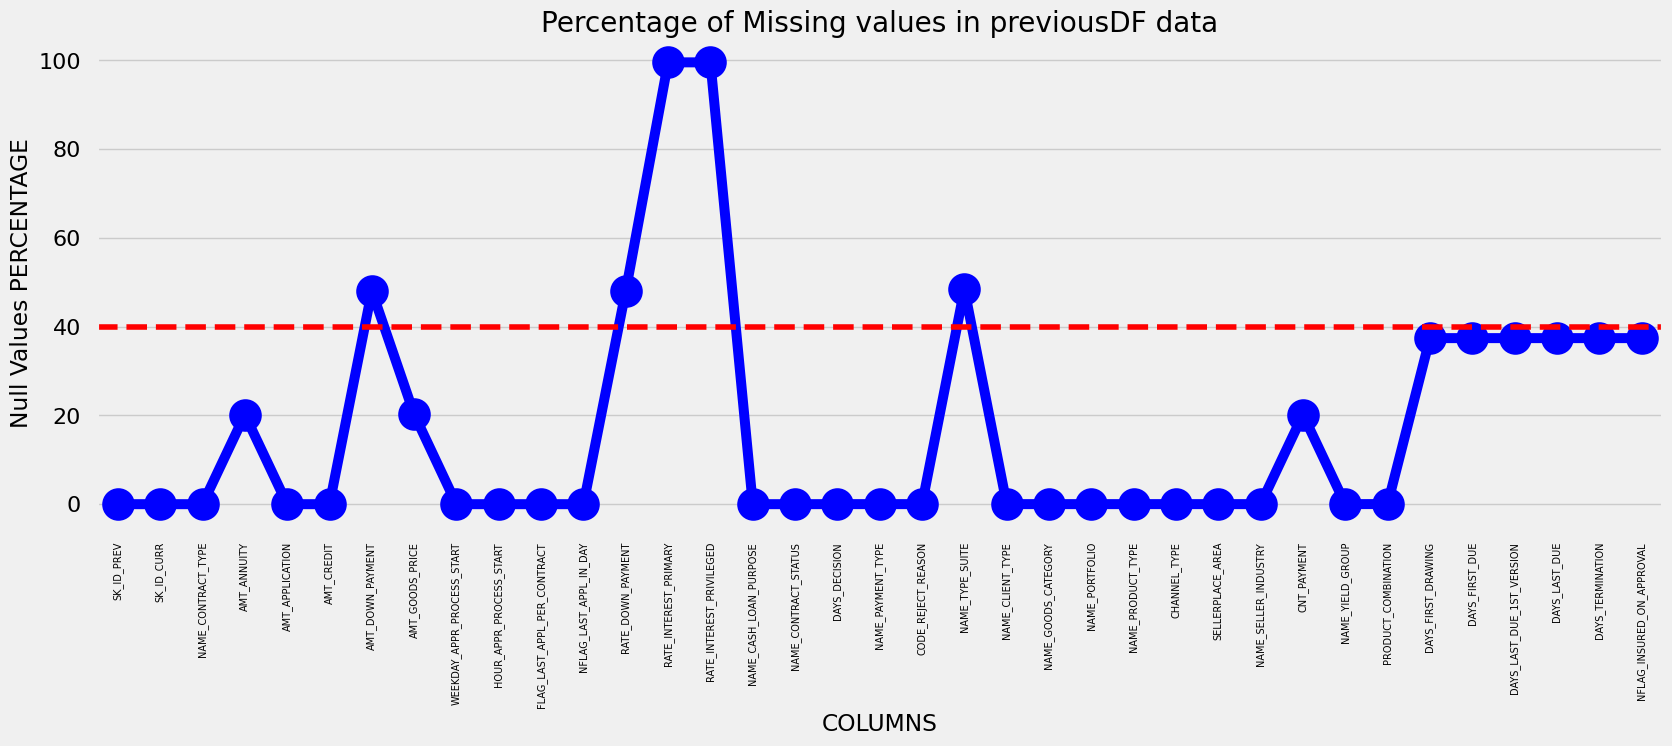

In [ ]:
null_previousDF = pd.DataFrame((previousDF.isnull().sum())*100/previousDF.shape[0]).reset_index()
null_previousDF.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_previousDF,color ='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in previousDF data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()


In [ ]:
nullcol_40_previous = null_previousDF[null_previousDF["Null Values Percentage"]>=40]
nullcol_40_previous


Column Name  Null Values Percentage
6           AMT_DOWN_PAYMENT               48.080331
12         RATE_DOWN_PAYMENT               48.080331
13     RATE_INTEREST_PRIMARY               99.574719
14  RATE_INTEREST_PRIVILEGED               99.574719
20           NAME_TYPE_SUITE               48.458358

In [ ]:
len(nullcol_40_previous)


5

Total of 11 columns are there which have more than 40% null values. These columns can be deleted. Before deleting these columns, let's review if there are more columns which can be dropped or not.


3.2 Analyze & Delete Unnecessary Columns in applicationDF


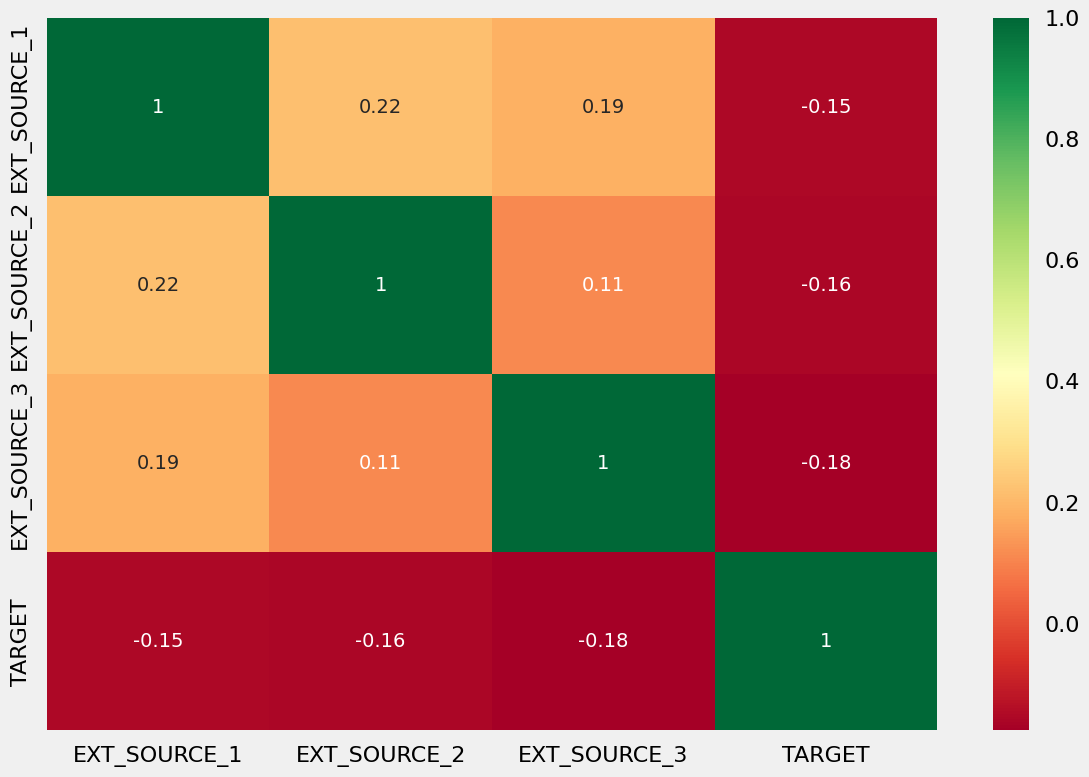

In [ ]:
Source = applicationDF[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="RdYlGn")

Based on the above Heatmap, we can see there is almost no correlation between EXT_SOURCE_X columns and target column, thus we can drop these columns. EXT_SOURCE_1 has 56% null values, where as EXT_SOURCE_3 has close to 20% null values

In [ ]:
Unwanted_application = nullcol_40_application["Column Name"].tolist()+ ['EXT_SOURCE_2','EXT_SOURCE_3']
# as EXT_SOURCE_1 column is already included in nullcol_40_application
len(Unwanted_application)

51

**3.2.2 Flag Document**


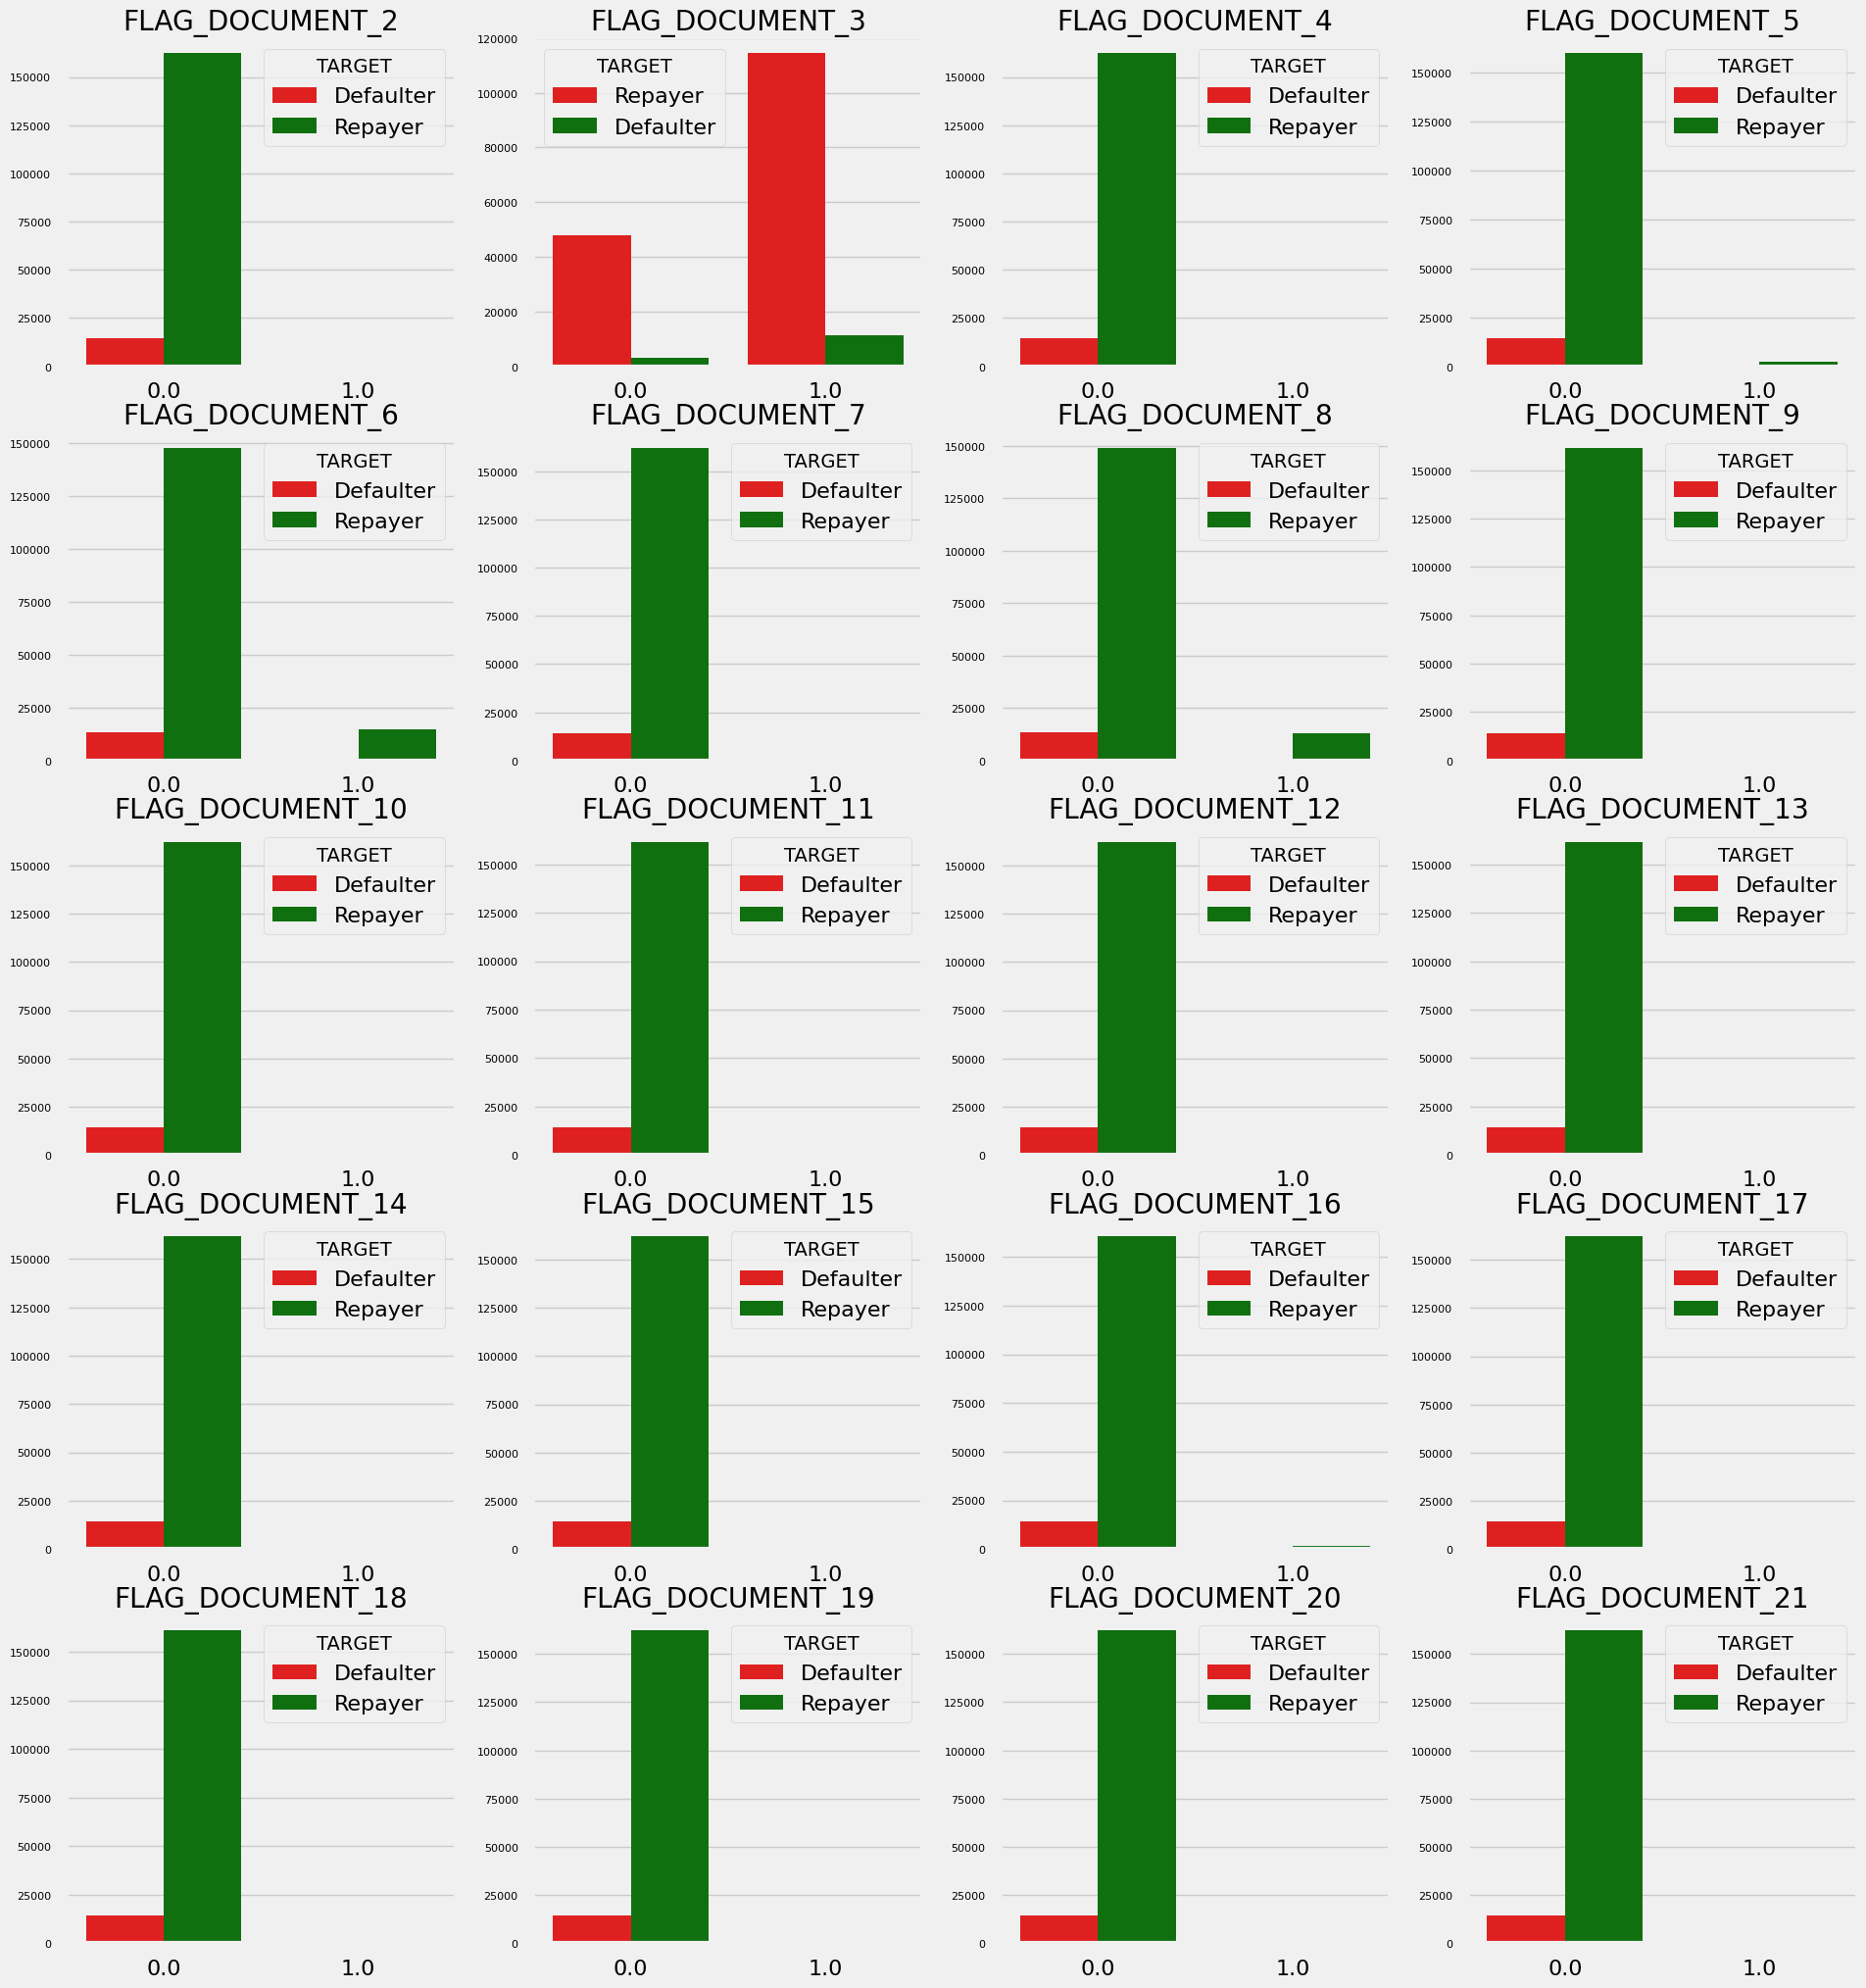

In [ ]:
'''col_Doc = [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
df_flag = applicationDF[col_Doc+["TARGET"]]

length = len(col_Doc)

df_flag["TARGET"] = df_flag["TARGET"].replace({1:"Defaulter",0:"Repayer"})

fig = plt.figure(figsize=(21,24))

for i,j in itertools.zip_longest(col_Doc,range(length)):
    plt.subplot(5,4,j+1)
    ax = sns.countplot(df_flag[i],hue=df_flag["TARGET"],palette=["r","g"])
    plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i) '''

col_Doc = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df_flag = applicationDF[col_Doc + ["TARGET"]]
length = len(col_Doc)

df_flag["TARGET"] = df_flag["TARGET"].replace({1: "Defaulter", 0: "Repayer"})

fig = plt.figure(figsize=(21, 24))

for i, j in itertools.zip_longest(col_Doc, range(length)):
    plt.subplot(5, 4, j + 1)
    ax = sns.countplot(data=df_flag, x=i, hue="TARGET", palette=["r", "g"])
    plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

plt.show()

The above graph shows that in most of the loan application cases, clients who applied for loans has not submitted FLAG_DOCUMENT_X except FLAG_DOCUMENT_3. Thus, Except for FLAG_DOCUMENT_3, we can delete rest of the columns. Data shows if borrower has submitted FLAG_DOCUMENT_3 then there is a less chance of defaulting the loan.


In [ ]:
col_Doc.remove('FLAG_DOCUMENT_3')
Unwanted_application = Unwanted_application + col_Doc
len(Unwanted_application)

70

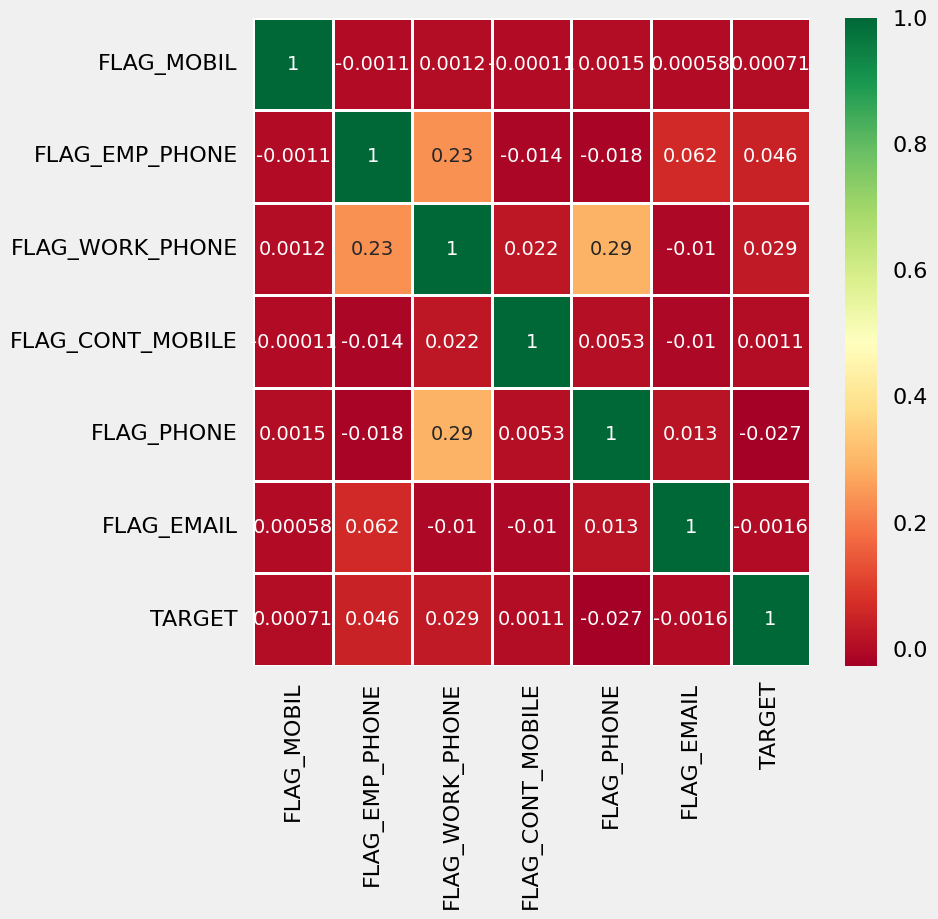

In [ ]:
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
Contact_corr = applicationDF[contact_col].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Contact_corr,
            xticklabels=Contact_corr.columns,
            yticklabels=Contact_corr.columns,
            annot = True,
            cmap ="RdYlGn",
            linewidth=1)


There is no correlation between flags of mobile phone, email etc with loan repayment; thus these columns can be deleted

In [ ]:
contact_col.remove('TARGET')
Unwanted_application = Unwanted_application + contact_col
len(Unwanted_application)

76

Total 76 columns can be deleted from applicationDF

In [ ]:
applicationDF.drop(labels=Unwanted_application,axis=1,inplace=True)

In [ ]:
applicationDF.shape

(176680, 46)

In [ ]:
applicationDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176680 entries, 0 to 176679
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   176680 non-null  int64  
 1   TARGET                       176680 non-null  int64  
 2   NAME_CONTRACT_TYPE           176680 non-null  object 
 3   CODE_GENDER                  176680 non-null  object 
 4   FLAG_OWN_CAR                 176680 non-null  object 
 5   FLAG_OWN_REALTY              176680 non-null  object 
 6   CNT_CHILDREN                 176680 non-null  int64  
 7   AMT_INCOME_TOTAL             176680 non-null  float64
 8   AMT_CREDIT                   176680 non-null  float64
 9   AMT_ANNUITY                  176672 non-null  float64
 10  AMT_GOODS_PRICE              176537 non-null  float64
 11  NAME_TYPE_SUITE              175966 non-null  object 
 12  NAME_INCOME_TYPE             176680 non-null  object 
 13 

3.3 Analyze & Delete Unnecessary Columns in previousDF
bold text

In [ ]:
Unwanted_previous = nullcol_40_previous["Column Name"].tolist()
Unwanted_previous

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE']

In [ ]:
Unnecessary_previous = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                        'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

In [ ]:
Unwanted_previous = Unwanted_previous + Unnecessary_previous
len(Unwanted_previous)

9

Total 15 columns can be deleted from previousDF

In [ ]:
previousDF.drop(labels=Unwanted_previous,axis=1,inplace=True)
previousDF.shape

(8465, 28)

In [ ]:
# inspecting the column types after after removal of unnecessary columns
previousDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SK_ID_PREV                 8465 non-null   int64  
 1   SK_ID_CURR                 8465 non-null   int64  
 2   NAME_CONTRACT_TYPE         8465 non-null   object 
 3   AMT_ANNUITY                6758 non-null   float64
 4   AMT_APPLICATION            8465 non-null   float64
 5   AMT_CREDIT                 8465 non-null   float64
 6   AMT_GOODS_PRICE            6750 non-null   float64
 7   NAME_CASH_LOAN_PURPOSE     8465 non-null   object 
 8   NAME_CONTRACT_STATUS       8465 non-null   object 
 9   DAYS_DECISION              8464 non-null   float64
 10  NAME_PAYMENT_TYPE          8464 non-null   object 
 11  CODE_REJECT_REASON         8464 non-null   object 
 12  NAME_CLIENT_TYPE           8464 non-null   object 
 13  NAME_GOODS_CATEGORY        8464 non-null   objec

3.4 Standardize Values

Convert DAYS_DECISION,DAYS_EMPLOYED, DAYS_REGISTRATION,DAYS_ID_PUBLISH from negative to positive as days cannot be negative.

Convert DAYS_BIRTH from negative to positive values and calculate age and create categorical bins columns

Categorize the amount variables into bins

In [ ]:
date_col = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

for col in date_col:
    applicationDF[col] = abs(applicationDF[col])

In [ ]:
applicationDF['AMT_INCOME_TOTAL']=applicationDF['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

applicationDF['AMT_INCOME_RANGE']=pd.cut(applicationDF['AMT_INCOME_TOTAL'],bins,labels=slot)

In [ ]:
applicationDF['AMT_INCOME_RANGE'].value_counts(normalize=True)*100

100K-200K    50.807443
200k-300k    21.105667
0-100K       20.759580
300k-400k     4.782350
400k-500k     1.740066
500k-600k     0.349486
600k-700k     0.282647
800k-900k     0.106488
700k-800k     0.053811
900k-1M       0.006797
1M Above      0.005664
Name: AMT_INCOME_RANGE, dtype: float64

More than 50% loan applicants have income amount in the range of 100K-200K. Almost 92% loan applicants have income less than 300K


In [ ]:
applicationDF['AMT_CREDIT']=applicationDF['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

applicationDF['AMT_CREDIT_RANGE']=pd.cut(applicationDF['AMT_CREDIT'],bins=bins,labels=slots)

In [ ]:
applicationDF['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

200k-300k    17.834503
1M Above     16.274055
500k-600k    11.055581
400k-500k    10.410912
100K-200K     9.821146
300k-400k     8.591804
600k-700k     7.801109
800k-900k     7.151347
700k-800k     6.197645
900k-1M       2.893933
0-100K        1.967965
Name: AMT_CREDIT_RANGE, dtype: float64

More Than 16% loan applicants have taken loan which amounts to more than 1M.

In [ ]:
applicationDF['AGE'] = applicationDF['DAYS_BIRTH'] // 365
bins = [0,20,30,40,50,100]
slots = ['0-20','20-30','30-40','40-50','50 above']

applicationDF['AGE_GROUP']=pd.cut(applicationDF['AGE'],bins=bins,labels=slots)

In [ ]:
applicationDF['AGE_GROUP'].value_counts(normalize=True)*100

50 above    31.525923
30-40       27.081164
40-50       24.135726
20-30       17.257188
0-20         0.000000
Name: AGE_GROUP, dtype: float64

31% loan applicants have age above 50 years. More than 55% of loan applicants have age over 40 years.

In [ ]:
applicationDF['YEARS_EMPLOYED'] = applicationDF['DAYS_EMPLOYED'] // 365
bins = [0,5,10,20,30,40,50,60,150]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

applicationDF['EMPLOYMENT_YEAR']=pd.cut(applicationDF['YEARS_EMPLOYED'],bins=bins,labels=slots)

In [ ]:
applicationDF['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100

0-5         55.668558
5-10        25.000970
10-20       14.450302
20-30        3.758336
30-40        1.058172
40-50        0.063661
50-60        0.000000
60 above     0.000000
Name: EMPLOYMENT_YEAR, dtype: float64

More than 55% of the loan applicants have work experience within 0-5 years and almost 80% of them have less than 10 years of work experience


In [ ]:
applicationDF.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY             2
TARGET                              2
NAME_CONTRACT_TYPE                  2
REG_REGION_NOT_LIVE_REGION          2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
FLAG_DOCUMENT_3                     2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
REGION_RATING_CLIENT                3
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
AGE_GROUP                           4
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
EMPLOYMENT_YEAR                     6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_WEEK          8
DEF_60_CNT_SOCIAL_CIRCLE            8
AMT_REQ_CREDIT_BUREAU_QRT           9
AMT_REQ_CRED

3.5 Data Type Conversion

In [ ]:
applicationDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176680 entries, 0 to 176679
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   176680 non-null  int64   
 1   TARGET                       176680 non-null  int64   
 2   NAME_CONTRACT_TYPE           176680 non-null  object  
 3   CODE_GENDER                  176680 non-null  object  
 4   FLAG_OWN_CAR                 176680 non-null  object  
 5   FLAG_OWN_REALTY              176680 non-null  object  
 6   CNT_CHILDREN                 176680 non-null  int64   
 7   AMT_INCOME_TOTAL             176680 non-null  float64 
 8   AMT_CREDIT                   176680 non-null  float64 
 9   AMT_ANNUITY                  176672 non-null  float64 
 10  AMT_GOODS_PRICE              176537 non-null  float64 
 11  NAME_TYPE_SUITE              175966 non-null  object  
 12  NAME_INCOME_TYPE             176680 non-null

In [ ]:
categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY'
                      ]
for col in categorical_columns:
    applicationDF[col] =pd.Categorical(applicationDF[col])

In [ ]:
applicationDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176680 entries, 0 to 176679
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   176680 non-null  int64   
 1   TARGET                       176680 non-null  int64   
 2   NAME_CONTRACT_TYPE           176680 non-null  category
 3   CODE_GENDER                  176680 non-null  category
 4   FLAG_OWN_CAR                 176680 non-null  category
 5   FLAG_OWN_REALTY              176680 non-null  category
 6   CNT_CHILDREN                 176680 non-null  int64   
 7   AMT_INCOME_TOTAL             176680 non-null  float64 
 8   AMT_CREDIT                   176680 non-null  float64 
 9   AMT_ANNUITY                  176672 non-null  float64 
 10  AMT_GOODS_PRICE              176537 non-null  float64 
 11  NAME_TYPE_SUITE              175966 non-null  category
 12  NAME_INCOME_TYPE             176680 non-null

**Standardize Values for previousDF**



Convert DAYS_DECISION from negative to positive values and create categorical bins columns.
Convert loan purpose and few other columns to categorical.

In [ ]:
previousDF.nunique().sort_values()

NFLAG_INSURED_ON_APPROVAL       2
NAME_PRODUCT_TYPE               3
NAME_CONTRACT_TYPE              4
NAME_CONTRACT_STATUS            4
NAME_PAYMENT_TYPE               4
NAME_CLIENT_TYPE                4
NAME_YIELD_GROUP                5
NAME_PORTFOLIO                  5
CHANNEL_TYPE                    8
CODE_REJECT_REASON              8
NAME_SELLER_INDUSTRY           11
PRODUCT_COMBINATION            17
NAME_CASH_LOAN_PURPOSE         23
CNT_PAYMENT                    24
NAME_GOODS_CATEGORY            24
DAYS_FIRST_DRAWING            261
SELLERPLACE_AREA              653
DAYS_TERMINATION             1942
DAYS_LAST_DUE                1986
DAYS_FIRST_DUE               2214
DAYS_DECISION                2441
DAYS_LAST_DUE_1ST_VERSION    2518
AMT_GOODS_PRICE              3527
AMT_APPLICATION              3527
AMT_CREDIT                   4744
AMT_ANNUITY                  5737
SK_ID_CURR                   8252
SK_ID_PREV                   8465
dtype: int64

In [ ]:
previousDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SK_ID_PREV                 8465 non-null   int64  
 1   SK_ID_CURR                 8465 non-null   int64  
 2   NAME_CONTRACT_TYPE         8465 non-null   object 
 3   AMT_ANNUITY                6758 non-null   float64
 4   AMT_APPLICATION            8465 non-null   float64
 5   AMT_CREDIT                 8465 non-null   float64
 6   AMT_GOODS_PRICE            6750 non-null   float64
 7   NAME_CASH_LOAN_PURPOSE     8465 non-null   object 
 8   NAME_CONTRACT_STATUS       8465 non-null   object 
 9   DAYS_DECISION              8464 non-null   float64
 10  NAME_PAYMENT_TYPE          8464 non-null   object 
 11  CODE_REJECT_REASON         8464 non-null   object 
 12  NAME_CLIENT_TYPE           8464 non-null   object 
 13  NAME_GOODS_CATEGORY        8464 non-null   objec

In [ ]:
previousDF['DAYS_DECISION'] = abs(previousDF['DAYS_DECISION'])

In [ ]:
previousDF['DAYS_DECISION_GROUP'] = (previousDF['DAYS_DECISION']-(previousDF['DAYS_DECISION'] % 400)).astype(str)+'-'+ ((previousDF['DAYS_DECISION'] - (previousDF['DAYS_DECISION'] % 400)) + (previousDF['DAYS_DECISION'] % 400) + (400 - (previousDF['DAYS_DECISION'] % 400))).astype(str)

In [ ]:
previousDF['DAYS_DECISION_GROUP'].value_counts(normalize=True)*100

0.0-400.0        35.723568
400.0-800.0      23.898405
800.0-1200.0     11.966923
1200.0-1600.0     8.044891
2400.0-2800.0     6.863556
2000.0-2400.0     6.095688
1600.0-2000.0     5.812168
2800.0-3200.0     1.582989
nan-nan           0.011813
Name: DAYS_DECISION_GROUP, dtype: float64

Almost 37% loan applicatants have applied for a new loan within 0-400 days of previous loan decision


In [ ]:
Catgorical_col_p = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE','DAYS_DECISION_GROUP']

for col in Catgorical_col_p:
    previousDF[col] =pd.Categorical(previousDF[col])

In [ ]:
previousDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   SK_ID_PREV                 8465 non-null   int64   
 1   SK_ID_CURR                 8465 non-null   int64   
 2   NAME_CONTRACT_TYPE         8465 non-null   category
 3   AMT_ANNUITY                6758 non-null   float64 
 4   AMT_APPLICATION            8465 non-null   float64 
 5   AMT_CREDIT                 8465 non-null   float64 
 6   AMT_GOODS_PRICE            6750 non-null   float64 
 7   NAME_CASH_LOAN_PURPOSE     8465 non-null   category
 8   NAME_CONTRACT_STATUS       8465 non-null   category
 9   DAYS_DECISION              8464 non-null   float64 
 10  NAME_PAYMENT_TYPE          8464 non-null   category
 11  CODE_REJECT_REASON         8464 non-null   category
 12  NAME_CLIENT_TYPE           8464 non-null   category
 13  NAME_GOODS_CATEGORY        8464 n

3.6 Null Value Data Imputation


To impute null values in categorical variables which has lower null percentage, mode() is used to impute the most frequent items.

To impute null values in categorical variables which has higher null percentage, a new category is created.

To impute null values in numerical variables which has lower null percentage, median() is used asThere are no outliers in the columns.

Mean returned decimal values and median returned whole numbers and the columns were number of requests


In [ ]:
round(applicationDF.isnull().sum() / applicationDF.shape[0] * 100.00,2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.08
NAME_TYPE_SUITE                 0.40
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                31.44
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
R

In [ ]:
applicationDF['NAME_TYPE_SUITE'].describe()

count            175966
unique                7
top       Unaccompanied
freq             142842
Name: NAME_TYPE_SUITE, dtype: object

In [ ]:
applicationDF['NAME_TYPE_SUITE'].fillna((applicationDF['NAME_TYPE_SUITE'].mode()[0]),inplace = True)

In [ ]:
applicationDF['OCCUPATION_TYPE'] = applicationDF['OCCUPATION_TYPE'].cat.add_categories('Unknown')
applicationDF['OCCUPATION_TYPE'].fillna('Unknown', inplace =True)

In [ ]:
applicationDF[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
count               152909.000000              152909.000000               152909.000000              152909.000000              152909.000000               152909.000000
mean                     0.006520                   0.007148                    0.033955                   0.266459                   0.264360                    1.893002
std                      0.085832                   0.113252                    0.204133                   0.914124                   0.610641                    1.865614
min                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    0.000000
25%                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    0.000000
50%                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    1.000000
75%                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    3.000000
max                      4.000000                   9.000000                    8.000000                  24.000000                   8.000000                   25.000000

In [ ]:
amount = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
         'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for col in amount:
    applicationDF[col].fillna(applicationDF[col].median(),inplace = True)

In [ ]:
round(applicationDF.isnull().sum() / previousDF.shape[0] * 100.00,2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.09
AMT_GOODS_PRICE                  1.69
NAME_TYPE_SUITE                  0.00
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OCCUPATION_TYPE                  0.00
CNT_FAM_MEMBERS                  0.02
REGION_RATING_CLIENT             0.01
REGION_RATING_CLIENT_W_CITY      0.01
WEEKDAY_APPR_PROCESS_START       0.01
HOUR_APPR_PR

In [ ]:
round(previousDF.isnull().sum() / previousDF.shape[0] * 100.00,2)

SK_ID_PREV                    0.00
SK_ID_CURR                    0.00
NAME_CONTRACT_TYPE            0.00
AMT_ANNUITY                  20.17
AMT_APPLICATION               0.00
AMT_CREDIT                    0.00
AMT_GOODS_PRICE              20.26
NAME_CASH_LOAN_PURPOSE        0.00
NAME_CONTRACT_STATUS          0.00
DAYS_DECISION                 0.01
NAME_PAYMENT_TYPE             0.01
CODE_REJECT_REASON            0.01
NAME_CLIENT_TYPE              0.01
NAME_GOODS_CATEGORY           0.01
NAME_PORTFOLIO                0.01
NAME_PRODUCT_TYPE             0.01
CHANNEL_TYPE                  0.01
SELLERPLACE_AREA              0.01
NAME_SELLER_INDUSTRY          0.01
CNT_PAYMENT                  20.18
NAME_YIELD_GROUP              0.01
PRODUCT_COMBINATION           0.02
DAYS_FIRST_DRAWING           37.42
DAYS_FIRST_DUE               37.42
DAYS_LAST_DUE_1ST_VERSION    37.42
DAYS_LAST_DUE                37.42
DAYS_TERMINATION             37.42
NFLAG_INSURED_ON_APPROVAL    37.42
DAYS_DECISION_GROUP 

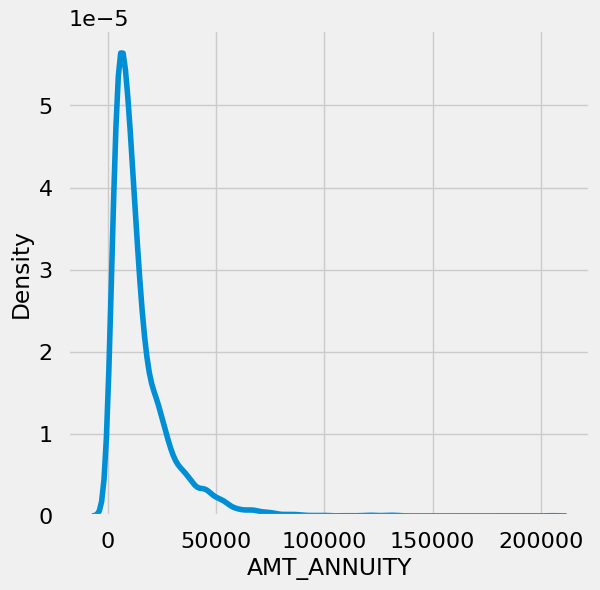

In [ ]:
plt.figure(figsize=(6,6))
sns.kdeplot(previousDF['AMT_ANNUITY'])
plt.show()

In [ ]:
previousDF['AMT_ANNUITY'].fillna(previousDF['AMT_ANNUITY'].median(),inplace = True)

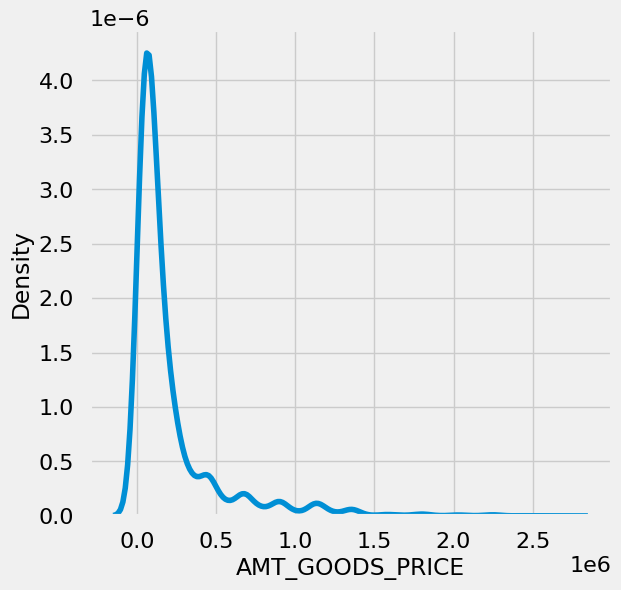

In [ ]:
plt.figure(figsize=(6,6))
sns.kdeplot(previousDF['AMT_GOODS_PRICE'][pd.notnull(previousDF['AMT_GOODS_PRICE'])])
plt.show()

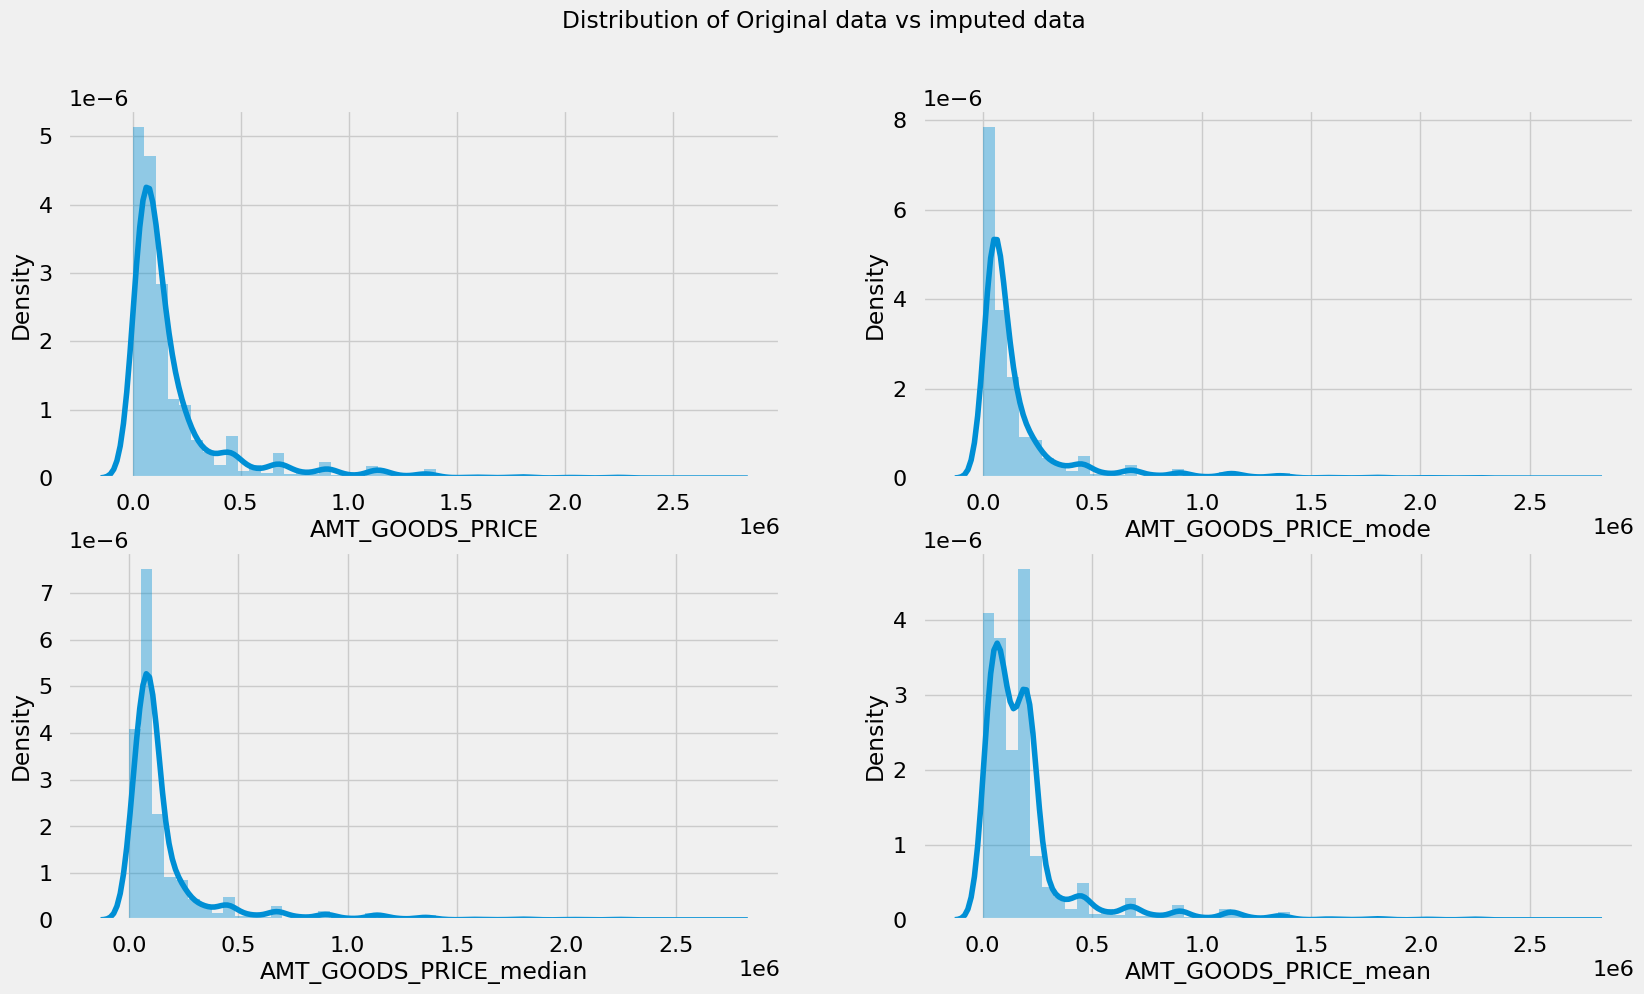

In [ ]:
statsDF = pd.DataFrame() # new dataframe with columns imputed with mode, median and mean
statsDF['AMT_GOODS_PRICE_mode'] = previousDF['AMT_GOODS_PRICE'].fillna(previousDF['AMT_GOODS_PRICE'].mode()[0])
statsDF['AMT_GOODS_PRICE_median'] = previousDF['AMT_GOODS_PRICE'].fillna(previousDF['AMT_GOODS_PRICE'].median())
statsDF['AMT_GOODS_PRICE_mean'] = previousDF['AMT_GOODS_PRICE'].fillna(previousDF['AMT_GOODS_PRICE'].mean())

cols = ['AMT_GOODS_PRICE_mode', 'AMT_GOODS_PRICE_median','AMT_GOODS_PRICE_mean']

plt.figure(figsize=(18,10))
plt.suptitle('Distribution of Original data vs imputed data')
plt.subplot(221)
sns.distplot(previousDF['AMT_GOODS_PRICE'][pd.notnull(previousDF['AMT_GOODS_PRICE'])]);
for i in enumerate(cols):
    plt.subplot(2,2,i[0]+2)
    sns.distplot(statsDF[i[1]])

In [ ]:
previousDF['AMT_GOODS_PRICE'].fillna(previousDF['AMT_GOODS_PRICE'].mode()[0], inplace=True)

In [ ]:
previousDF.loc[previousDF['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        1352
Refused          204
Unused offer     151
Approved           1
Name: NAME_CONTRACT_STATUS, dtype: int64

In [ ]:
previousDF['CNT_PAYMENT'].fillna(0,inplace = True)

In [ ]:
round(previousDF.isnull().sum() / previousDF.shape[0] * 100.00,2)

SK_ID_PREV                    0.00
SK_ID_CURR                    0.00
NAME_CONTRACT_TYPE            0.00
AMT_ANNUITY                   0.00
AMT_APPLICATION               0.00
AMT_CREDIT                    0.00
AMT_GOODS_PRICE               0.00
NAME_CASH_LOAN_PURPOSE        0.00
NAME_CONTRACT_STATUS          0.00
DAYS_DECISION                 0.01
NAME_PAYMENT_TYPE             0.01
CODE_REJECT_REASON            0.01
NAME_CLIENT_TYPE              0.01
NAME_GOODS_CATEGORY           0.01
NAME_PORTFOLIO                0.01
NAME_PRODUCT_TYPE             0.01
CHANNEL_TYPE                  0.01
SELLERPLACE_AREA              0.01
NAME_SELLER_INDUSTRY          0.01
CNT_PAYMENT                   0.00
NAME_YIELD_GROUP              0.01
PRODUCT_COMBINATION           0.02
DAYS_FIRST_DRAWING           37.42
DAYS_FIRST_DUE               37.42
DAYS_LAST_DUE_1ST_VERSION    37.42
DAYS_LAST_DUE                37.42
DAYS_TERMINATION             37.42
NFLAG_INSURED_ON_APPROVAL    37.42
DAYS_DECISION_GROUP 

### **3.7Identifying the outliers**

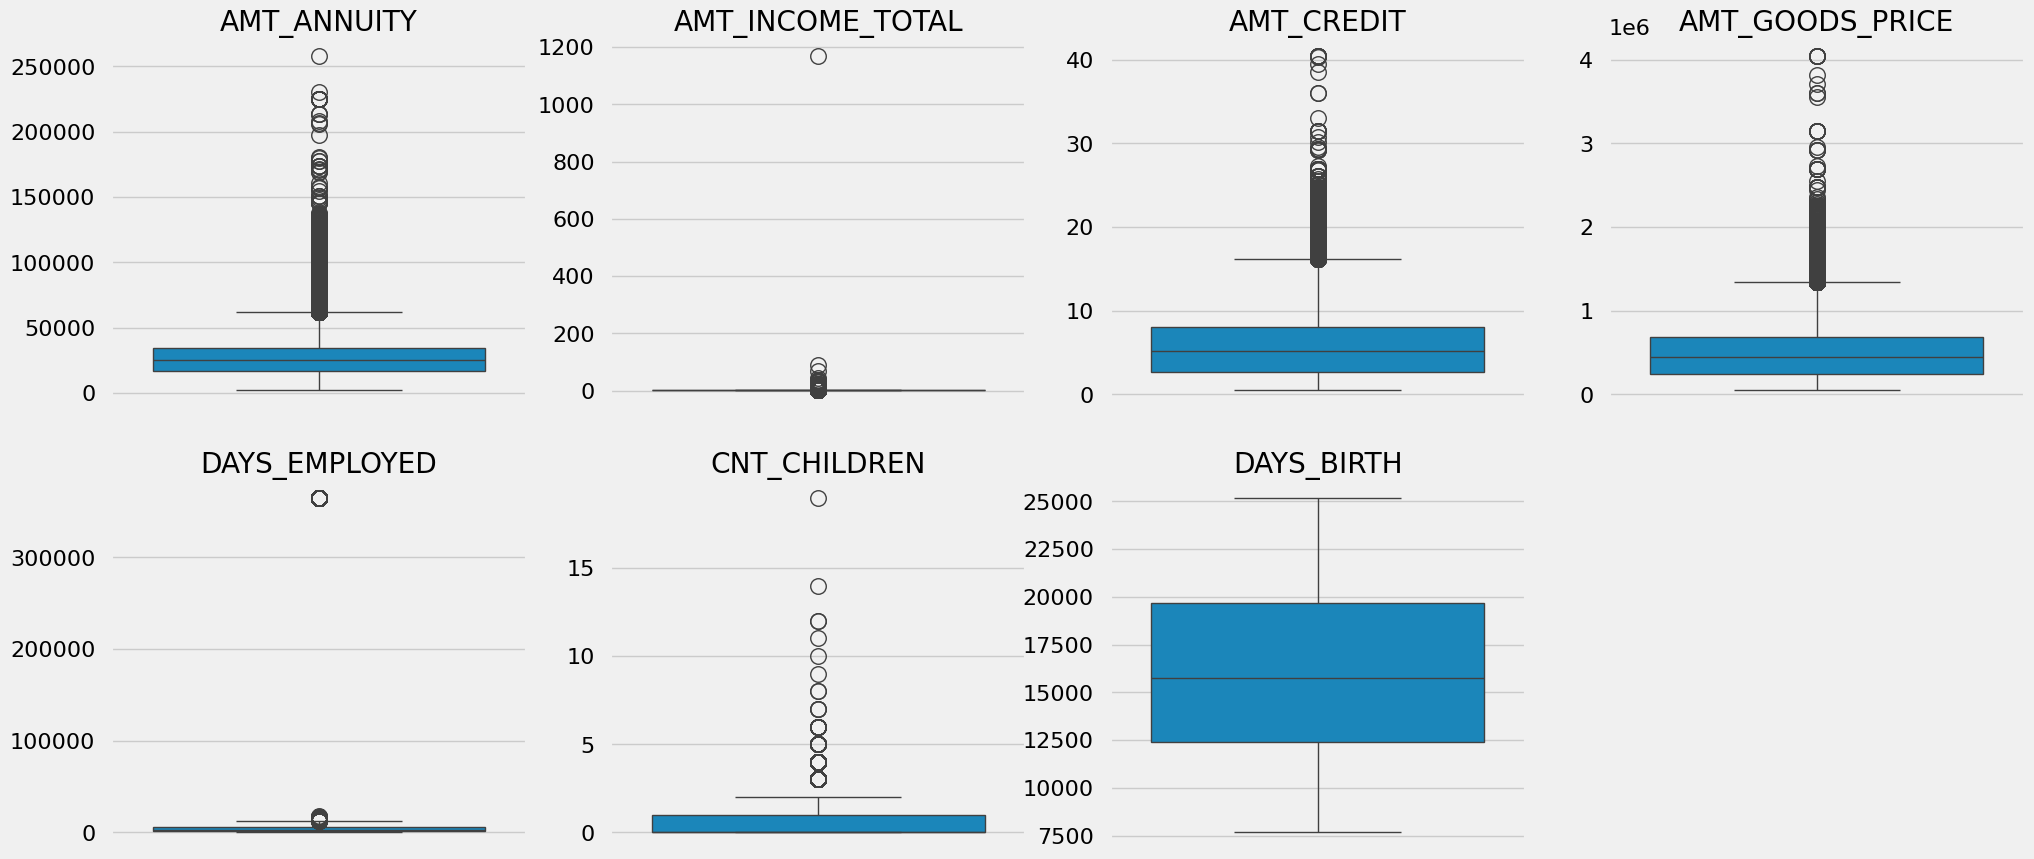

In [ ]:
plt.figure(figsize=(22,10))

app_outlier_col_1 = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED']
app_outlier_col_2 = ['CNT_CHILDREN','DAYS_BIRTH']
for i in enumerate(app_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=applicationDF[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(app_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=applicationDF[i[1]])
    plt.title(i[1])
    plt.ylabel("")

In [ ]:
applicationDF[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].describe()

AMT_ANNUITY  AMT_INCOME_TOTAL     AMT_CREDIT  AMT_GOODS_PRICE     DAYS_BIRTH   CNT_CHILDREN  DAYS_EMPLOYED
count  176672.000000     176680.000000  176680.000000     1.765370e+05  176680.000000  176680.000000  176680.000000
mean    27117.624725          1.689099       5.991596     5.385628e+05   16029.470902       0.418644   67640.602355
std     14575.084447          2.961904       4.031244     3.702686e+05    4368.595356       0.724530  139378.882474
min      1980.000000          0.256500       0.450000     4.500000e+04    7673.000000       0.000000       0.000000
25%     16506.000000          1.125000       2.700000     2.385000e+05   12397.000000       0.000000     932.000000
50%     24894.000000          1.440000       5.124465     4.500000e+05   15732.000000       0.000000    2212.000000
75%     34596.000000          2.025000       8.086500     6.795000e+05   19675.000000       1.000000    5685.000000
max    258025.500000       1170.000000      40.500000     4.050000e+06   25201.000000      19.000000  365243.000000

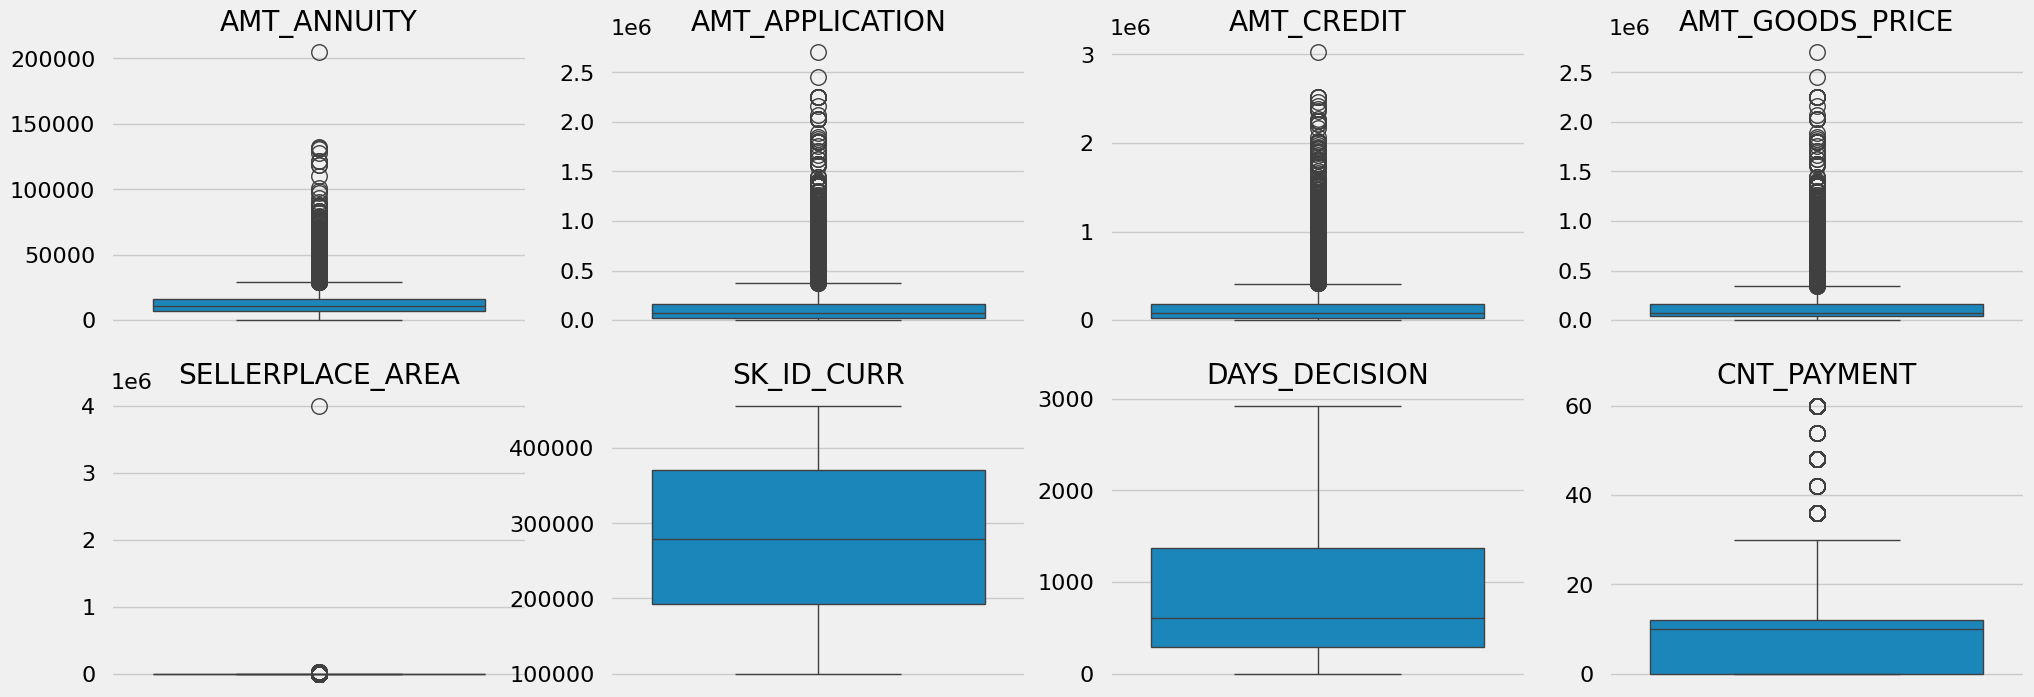

In [ ]:
plt.figure(figsize=(22,8))

prev_outlier_col_1 = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA']
prev_outlier_col_2 = ['SK_ID_CURR','DAYS_DECISION','CNT_PAYMENT']
for i in enumerate(prev_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=previousDF[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(prev_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=previousDF[i[1]])
    plt.title(i[1])
    plt.ylabel("")


In [ ]:
previousDF[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA','CNT_PAYMENT','DAYS_DECISION']].describe()

AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_GOODS_PRICE  SELLERPLACE_AREA  CNT_PAYMENT  DAYS_DECISION
count    8465.000000     8.465000e+03  8.465000e+03     8.465000e+03      8.464000e+03  8465.000000    8464.000000
mean    14041.865762     1.628921e+05  1.823300e+05     1.720090e+05      8.477363e+02    12.140815     909.297023
std     12539.951462     2.705861e+05  2.976771e+05     2.656568e+05      4.350041e+04    13.594798     791.197295
min         0.000000     0.000000e+00  0.000000e+00     0.000000e+00     -1.000000e+00     0.000000       2.000000
25%      6967.620000     2.407910e+04  2.766600e+04     4.500000e+04     -1.000000e+00     0.000000     296.000000
50%     10526.422500     7.150500e+04  7.810200e+04     7.150500e+04      2.000000e+01    10.000000     605.000000
75%     15846.660000     1.644300e+05  1.819845e+05     1.644300e+05      1.290000e+02    12.000000    1373.250000
max    204635.790000     2.700000e+06  3.020760e+06     2.700000e+06      4.000000e+06    60.000000    2920.000000

## **4. Data Analysis**

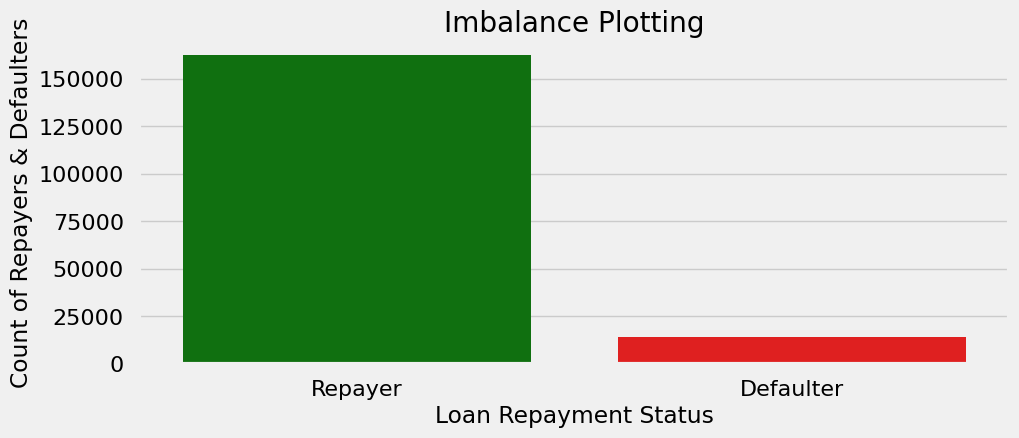

In [ ]:
'''Imbalance = applicationDF["TARGET"].value_counts().reset_index()

plt.figure(figsize=(10,4))
x= ['Repayer','Defaulter']
sns.barplot(x,"TARGET",data = Imbalance,palette= ['g','r'])
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count of Repayers & Defaulters")
plt.title("Imbalance Plotting")
plt.show()'''
Imbalance = applicationDF["TARGET"].value_counts().reset_index()

plt.figure(figsize=(10, 4))
sns.barplot(x=x, y="TARGET", data=Imbalance, palette=['g', 'r'])
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count of Repayers & Defaulters")
plt.title("Imbalance Plotting")
plt.show()

In [ ]:
count_0 = Imbalance.iloc[0]["TARGET"]
count_1 = Imbalance.iloc[1]["TARGET"]
count_0_perc = round(count_0/(count_0+count_1)*100,2)
count_1_perc = round(count_1/(count_0+count_1)*100,2)

print('Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: %.2f and %.2f'%(count_0_perc,count_1_perc))
print('Ratios of imbalance in relative with respect to Repayer and Defaulter datas is %.2f : 1 (approx)'%(count_0/count_1))

Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: 91.87 and 8.13
Ratios of imbalance in relative with respect to Repayer and Defaulter datas is 11.29 : 1 (approx)


 Plotting Functions

In [ ]:
def univariate_categorical(feature,ylog=False,label_rotation=False,horizontal_layout=True):
    temp = applicationDF[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = applicationDF[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc["TARGET"] = cat_perc["TARGET"]*100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))

    # 1. Subplot 1: Count plot of categorical column
    # sns.set_palette("Set2")
    s = sns.countplot(ax=ax1,
                    x = feature,
                    data=applicationDF,
                    hue ="TARGET",
                    order=cat_perc[feature],
                    palette=['g','r'])

    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})
    ax1.legend(['Repayer','Defaulter'])

    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})


    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
        # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2,
                    x = feature,
                    y='TARGET',
                    order=cat_perc[feature],
                    data=cat_perc,
                    palette='Set2')

    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Defaulters [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'})

    plt.show();


In [ ]:
def bivariate_bar(x,y,df,hue,figsize):

    plt.figure(figsize=figsize)
    sns.barplot(x=x,
                  y=y,
                  data=df,
                  hue=hue,
                  palette =['g','r'])

    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})
    plt.ylabel(y,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})
    plt.title(col, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'})
    plt.xticks(rotation=90, ha='right')
    plt.legend(labels = ['Repayer','Defaulter'])
    plt.show()

In [ ]:
def bivariate_rel(x,y,data, hue, kind, palette, legend,figsize):

    plt.figure(figsize=figsize)
    sns.relplot(x=x,
                y=y,
                data=applicationDF,
                hue="TARGET",
                kind=kind,
                palette = ['g','r'],
                legend = False)
    plt.legend(['Repayer','Defaulter'])
    plt.xticks(rotation=90, ha='right')
    plt.show()

In [ ]:
def univariate_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col,
                  data=df,
                  hue= hue,
                  palette= palette,
                  order=df[col].value_counts().index)


    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})
    else:
        plt.ylabel("Count",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})

    plt.title(col , fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'})
    plt.legend(loc = "upper right")
    plt.xticks(rotation=90, ha='right')

    plt.show()

In [ ]:
def merged_pointplot(x,y):
    plt.figure(figsize=(8,4))
    sns.pointplot(x=x,
                  y=y,
                  hue="TARGET",
                  data=loan_process_df,
                  palette =['g','r'])
   # plt.legend(['Repayer','Defaulter'])

**Categorical Variables Analysis**


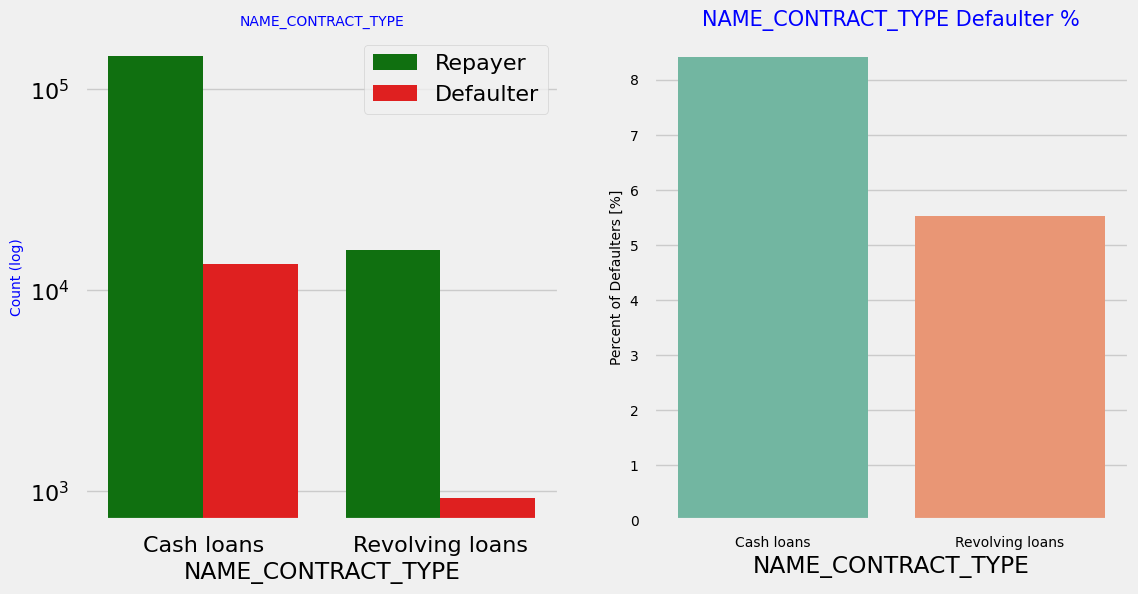

In [ ]:
univariate_categorical('NAME_CONTRACT_TYPE',True)

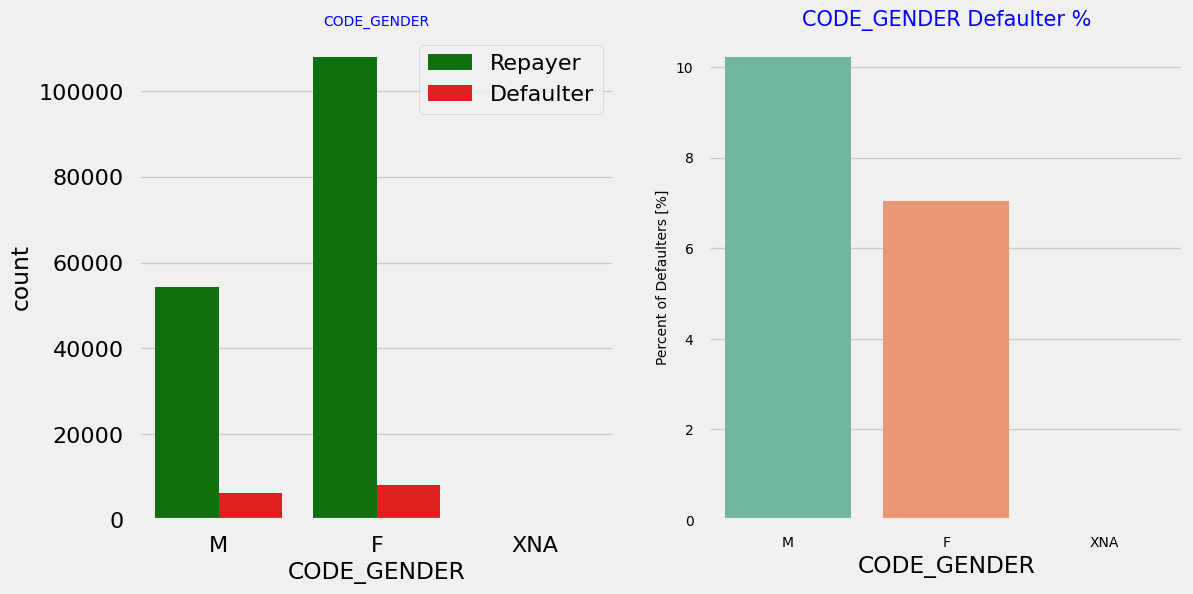

In [ ]:
univariate_categorical('CODE_GENDER')

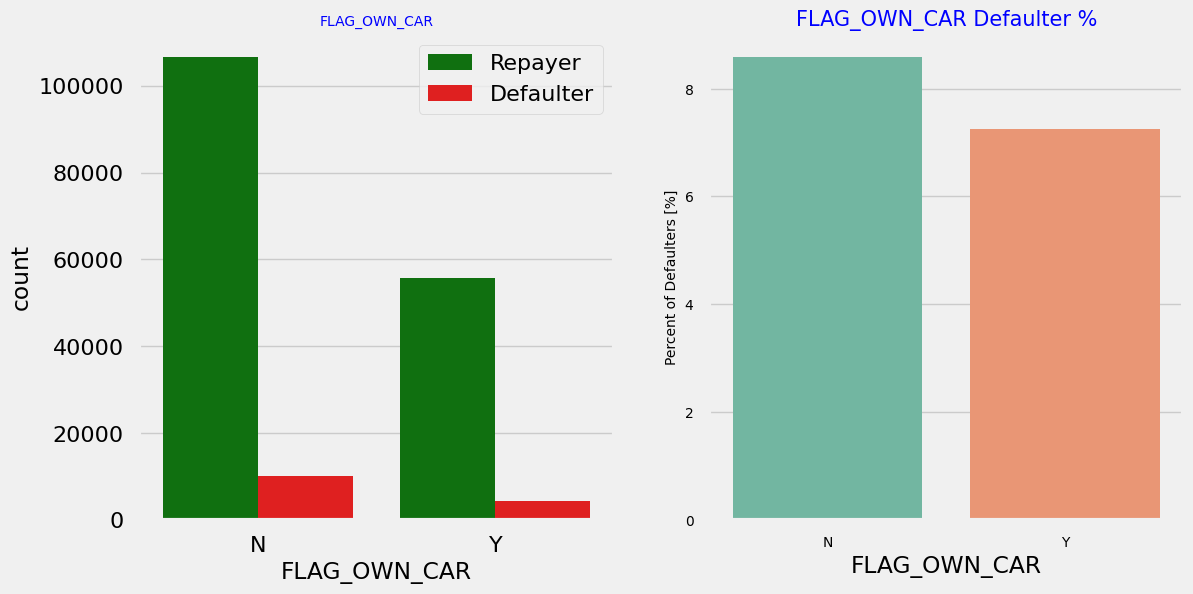

In [ ]:
univariate_categorical('FLAG_OWN_CAR')

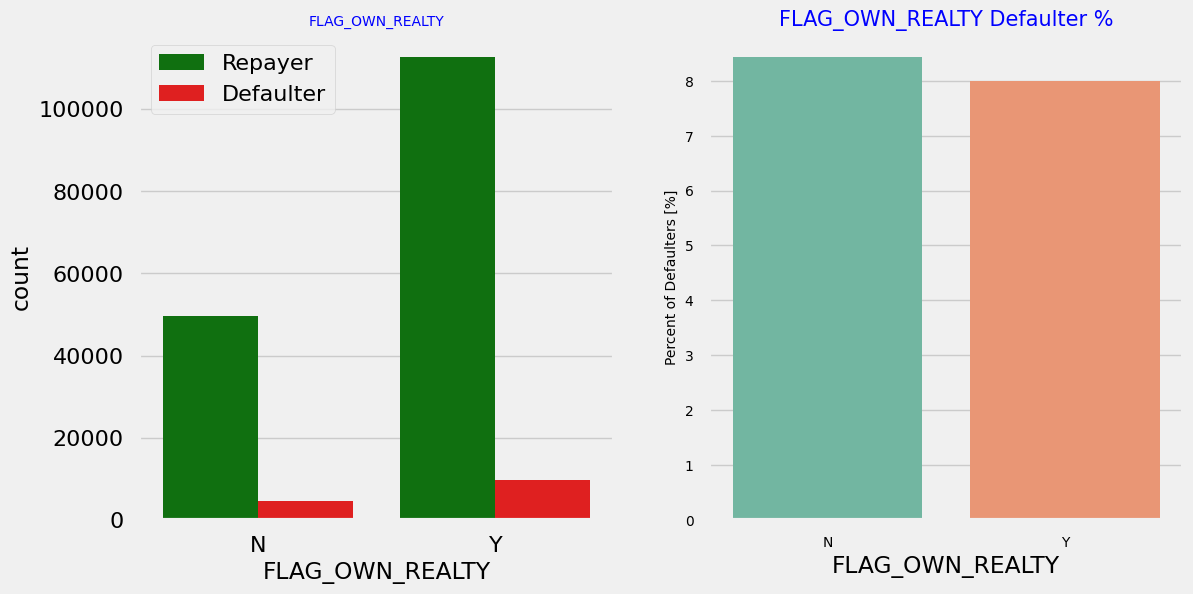

In [ ]:
univariate_categorical('FLAG_OWN_REALTY')

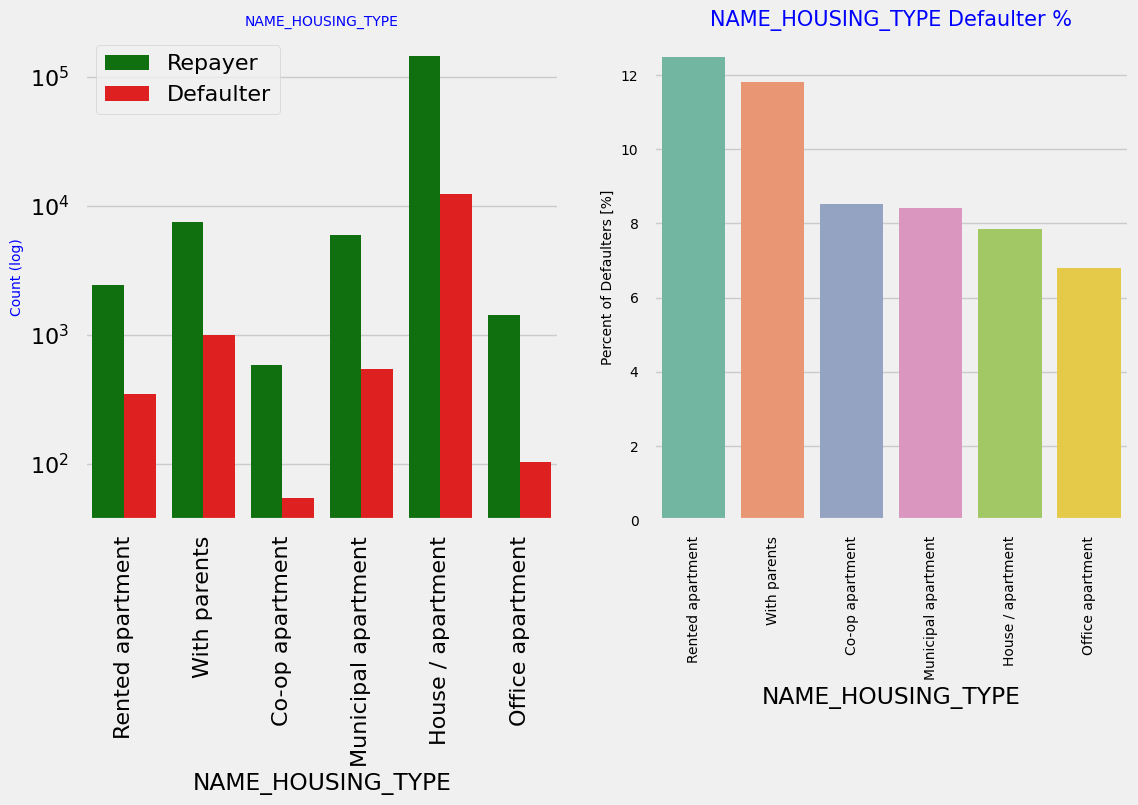

In [ ]:
univariate_categorical("NAME_HOUSING_TYPE",True,True,True)

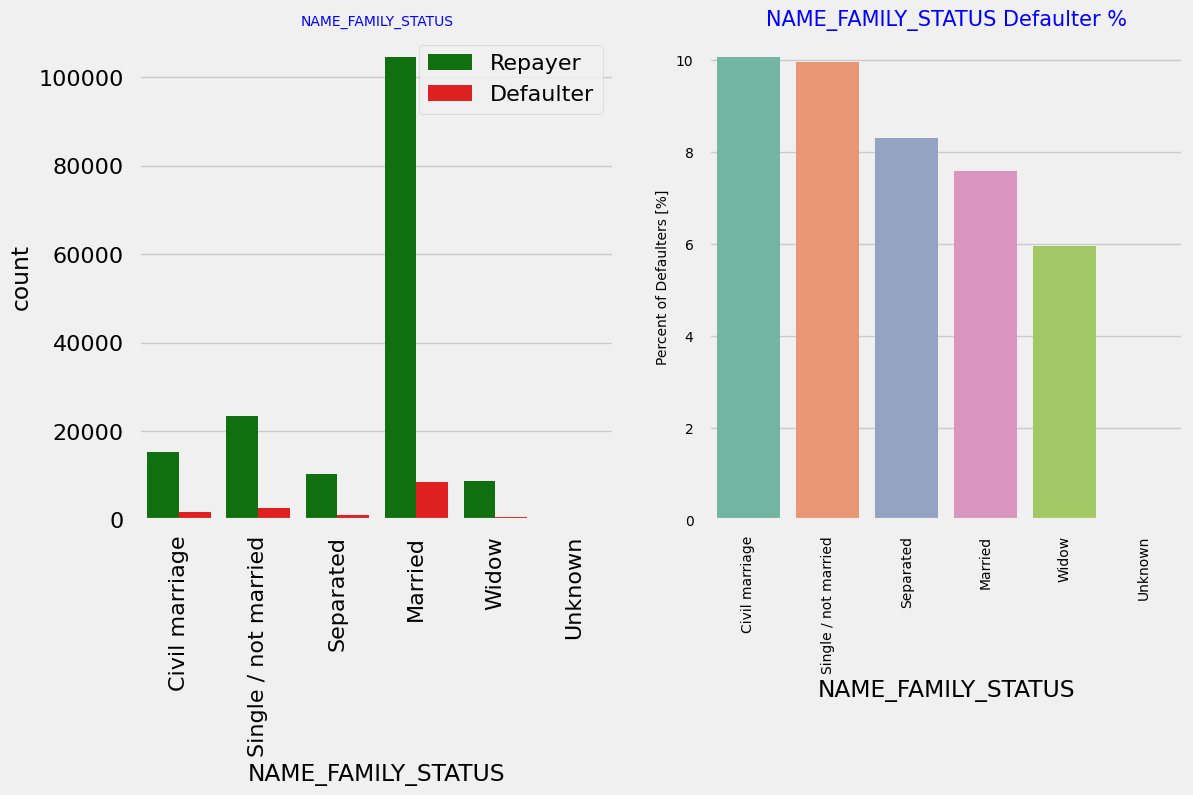

In [ ]:
univariate_categorical("NAME_FAMILY_STATUS",False,True,True)

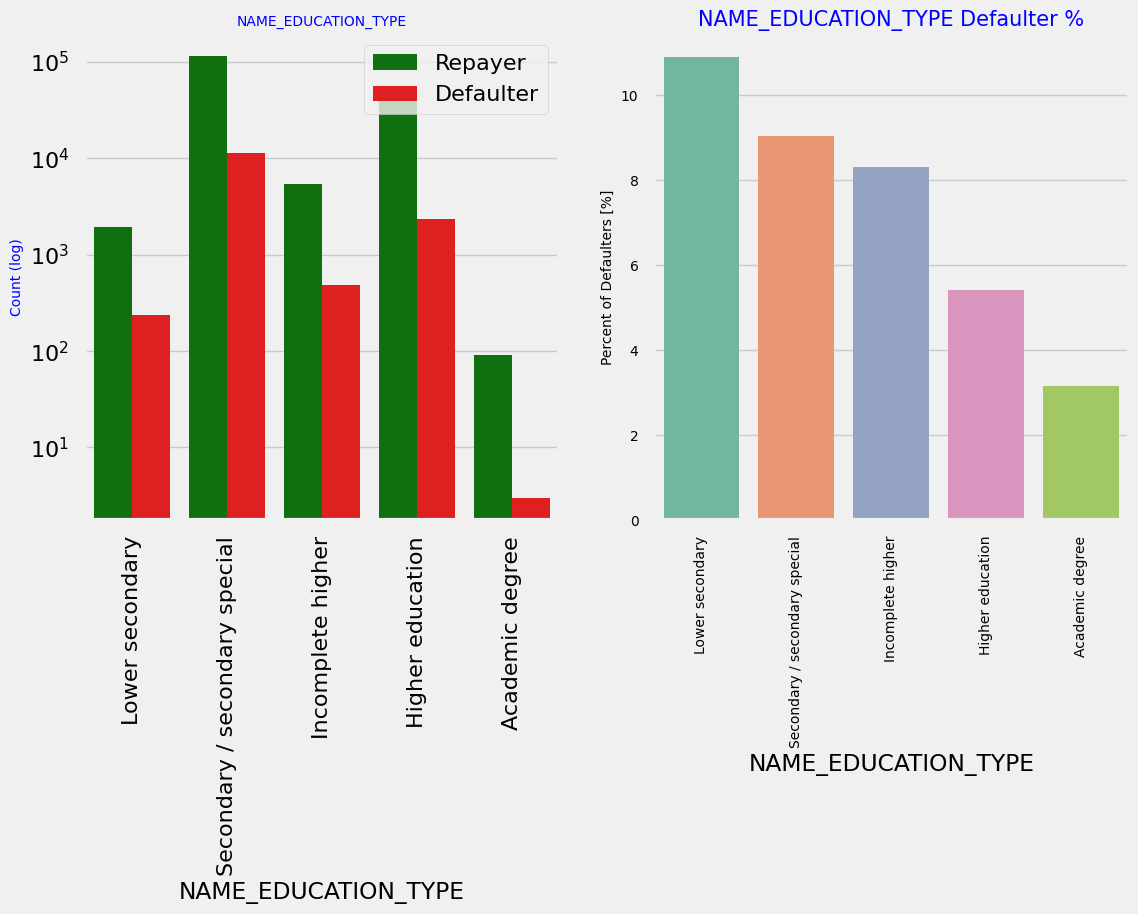

In [ ]:
univariate_categorical("NAME_EDUCATION_TYPE",True,True,True)

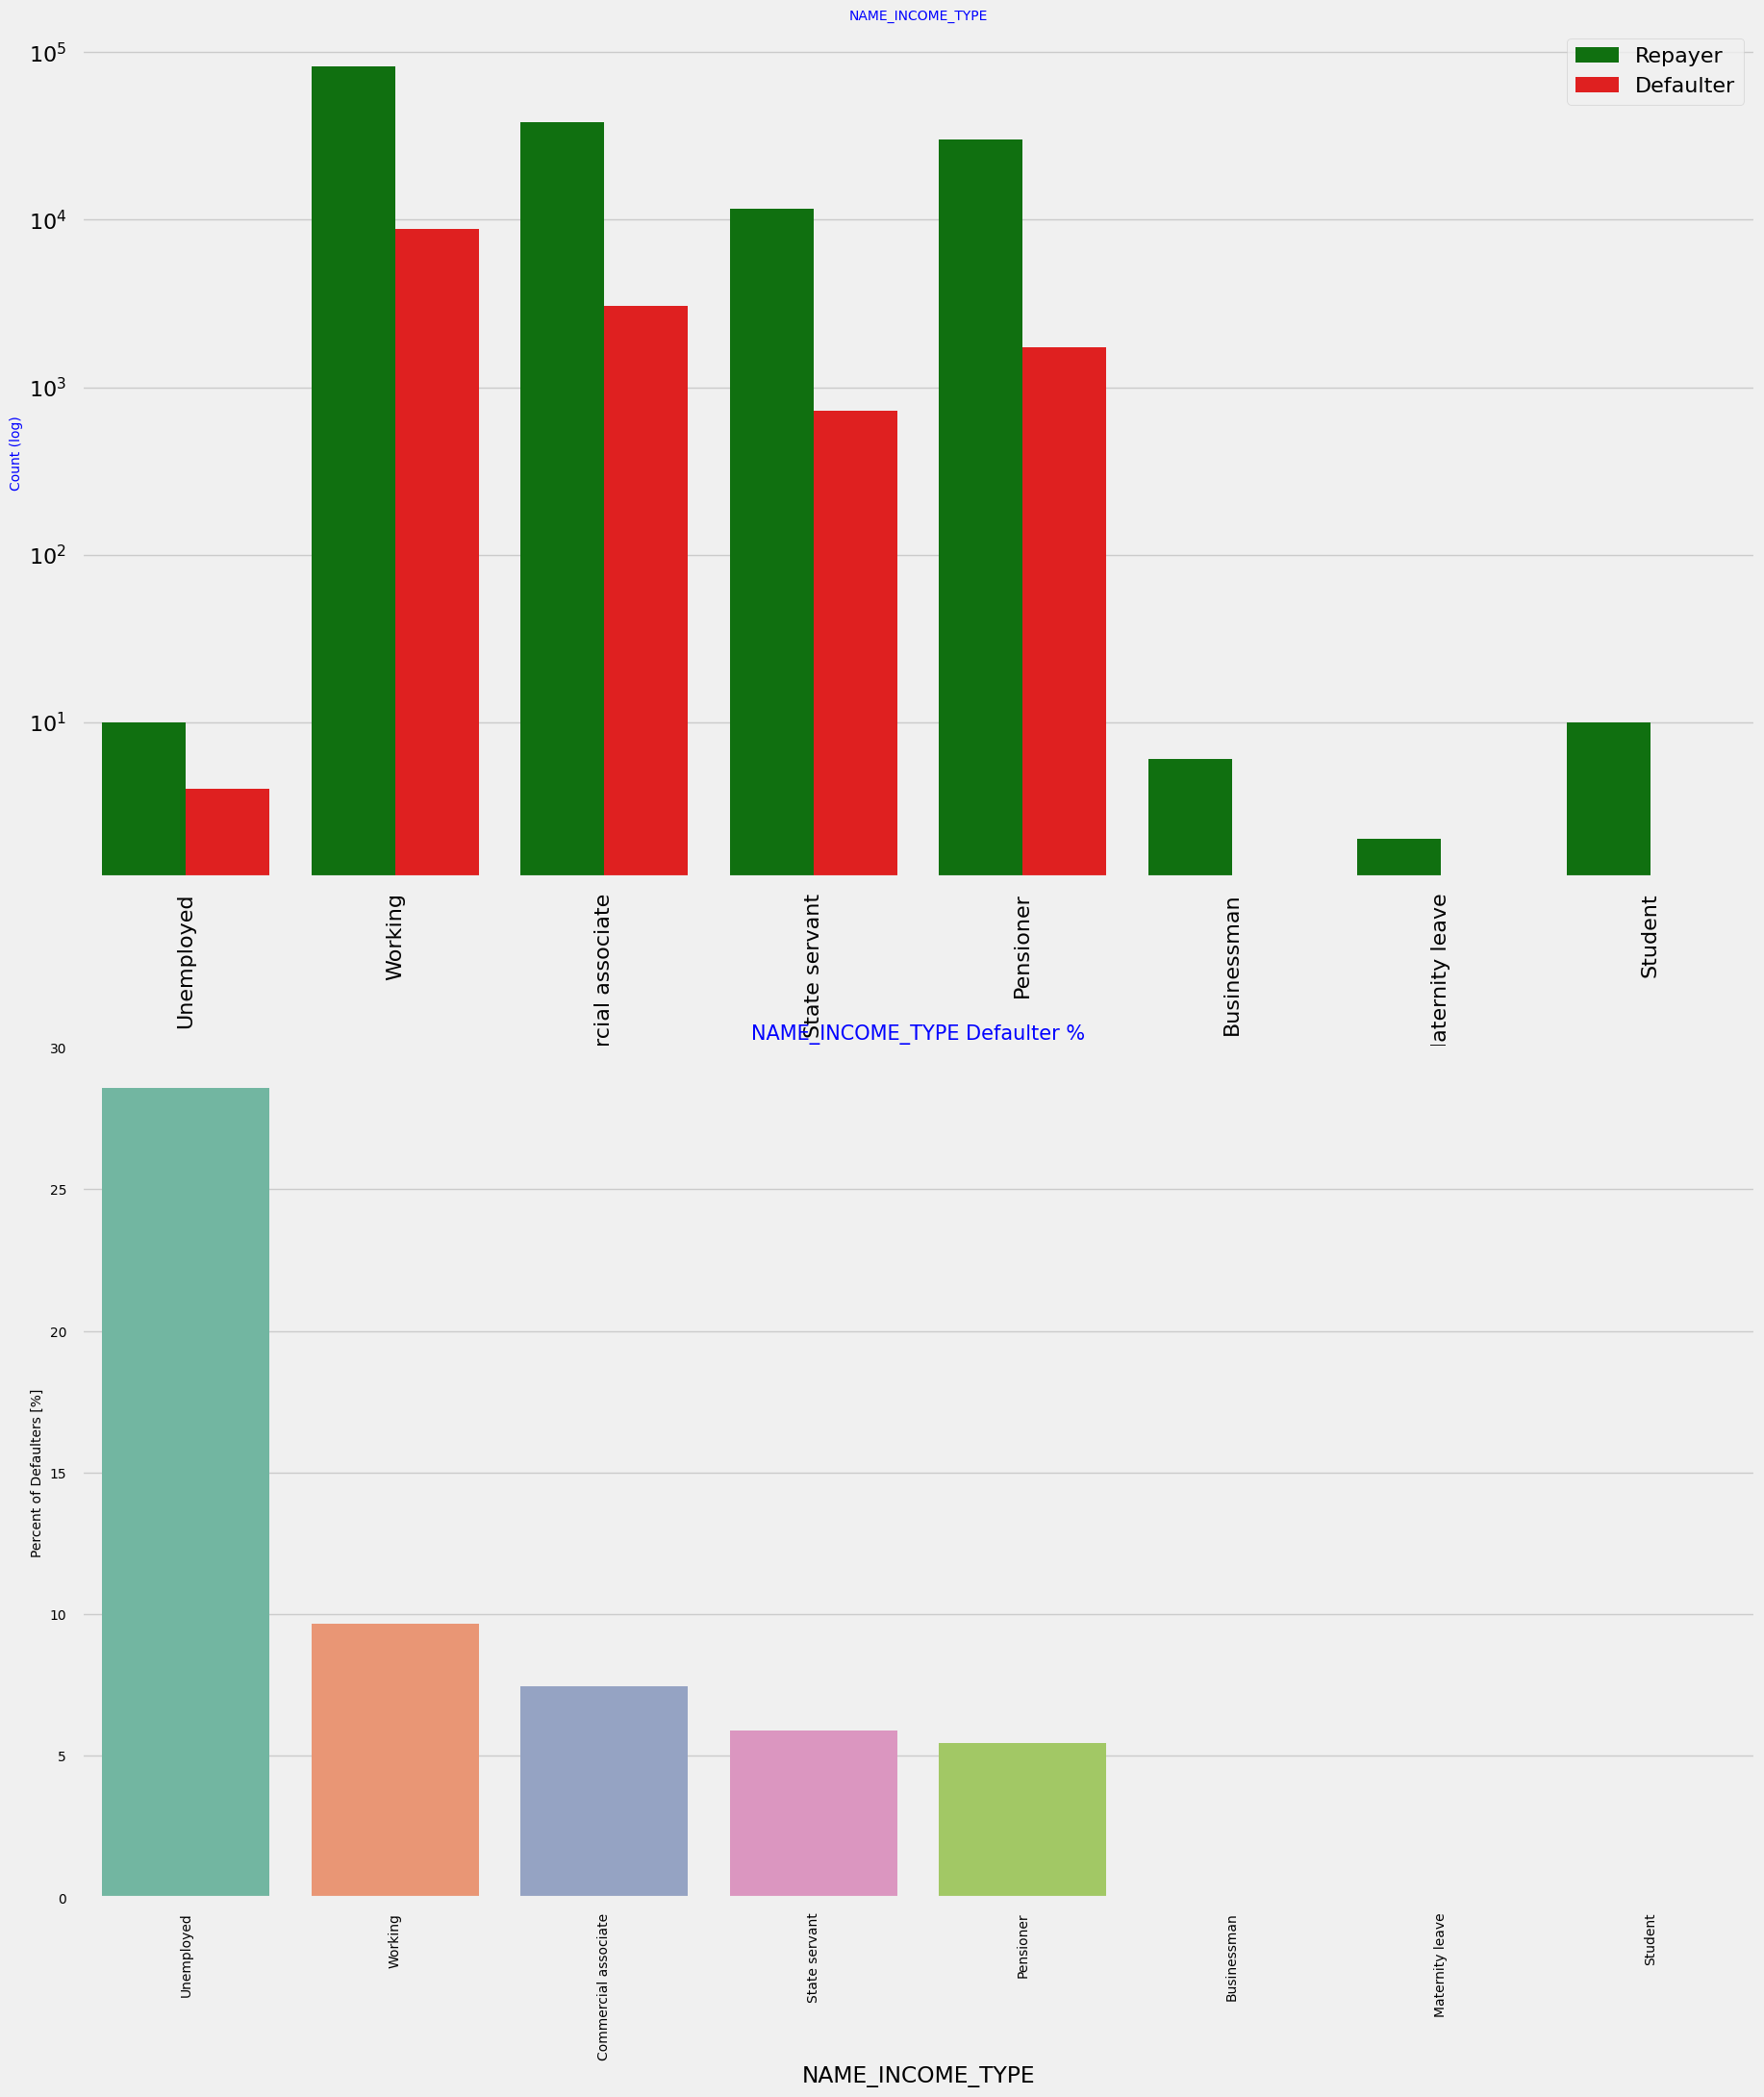

In [ ]:
univariate_categorical("NAME_INCOME_TYPE",True,True,False)

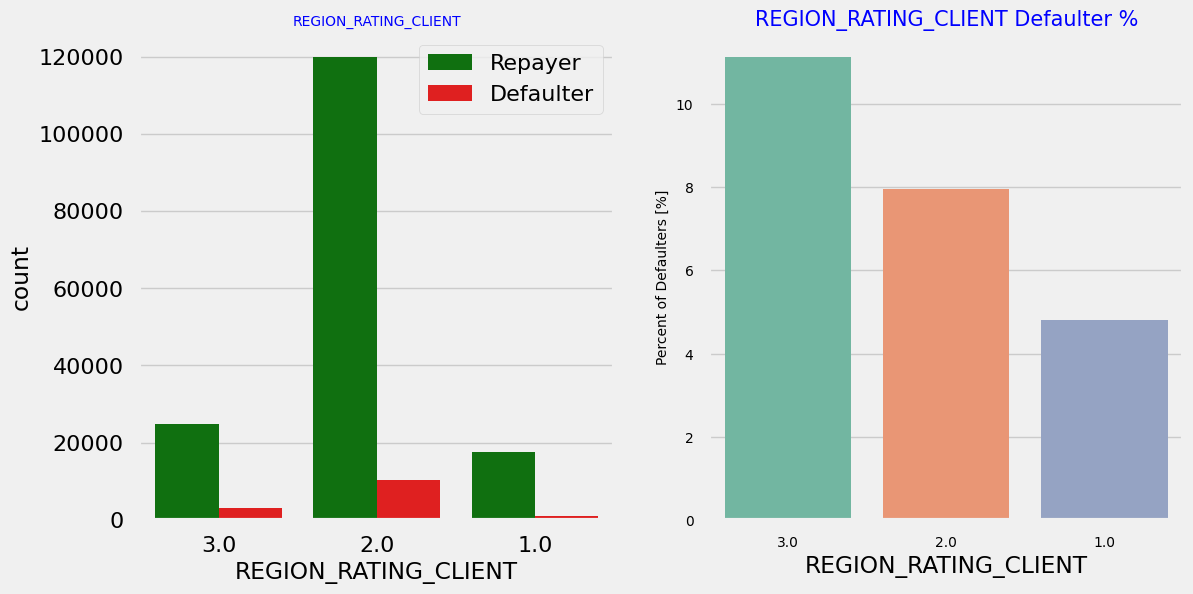

In [ ]:
univariate_categorical("REGION_RATING_CLIENT",False,False,True)

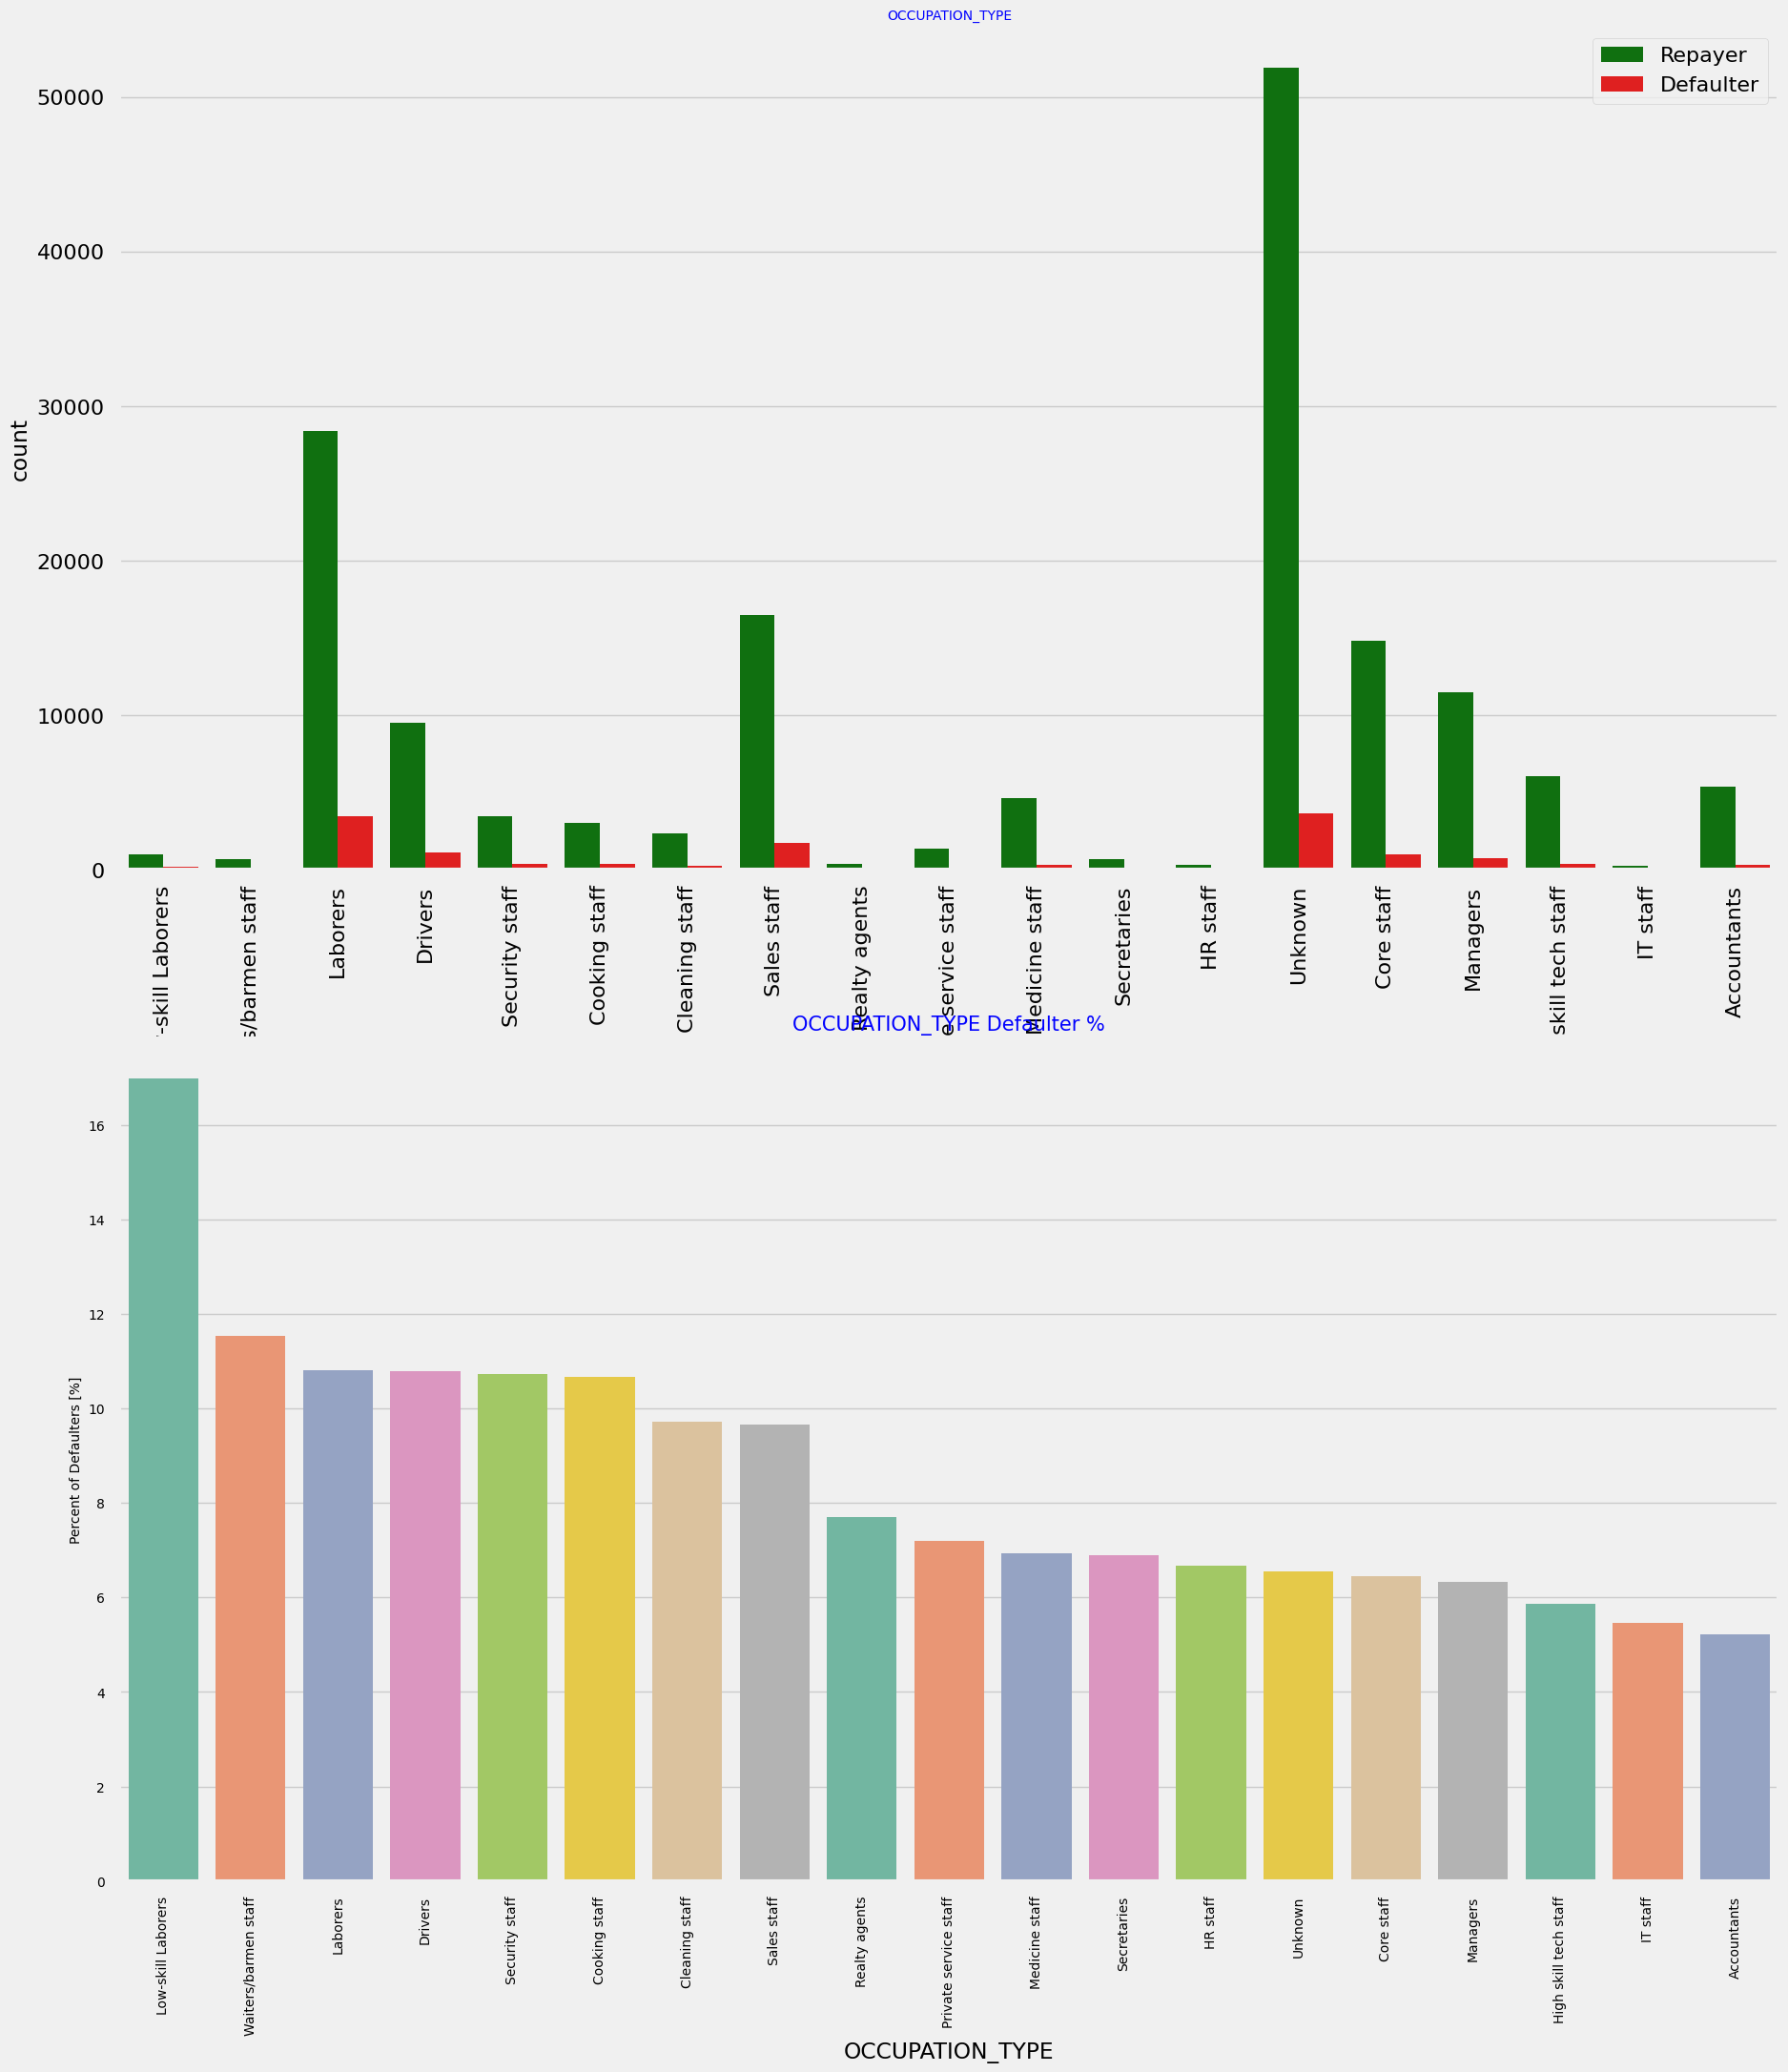

In [ ]:
univariate_categorical("OCCUPATION_TYPE",False,True,False)

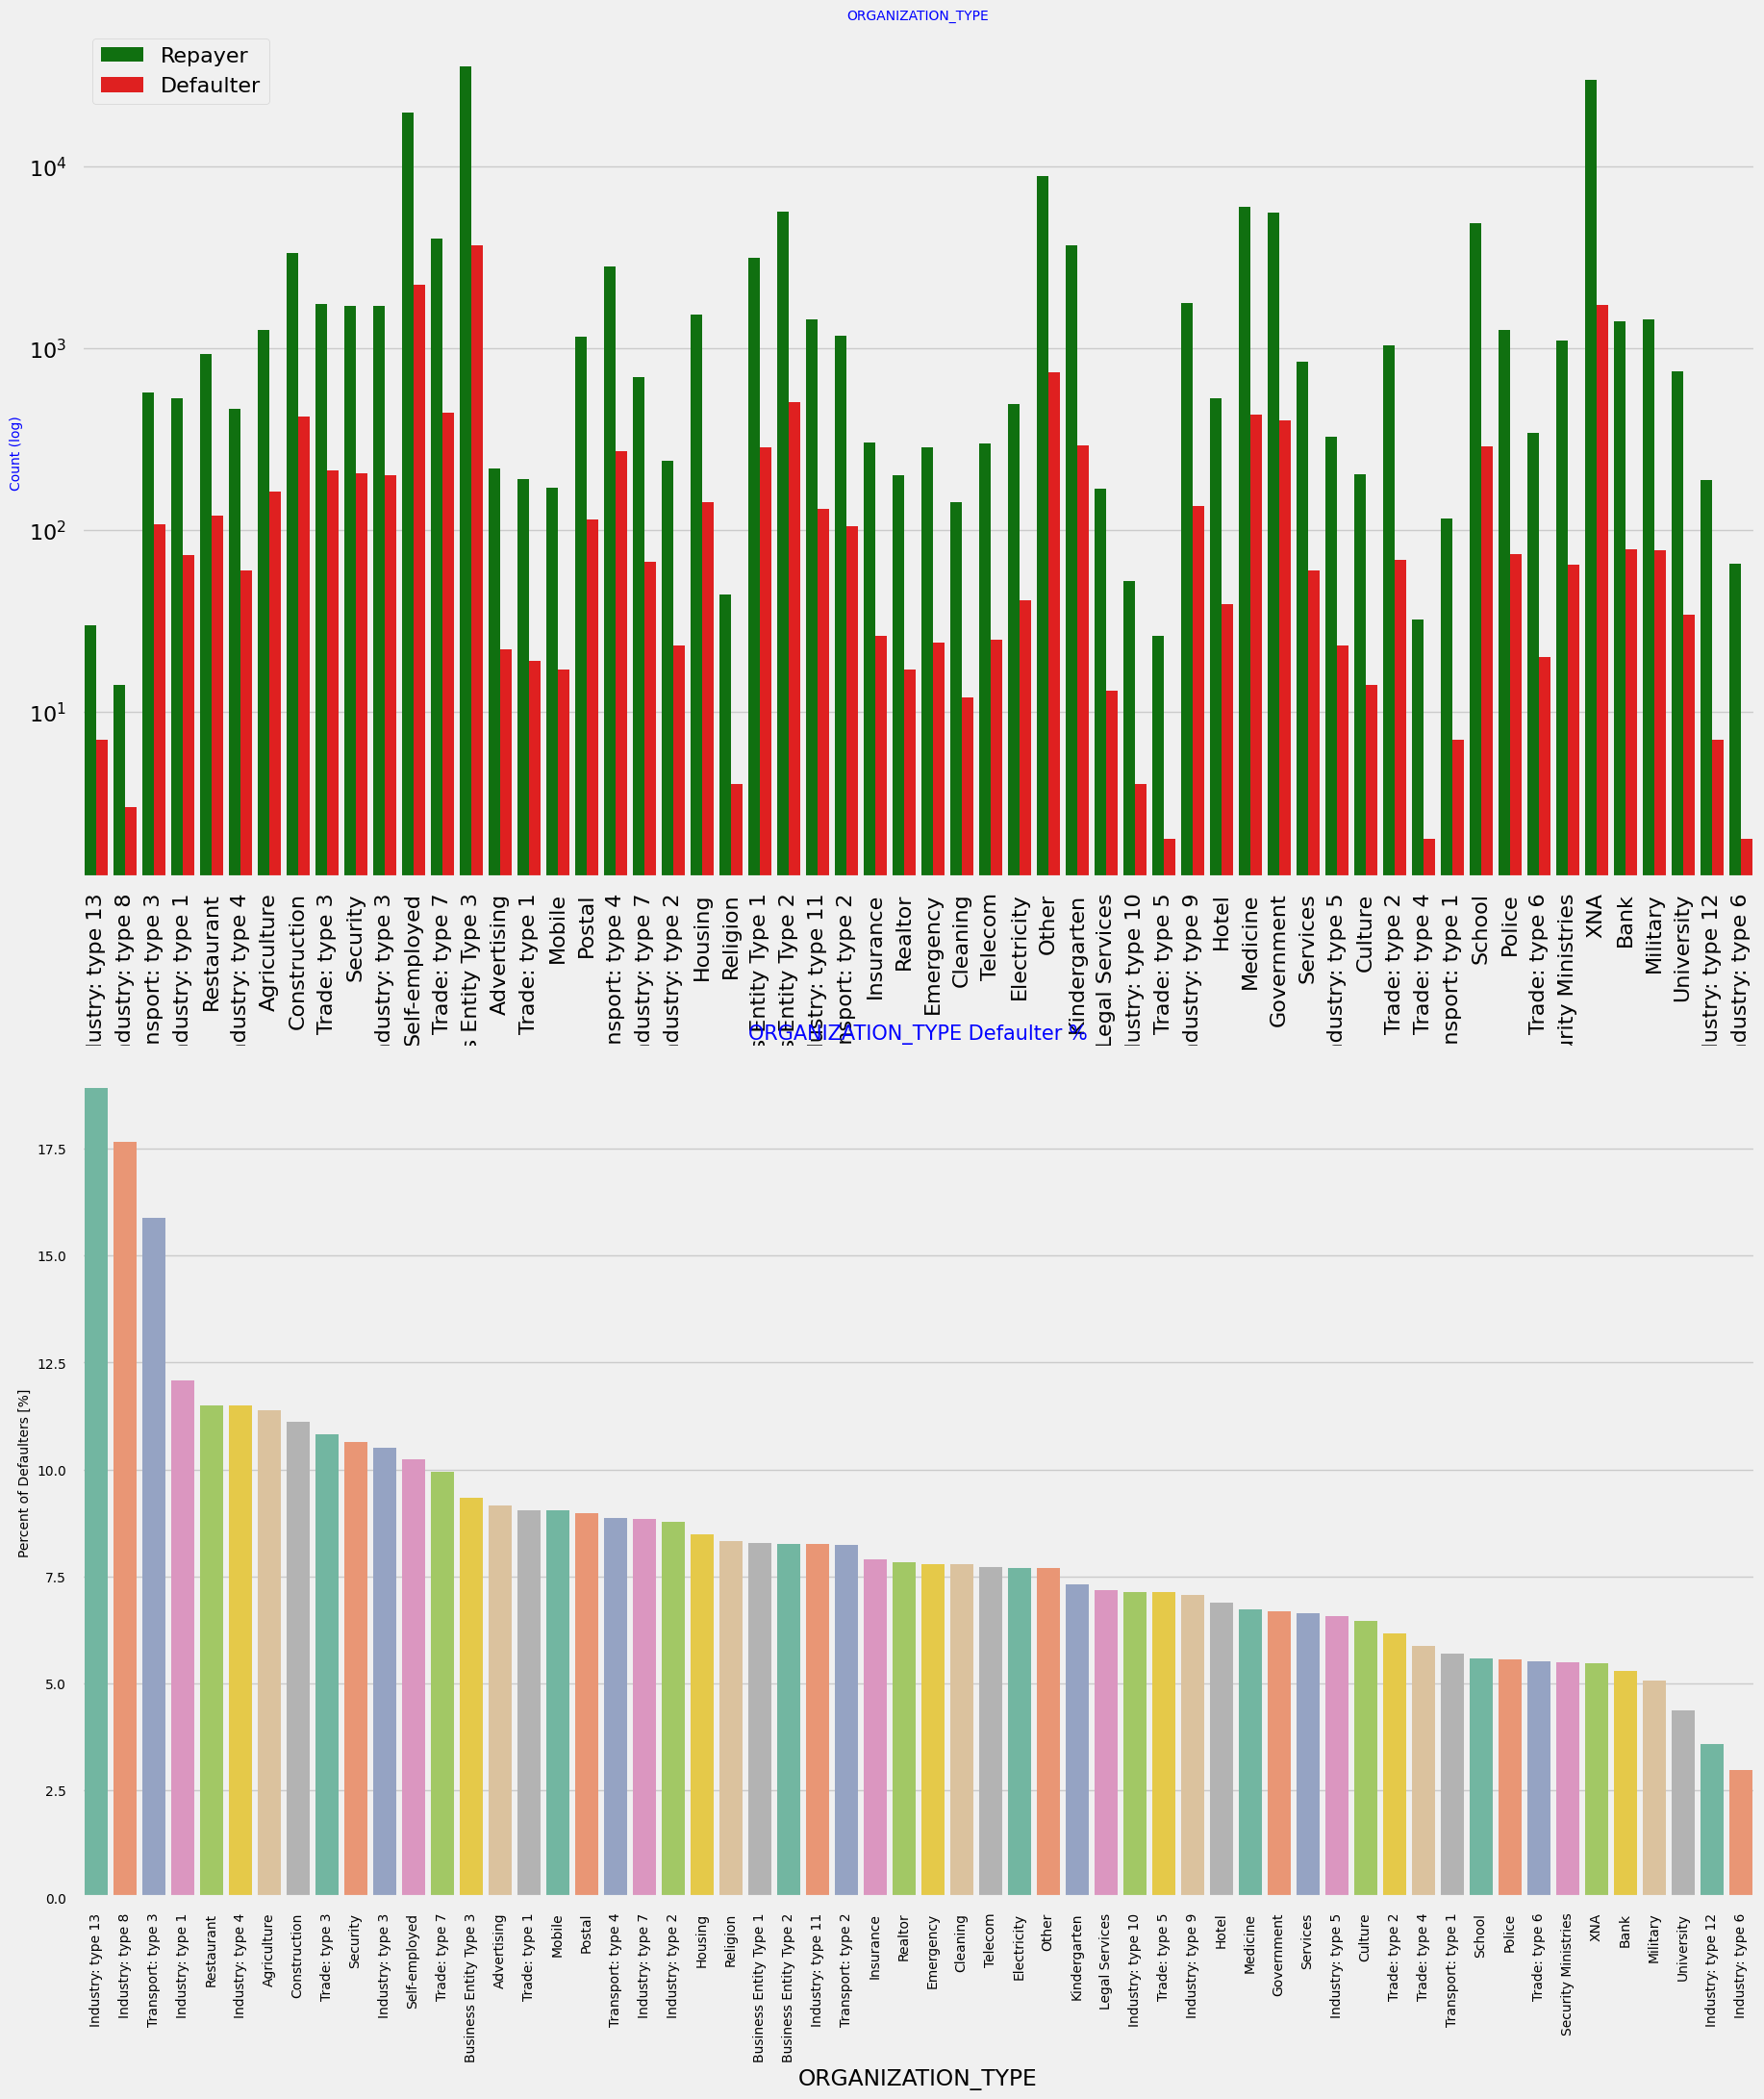

In [ ]:
univariate_categorical("ORGANIZATION_TYPE",True,True,False)

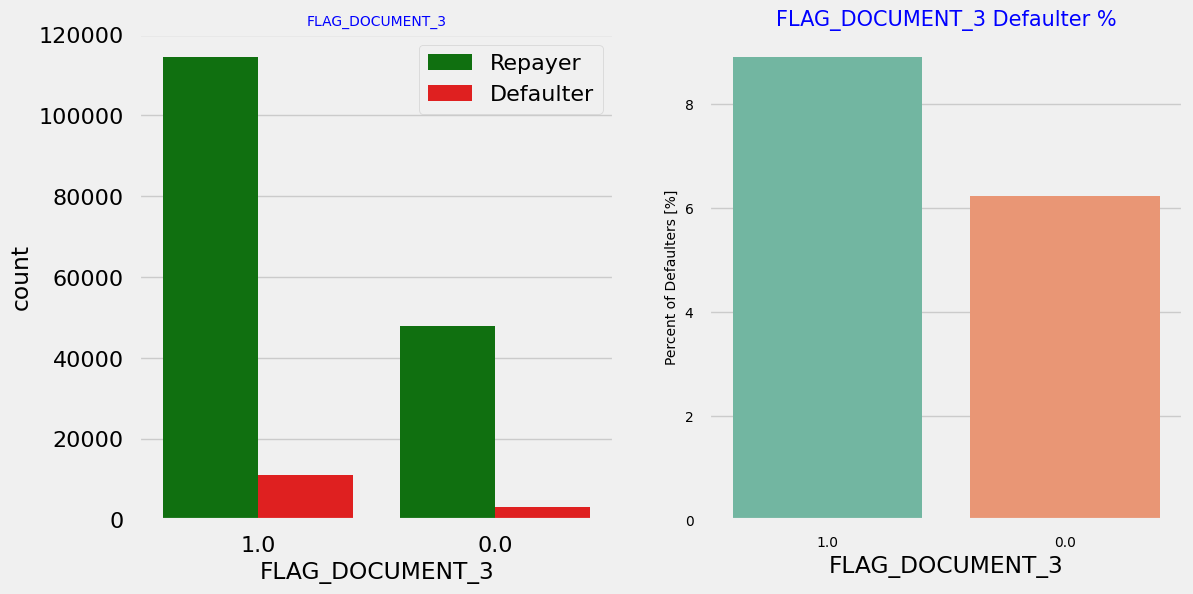

In [ ]:
univariate_categorical("FLAG_DOCUMENT_3",False,False,True)

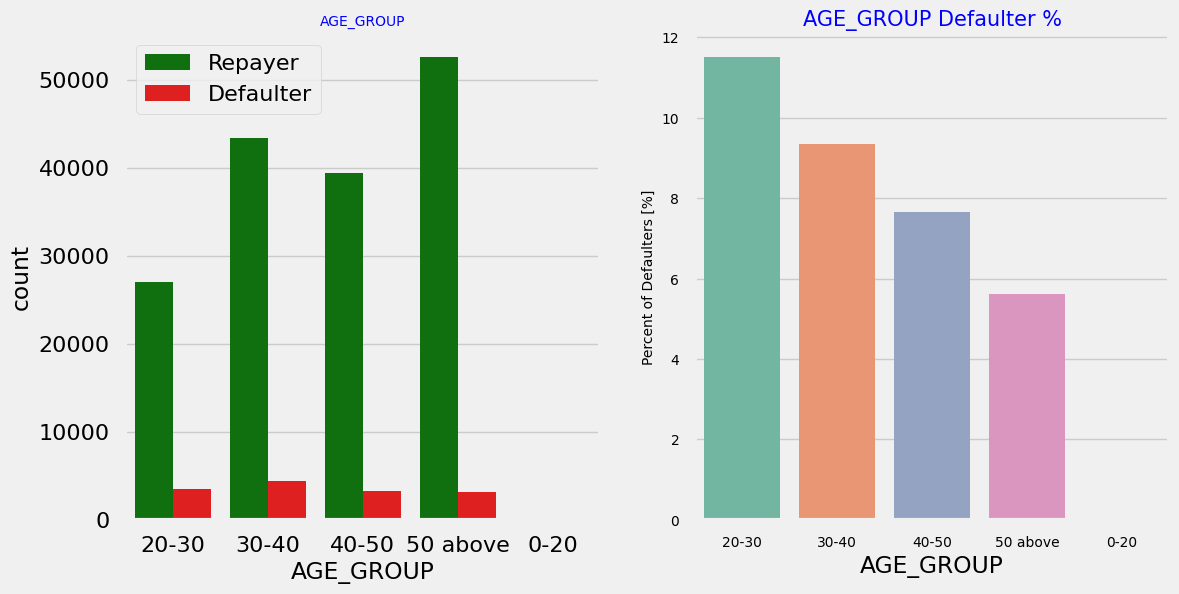

In [ ]:
univariate_categorical("AGE_GROUP",False,False,True)

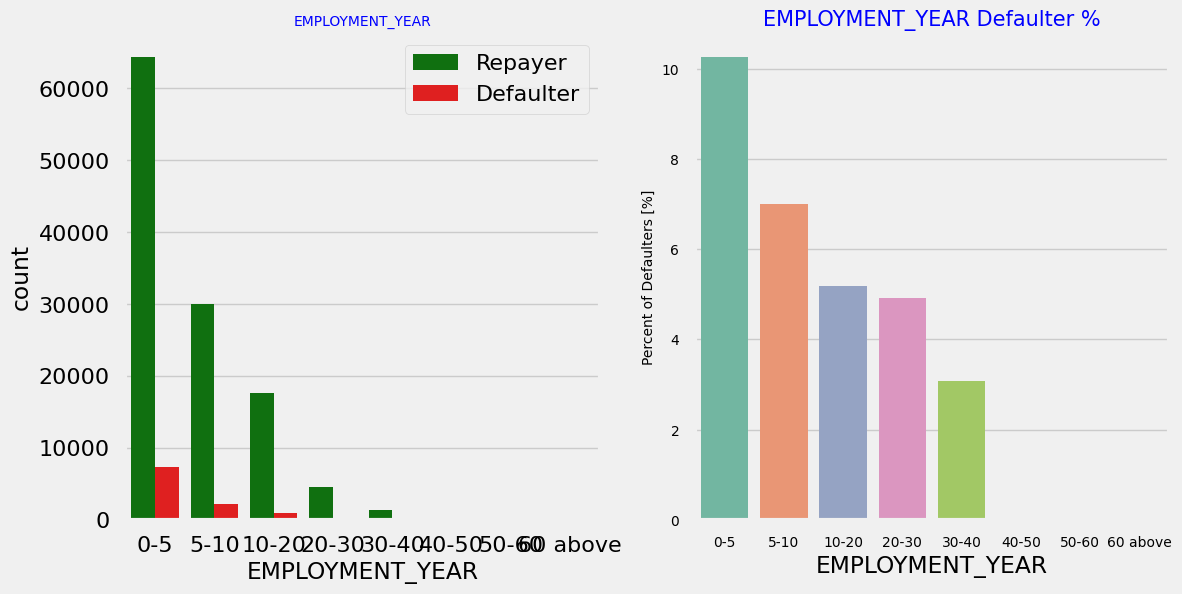

In [ ]:
univariate_categorical("EMPLOYMENT_YEAR",False,False,True)

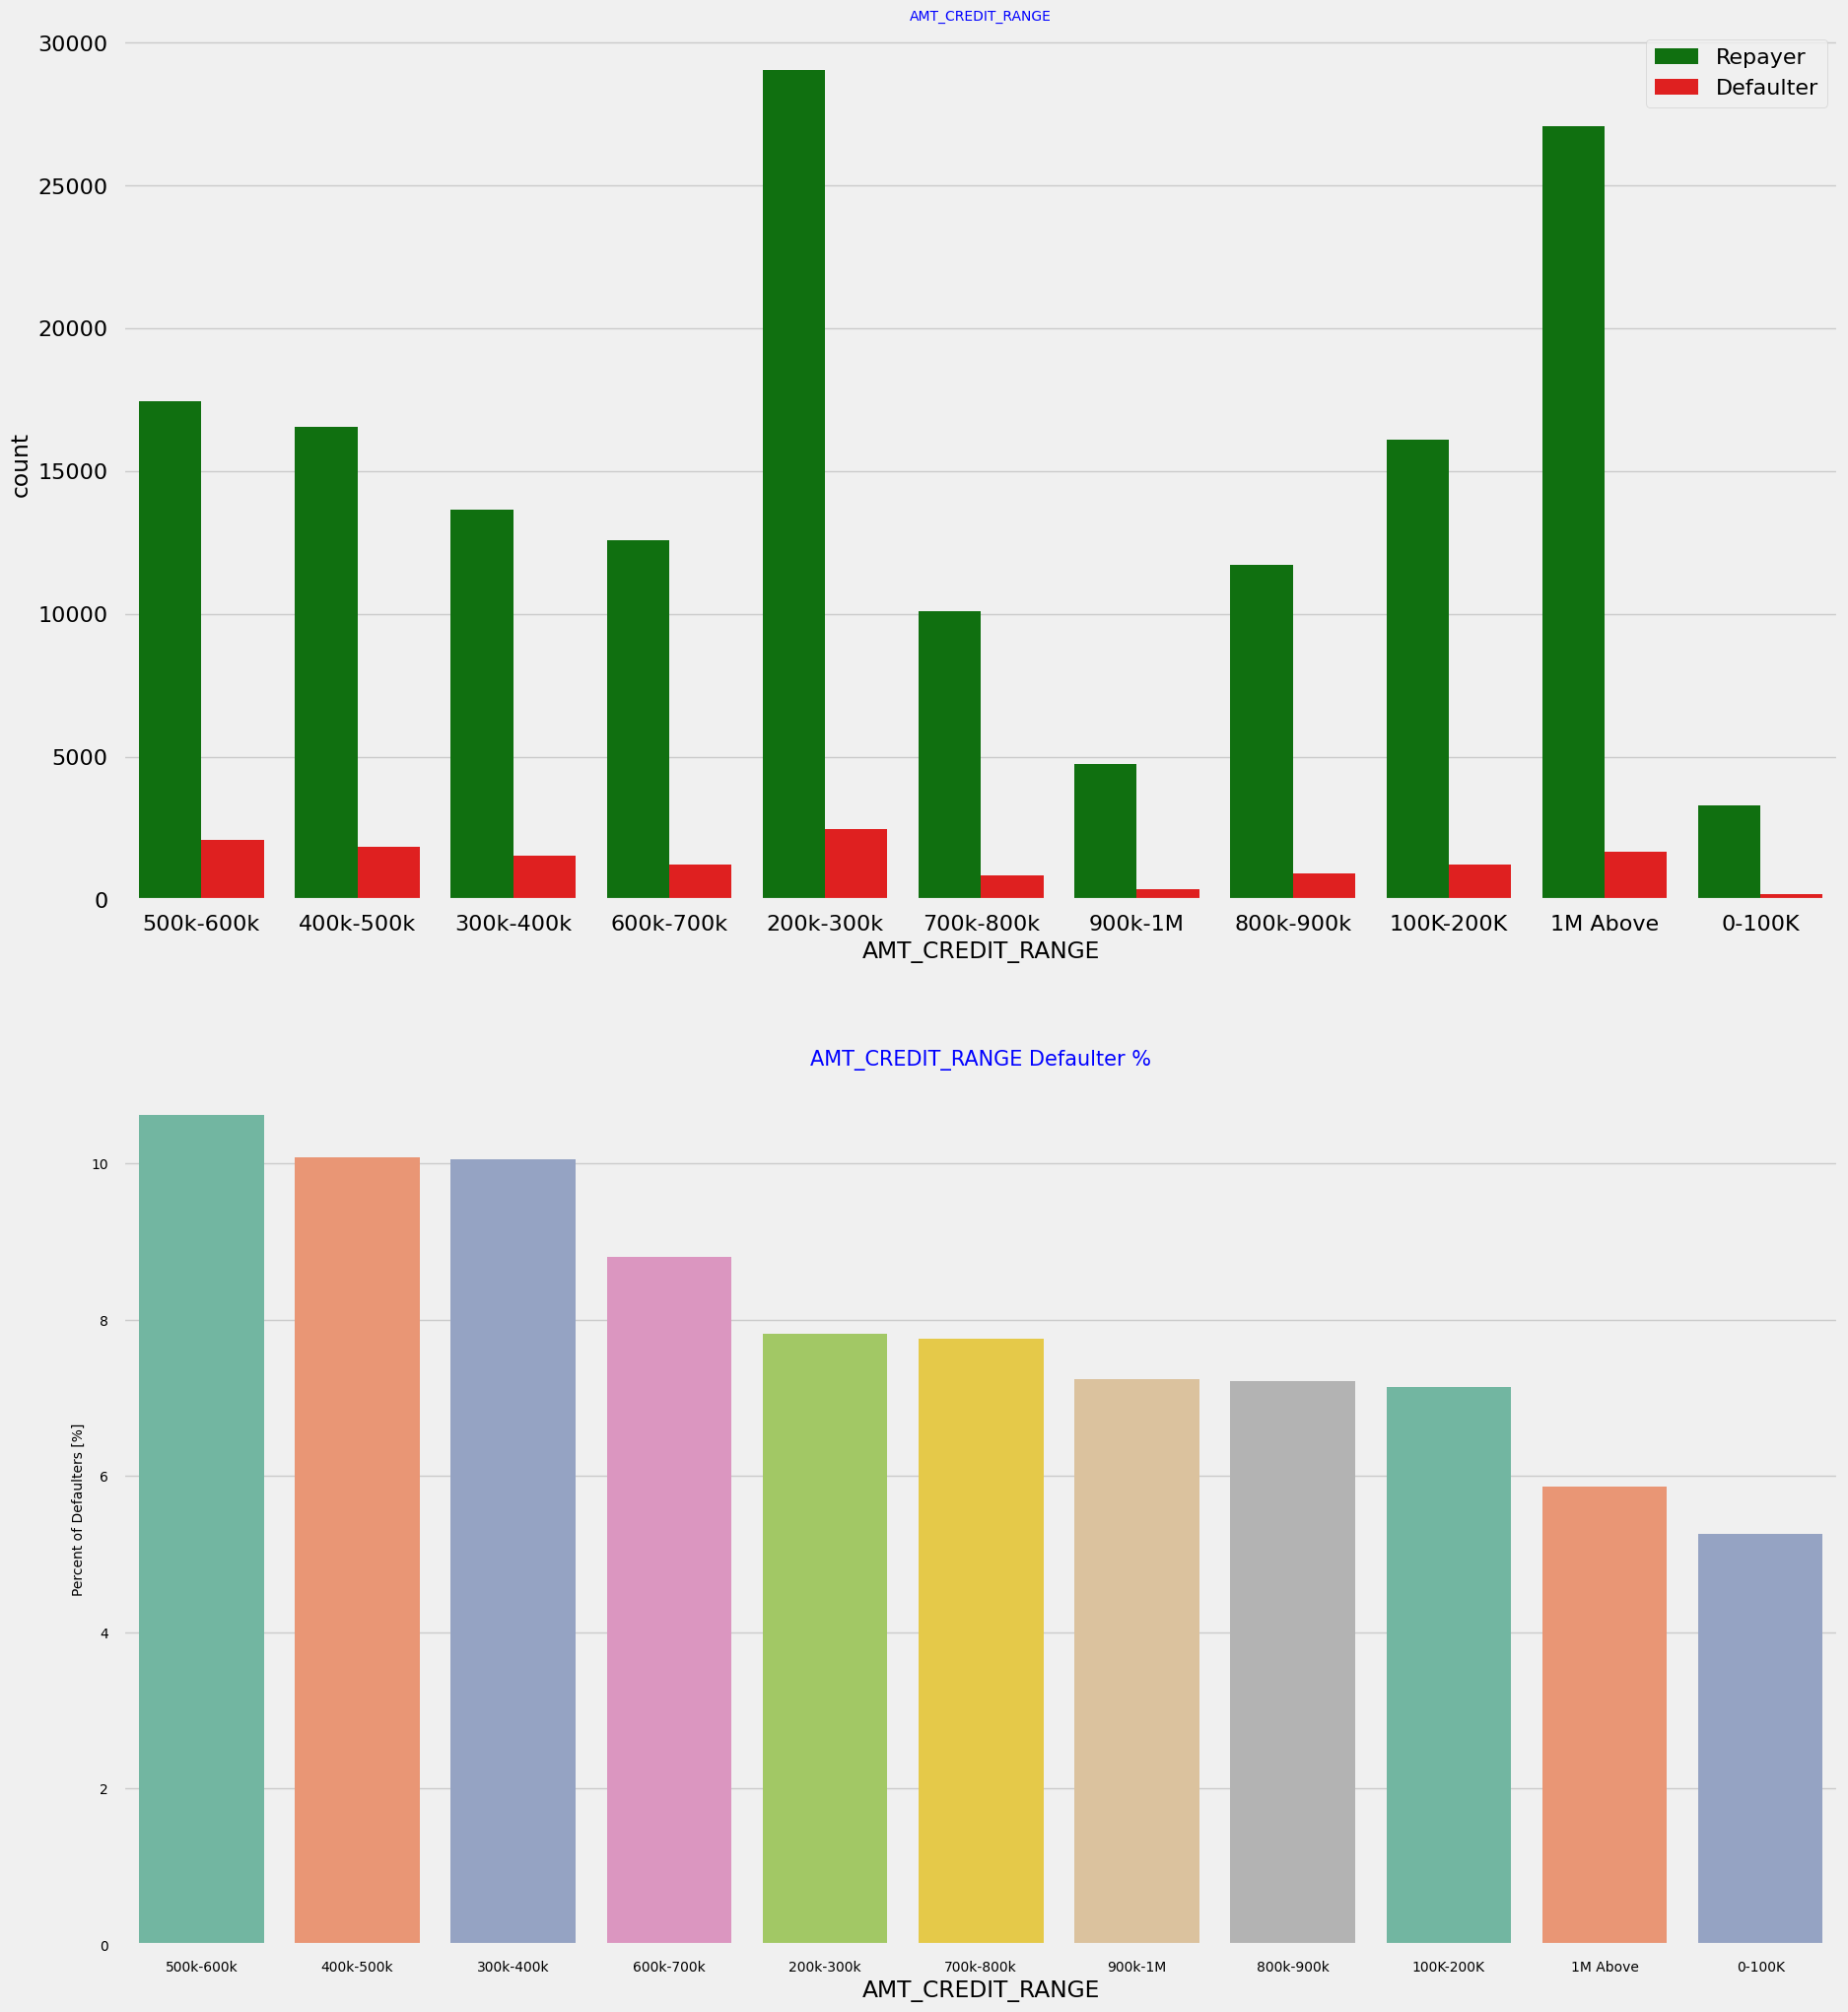

In [ ]:
univariate_categorical("AMT_CREDIT_RANGE",False,False,False)

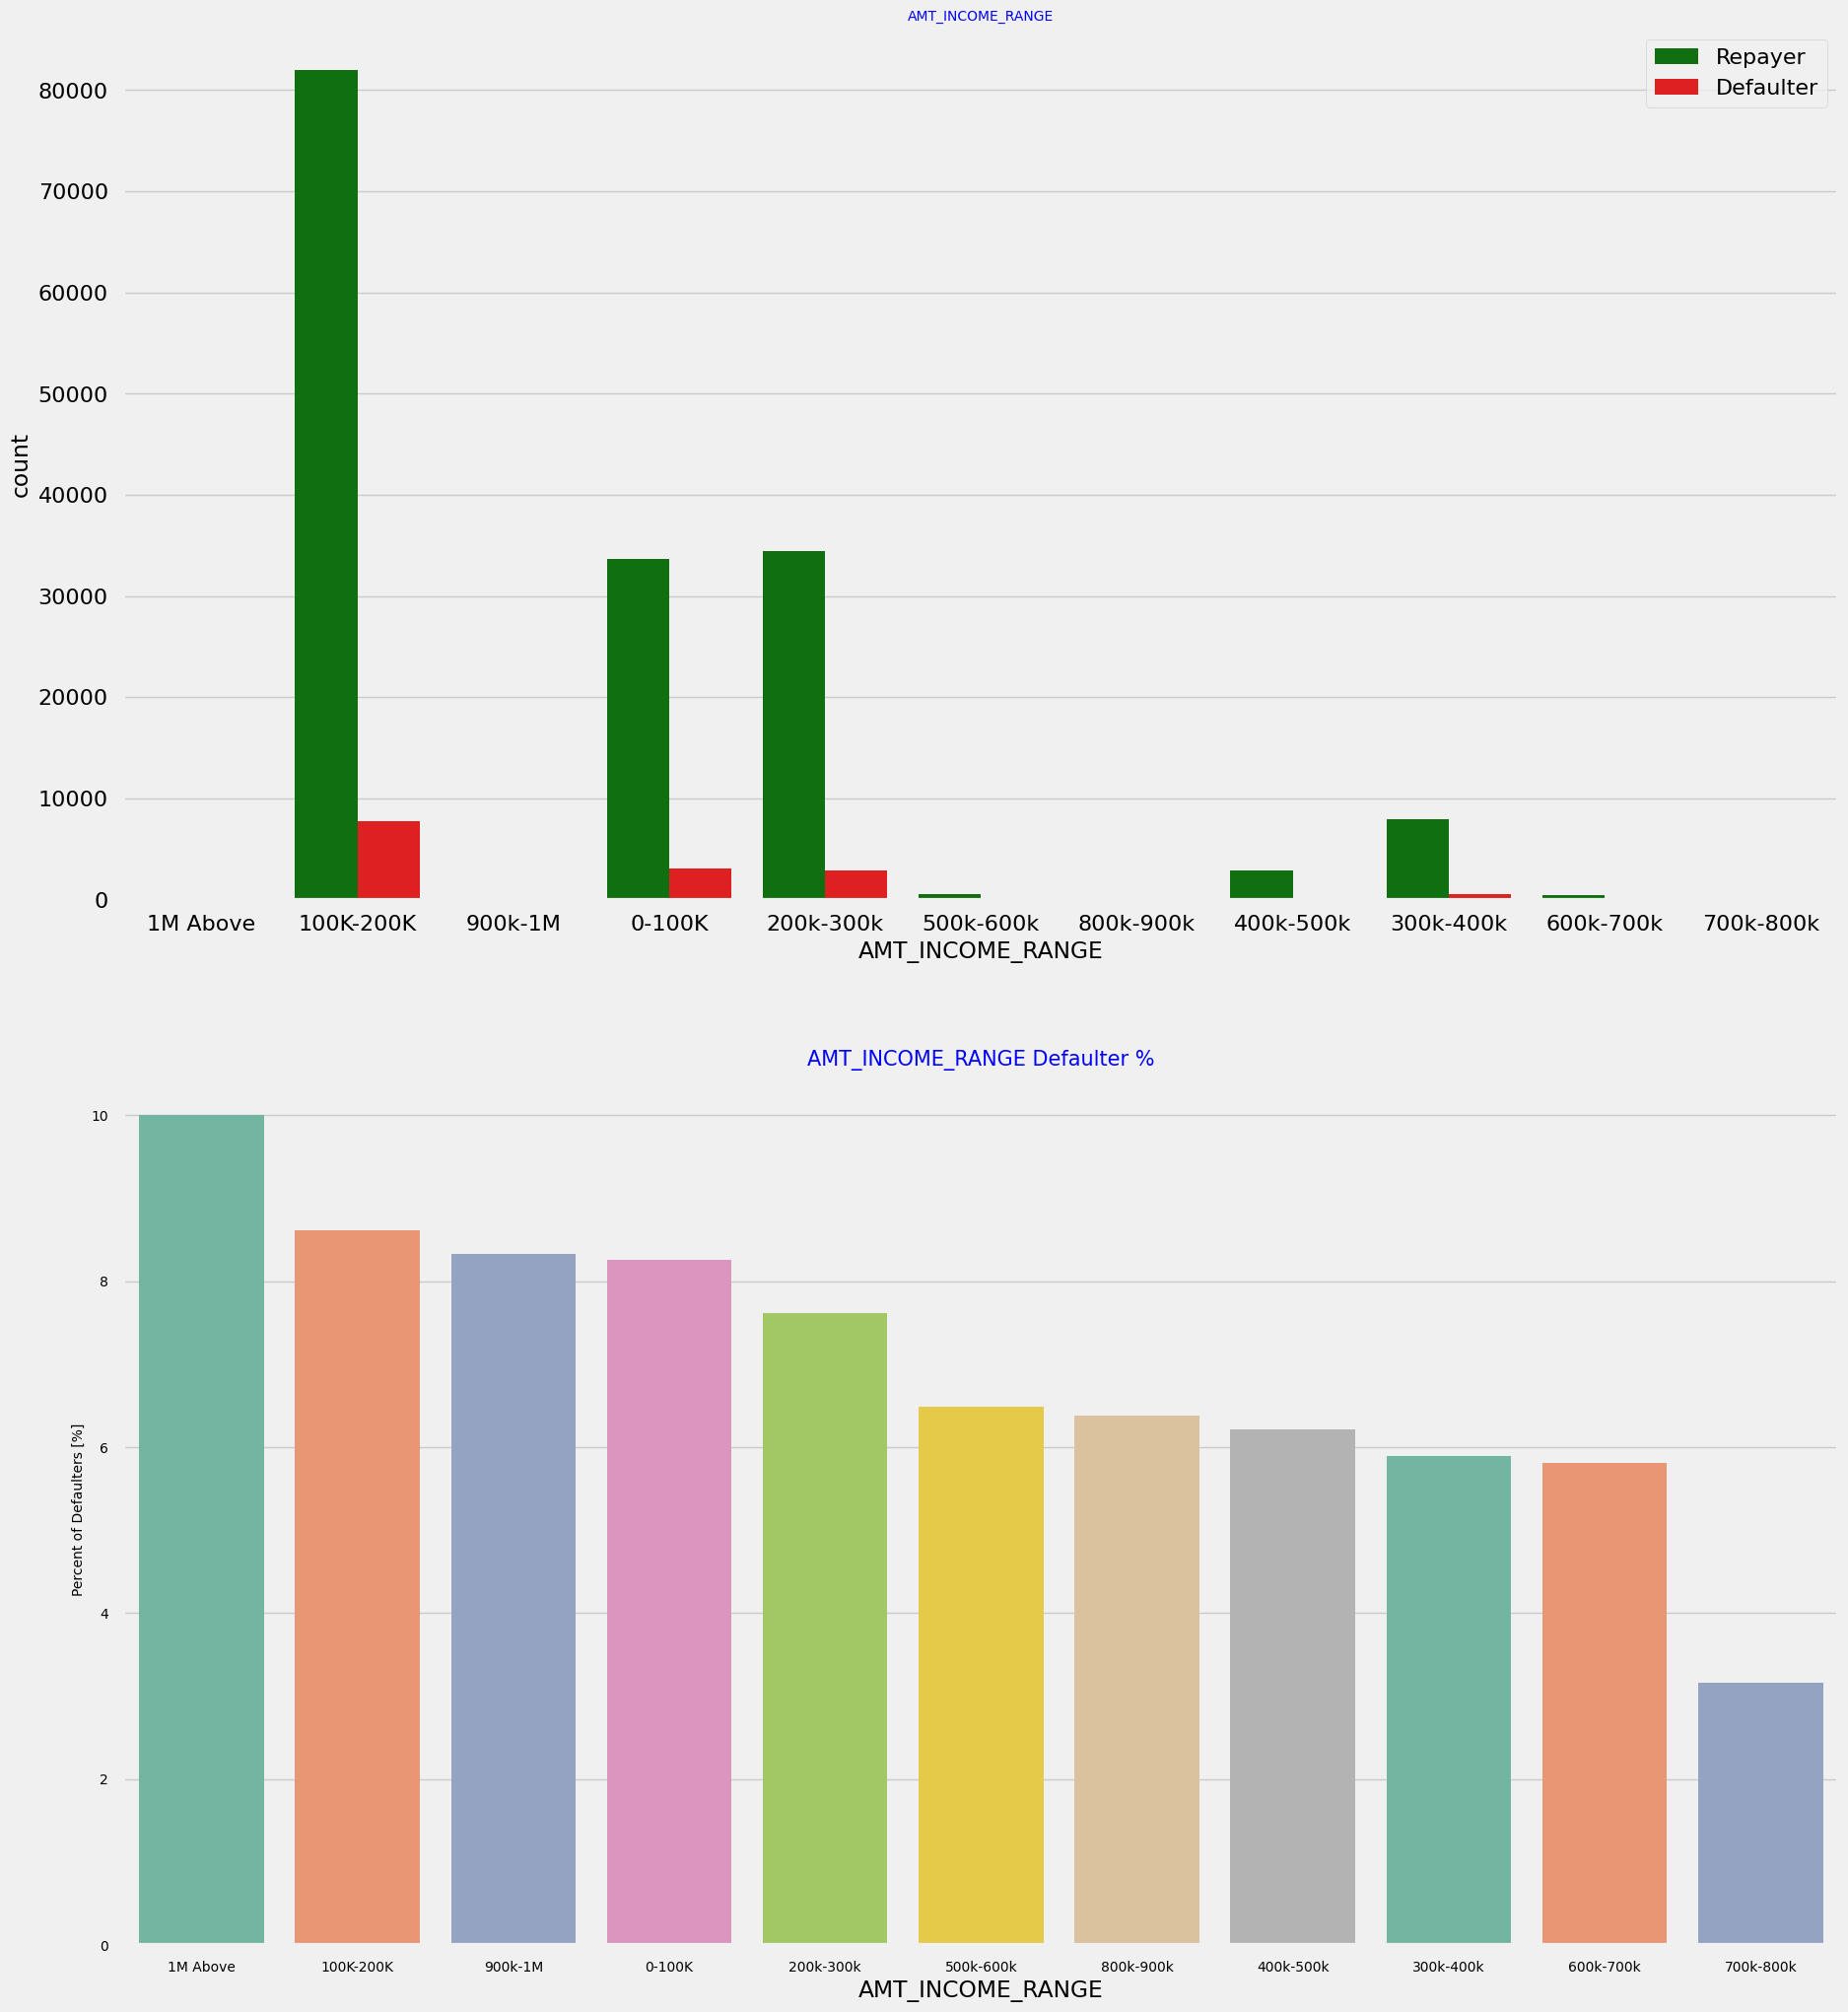

In [ ]:
univariate_categorical("AMT_INCOME_RANGE",False,False,False)

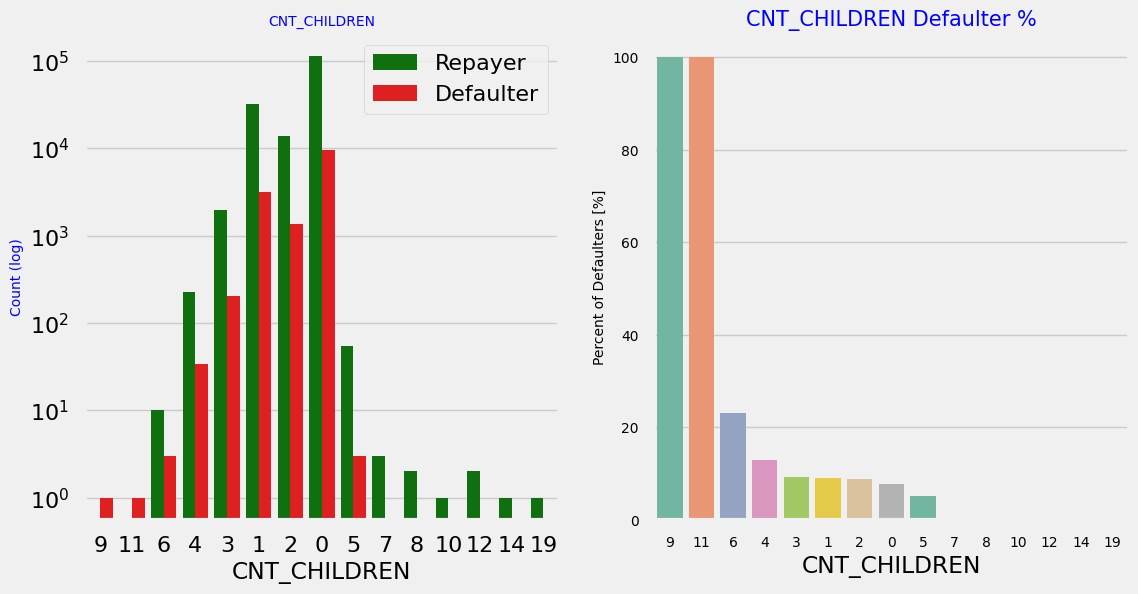

In [ ]:
univariate_categorical("CNT_CHILDREN",True)

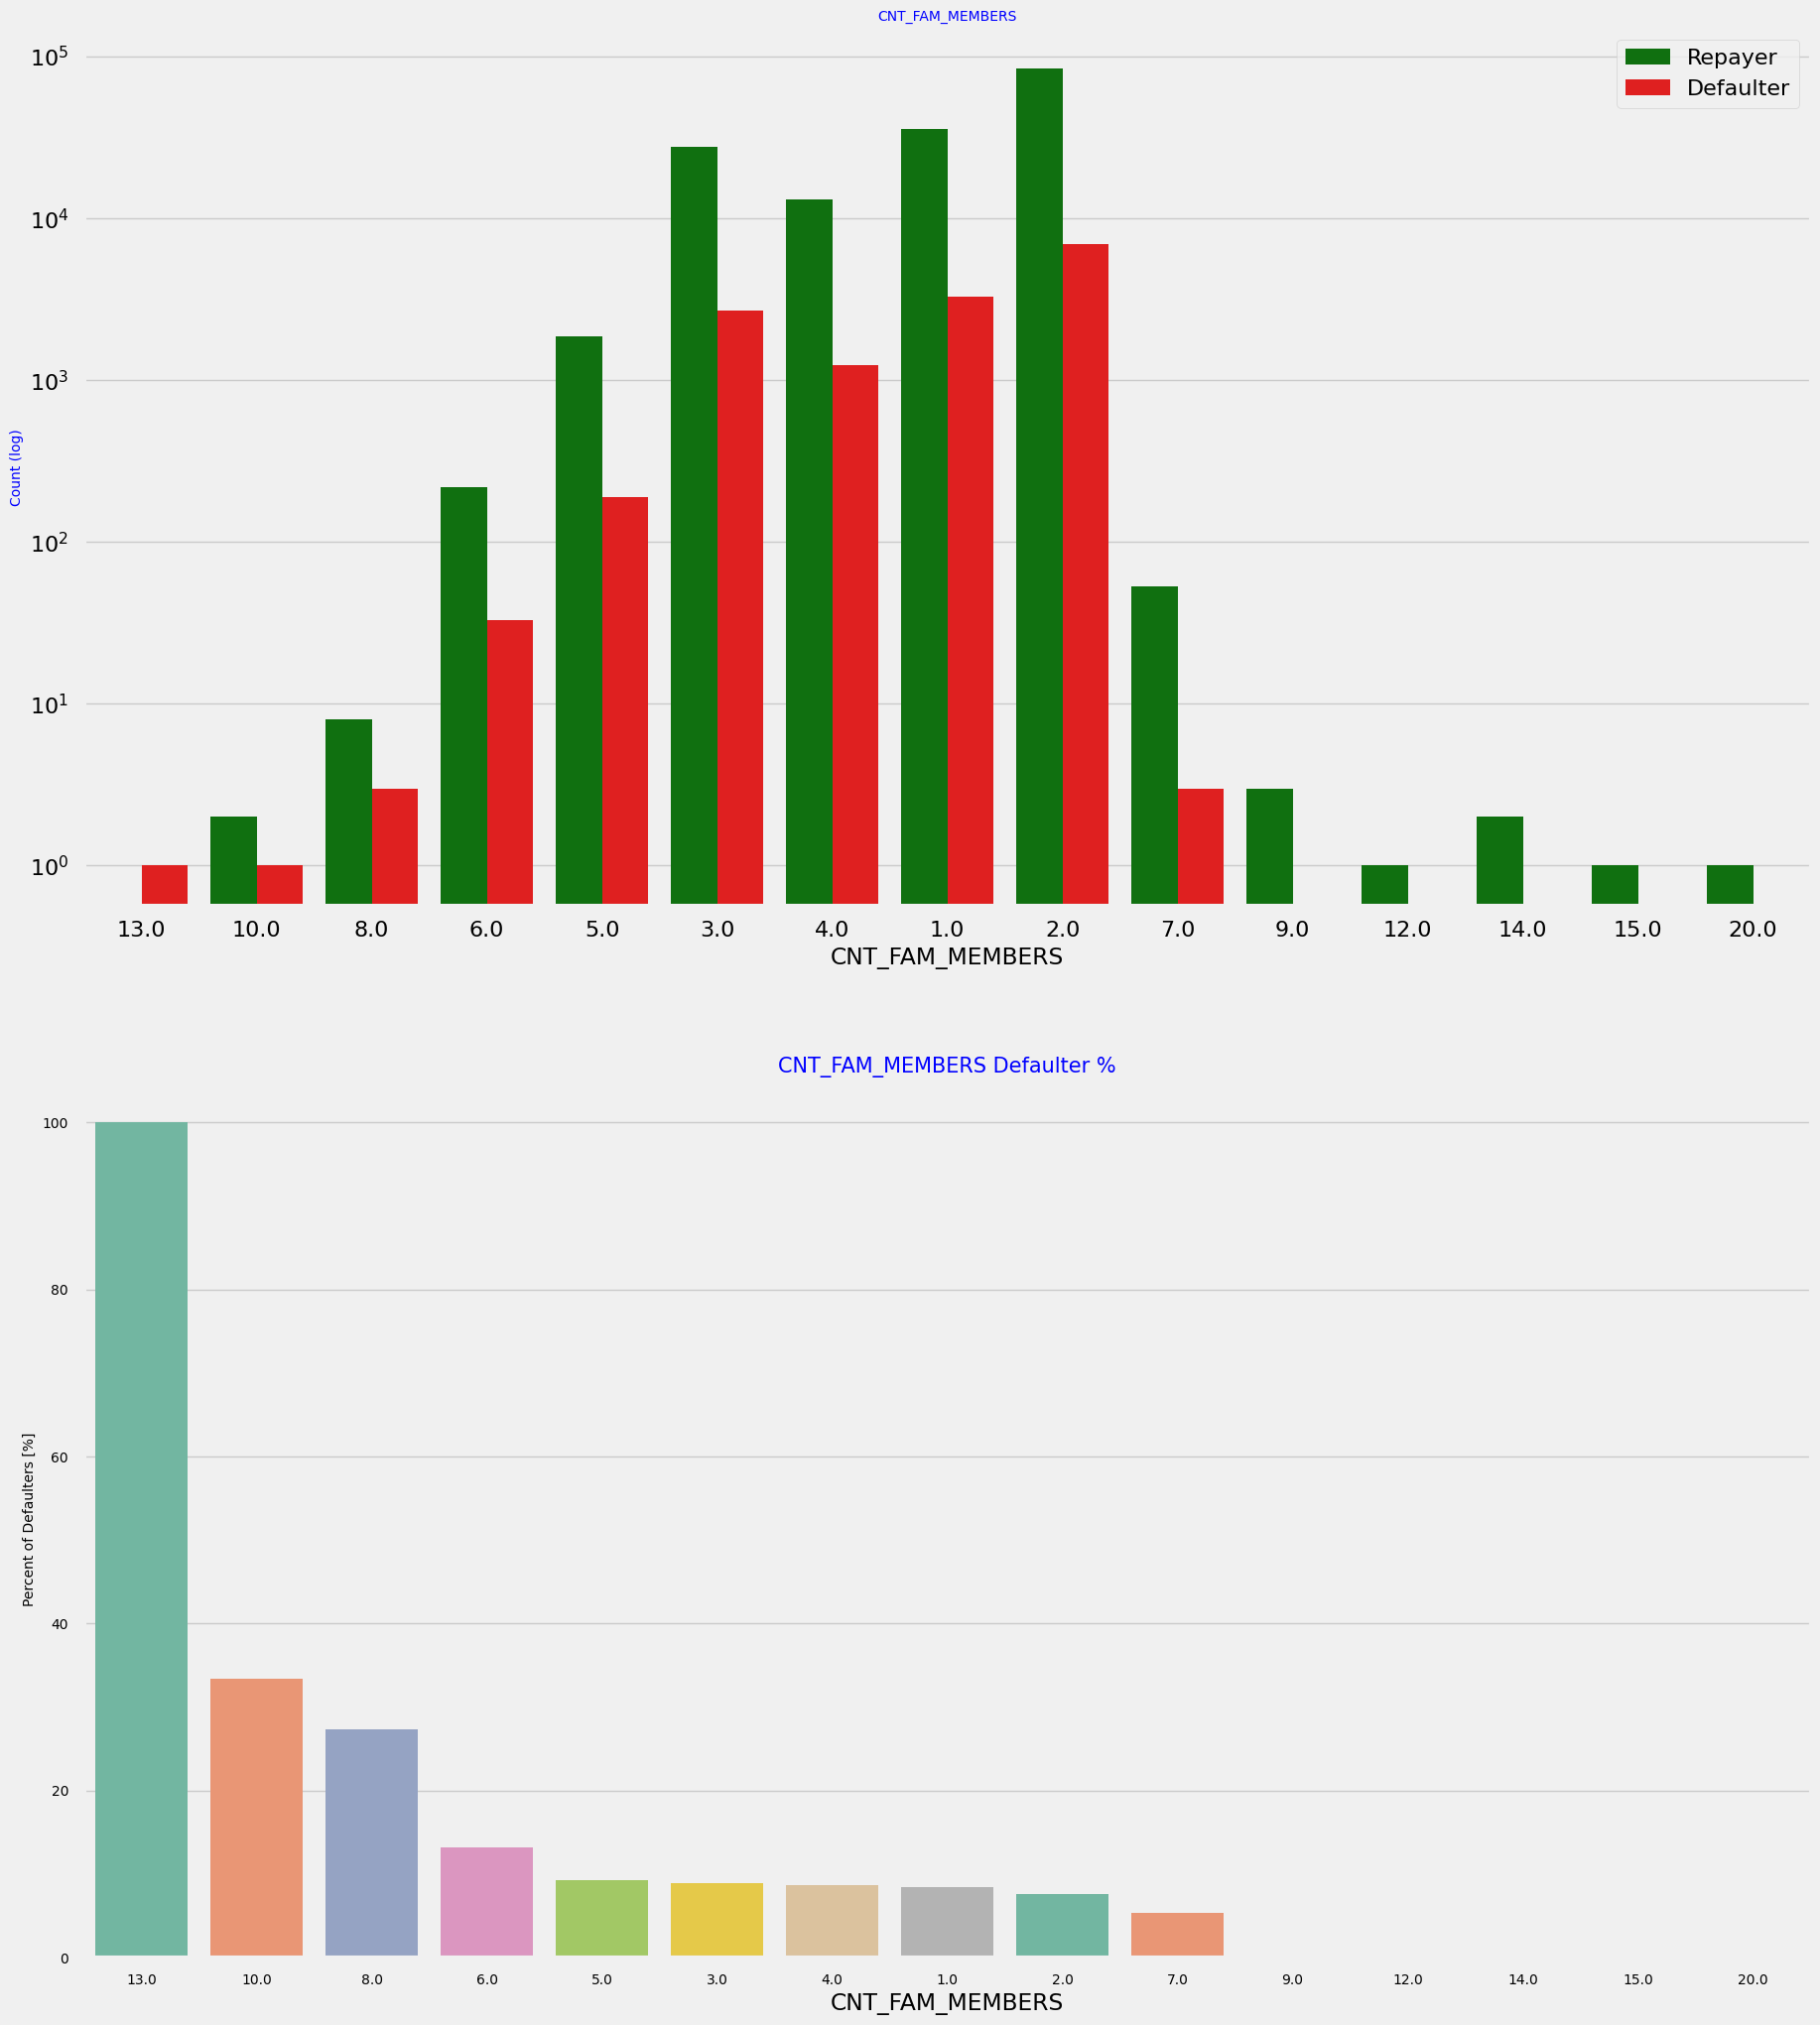

In [ ]:
univariate_categorical("CNT_FAM_MEMBERS",True, False, False)

### **Categorical Bi/Multivariate Analysis**


In [ ]:
applicationDF.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

count      mean       std     min       25%    50%     75%       max
NAME_INCOME_TYPE                                                                            
Businessman               6.0  7.800000  7.698376  1.8000  2.812500  5.625  8.4375    22.500
Commercial associate  41153.0  2.025311  1.245128  0.2700  1.350000  1.800  2.2500    38.250
Maternity leave           2.0  2.475000  1.590990  1.3500  1.912500  2.475  3.0375     3.600
Pensioner             31769.0  1.359618  0.773058  0.2565  0.900000  1.170  1.6200    22.500
State servant         12312.0  1.796605  0.950989  0.2700  1.125000  1.575  2.2500    18.900
Student                  10.0  1.552500  0.495341  0.9000  1.181250  1.575  1.8000     2.250
Unemployed               14.0  1.280571  1.033097  0.2655  0.545625  0.900  2.0250     3.375
Working               91414.0  1.637426  3.978648  0.2565  1.125000  1.350  2.0250  1170.000

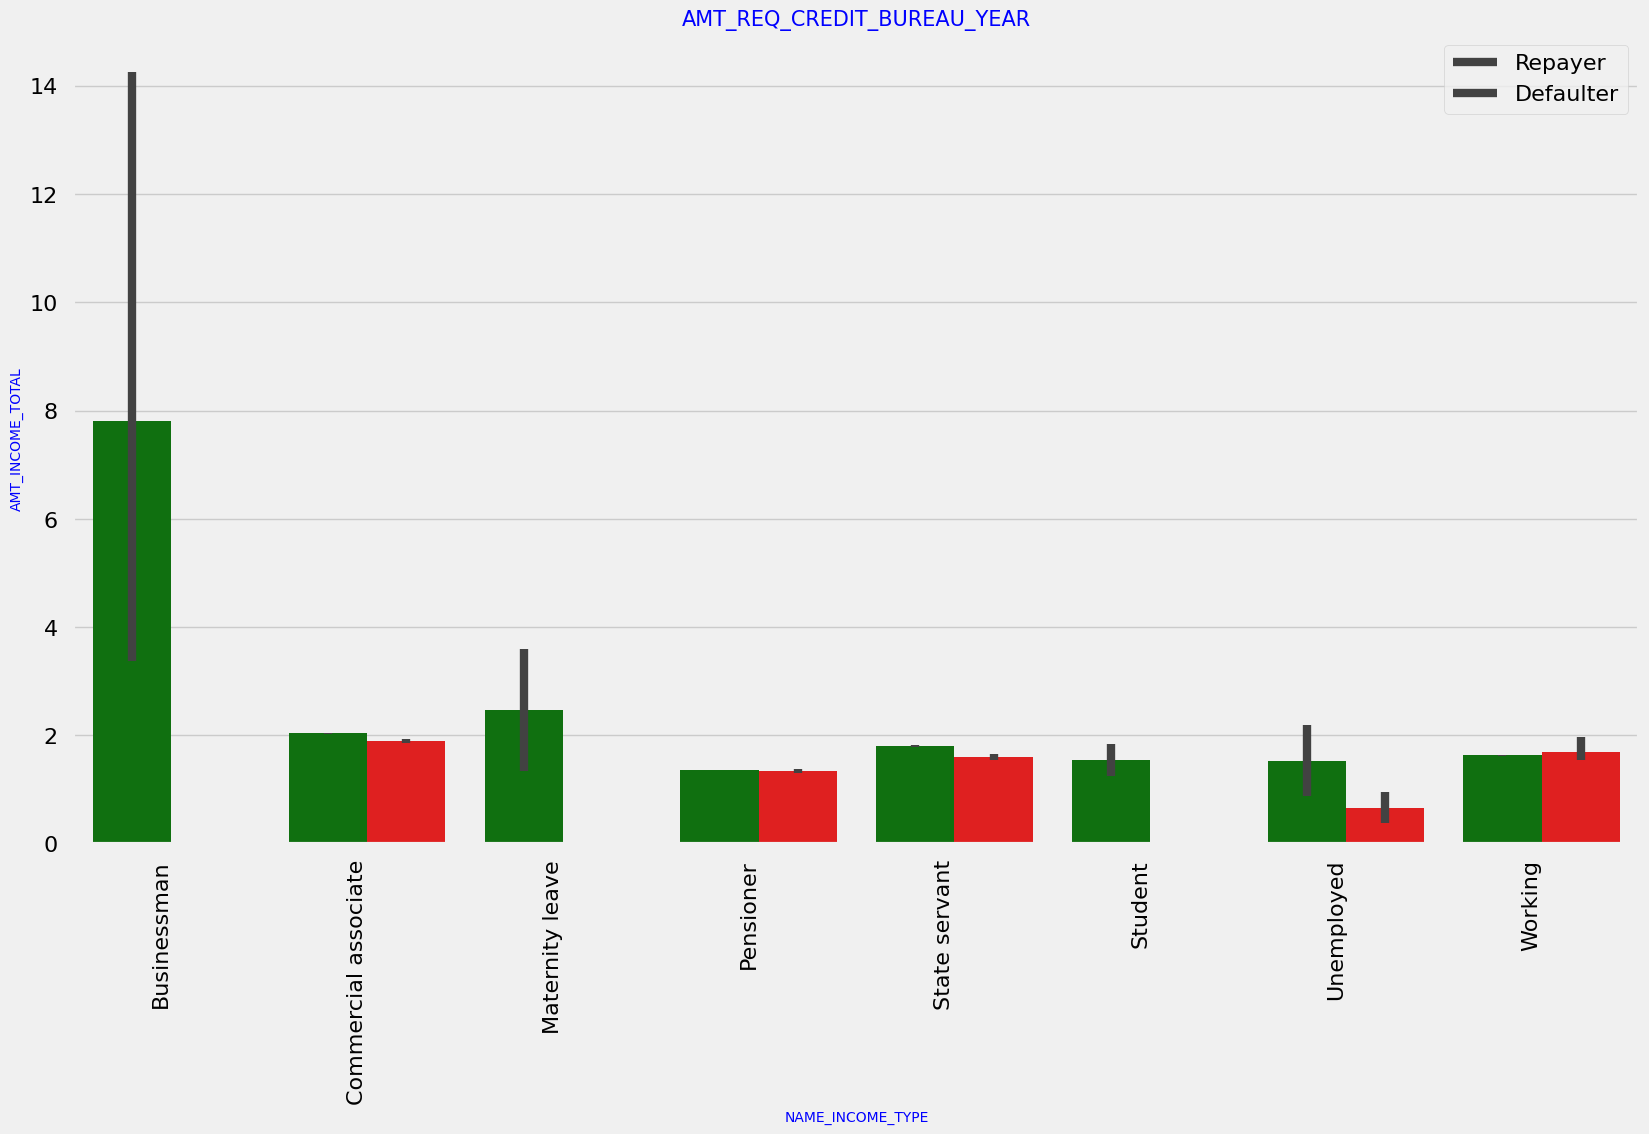

In [ ]:
bivariate_bar("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",applicationDF,"TARGET",(18,10))

Numeric Variables Analysis

In [ ]:
applicationDF.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CRED

In [ ]:
cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
Repayer_df = applicationDF.loc[applicationDF['TARGET']==0, cols_for_correlation] # Repayers
Defaulter_df = applicationDF.loc[applicationDF['TARGET']==1, cols_for_correlation] # Defaulters

### **Correlation between numeric variable**

In [ ]:
corr_repayer = Repayer_df.corr()
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool_))
corr_df_repayer = corr_repayer.unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs()
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_repayer.head(10)

VAR1              VAR2  Correlation
94     AMT_GOODS_PRICE        AMT_CREDIT     0.987312
230    CNT_FAM_MEMBERS      CNT_CHILDREN     0.879860
95     AMT_GOODS_PRICE       AMT_ANNUITY     0.777721
71         AMT_ANNUITY        AMT_CREDIT     0.772166
167      DAYS_EMPLOYED        DAYS_BIRTH     0.626335
70         AMT_ANNUITY  AMT_INCOME_TOTAL     0.450400
93     AMT_GOODS_PRICE  AMT_INCOME_TOTAL     0.376137
47          AMT_CREDIT  AMT_INCOME_TOTAL     0.368792
138         DAYS_BIRTH      CNT_CHILDREN     0.335915
190  DAYS_REGISTRATION        DAYS_BIRTH     0.331705

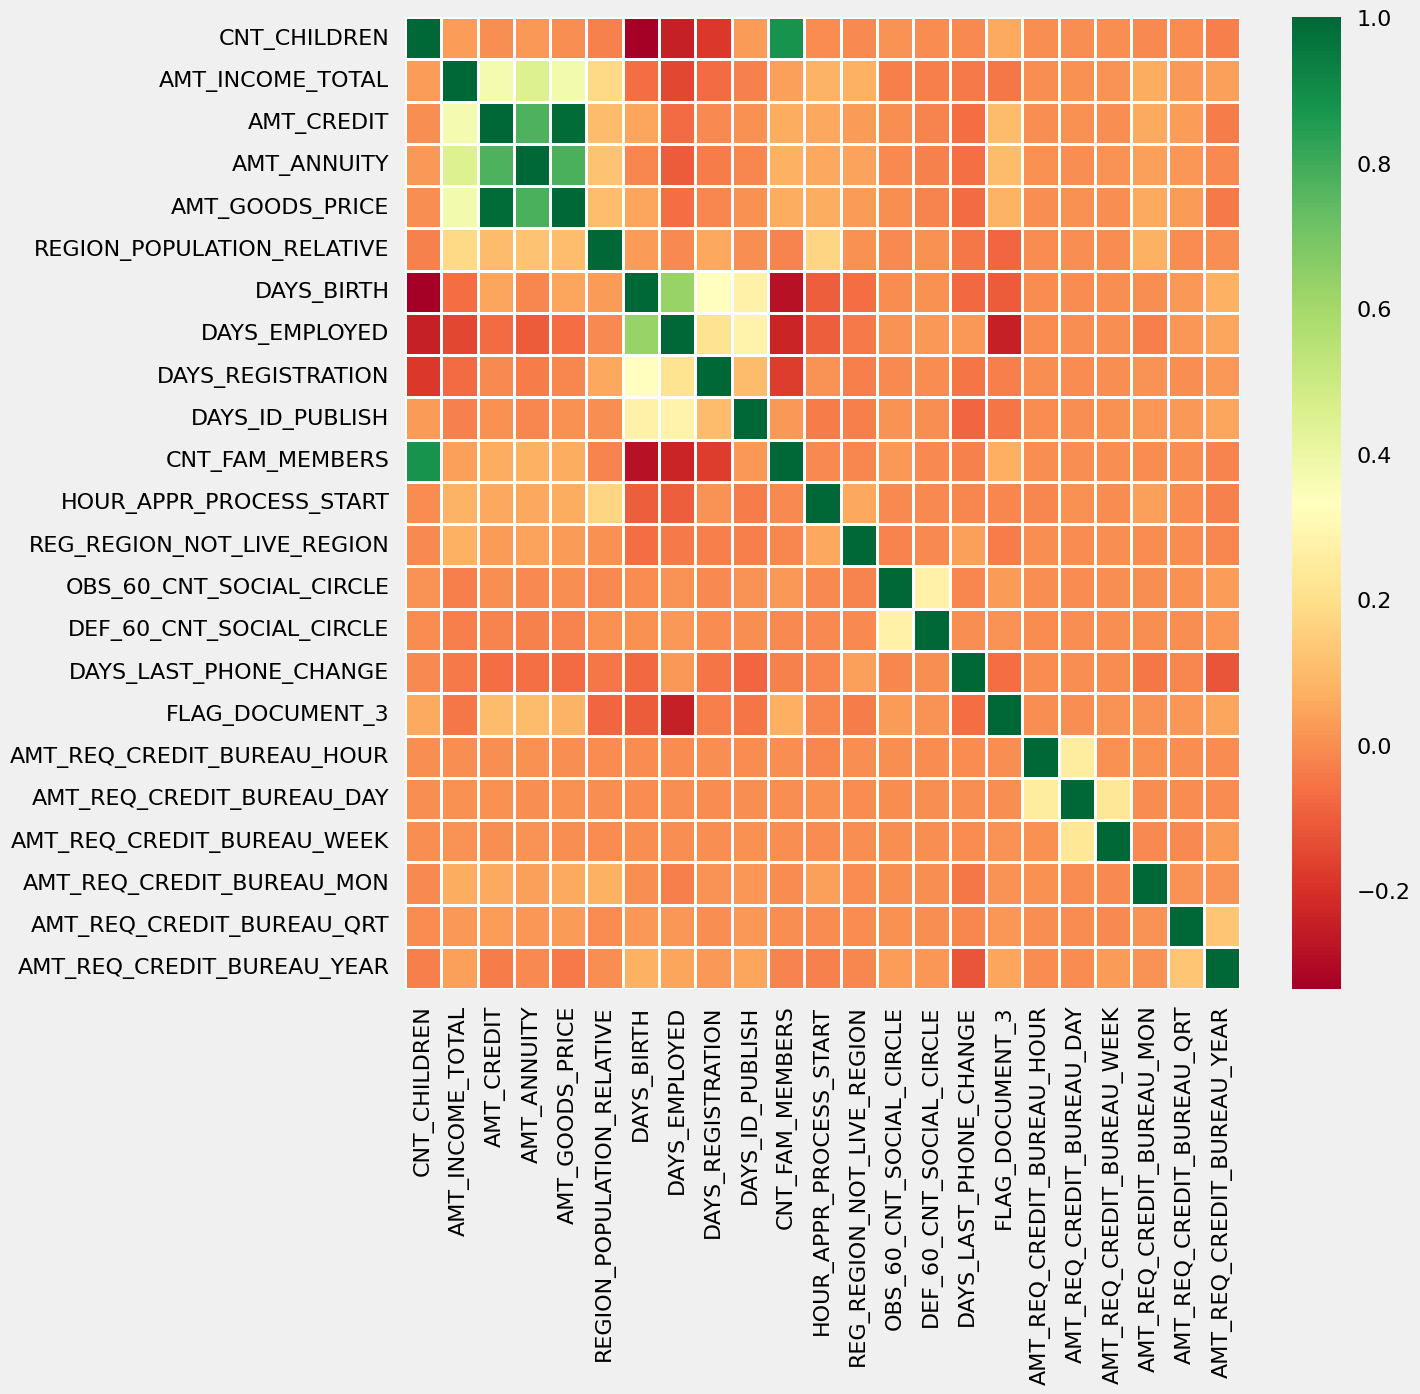

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Repayer_df.corr(), cmap="RdYlGn",annot=False,linewidth =1)

In [ ]:
corr_Defaulter = Defaulter_df.corr()
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape),k=1).astype(np.bool_))
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns =['VAR1','VAR2','Correlation']
corr_df_Defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_df_Defaulter["Correlation"]=corr_df_Defaulter["Correlation"].abs()
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_Defaulter.head(10)

VAR1                        VAR2  Correlation
94             AMT_GOODS_PRICE                  AMT_CREDIT     0.982738
230            CNT_FAM_MEMBERS                CNT_CHILDREN     0.885527
95             AMT_GOODS_PRICE                 AMT_ANNUITY     0.747681
71                 AMT_ANNUITY                  AMT_CREDIT     0.747429
167              DAYS_EMPLOYED                  DAYS_BIRTH     0.582879
190          DAYS_REGISTRATION                  DAYS_BIRTH     0.288884
375            FLAG_DOCUMENT_3               DAYS_EMPLOYED     0.268278
335   DEF_60_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE     0.265619
138                 DAYS_BIRTH                CNT_CHILDREN     0.259069
431  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR     0.258611

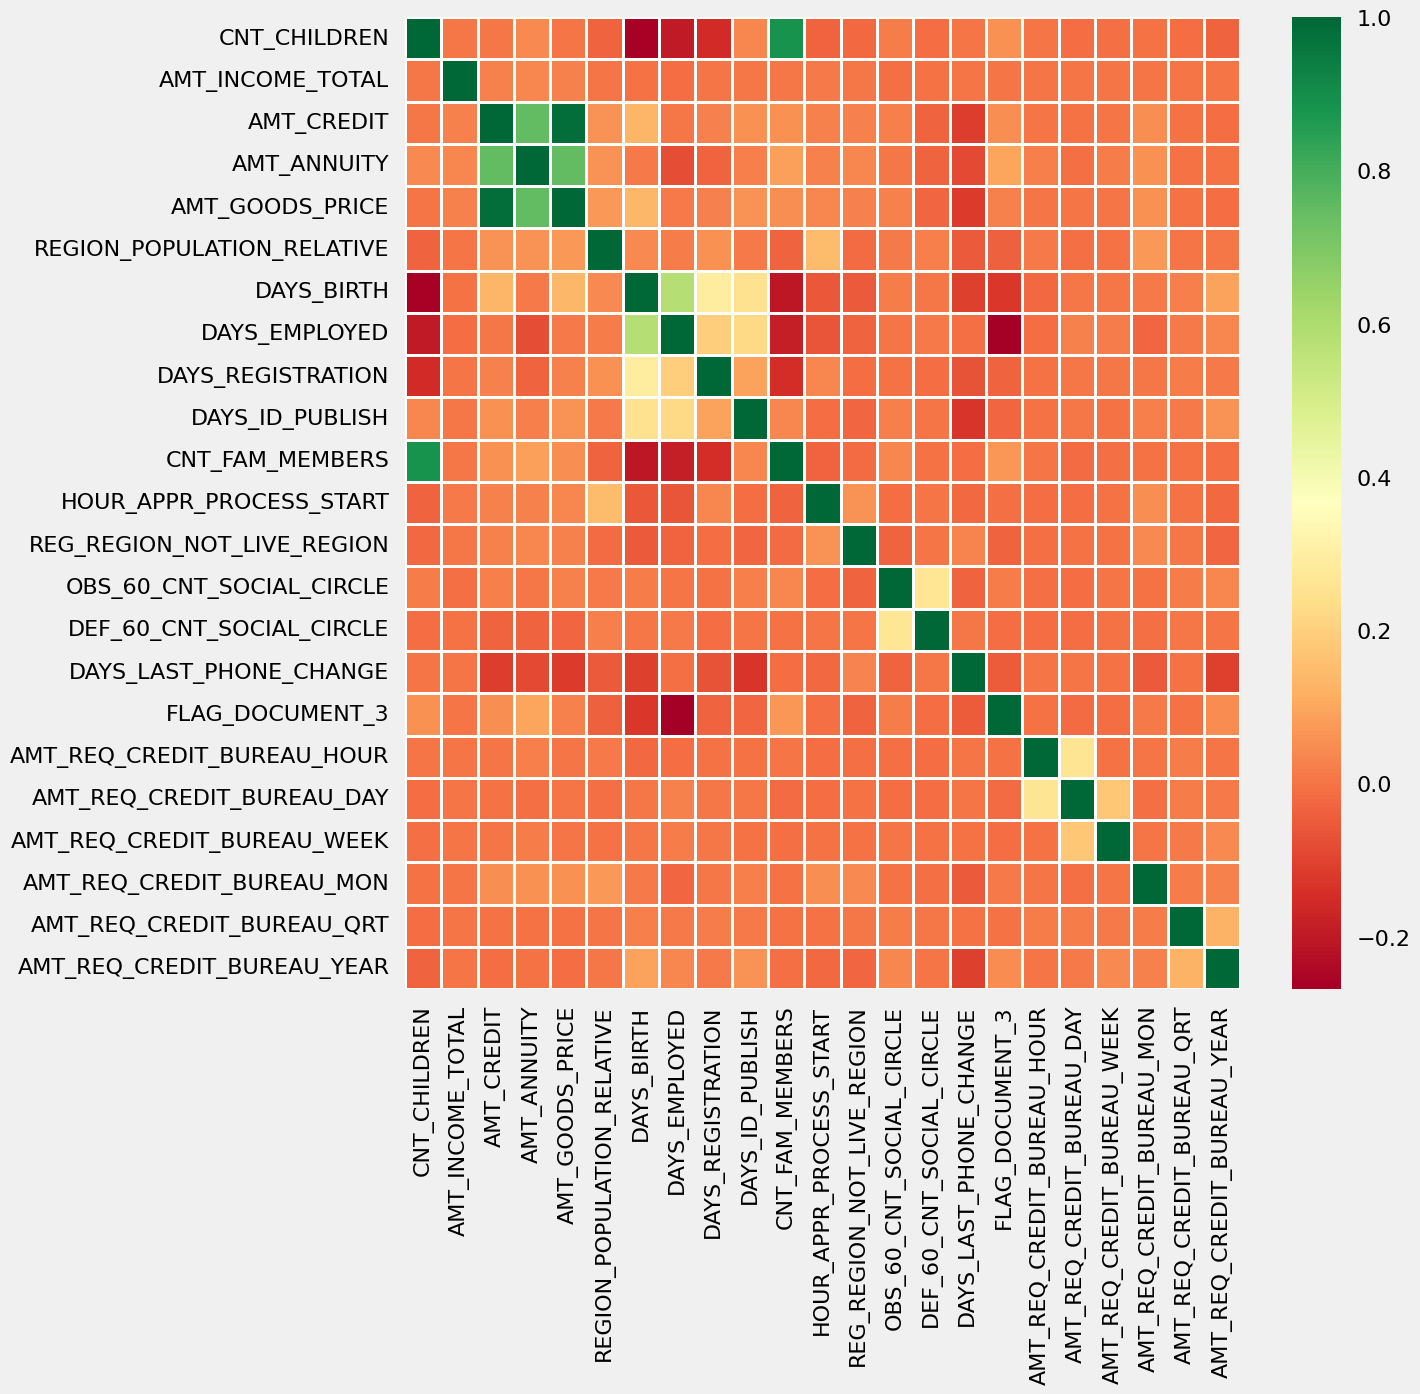

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Defaulter_df.corr(), cmap="RdYlGn",annot=False,linewidth =1)

### **Numerical Univariate Analysis**

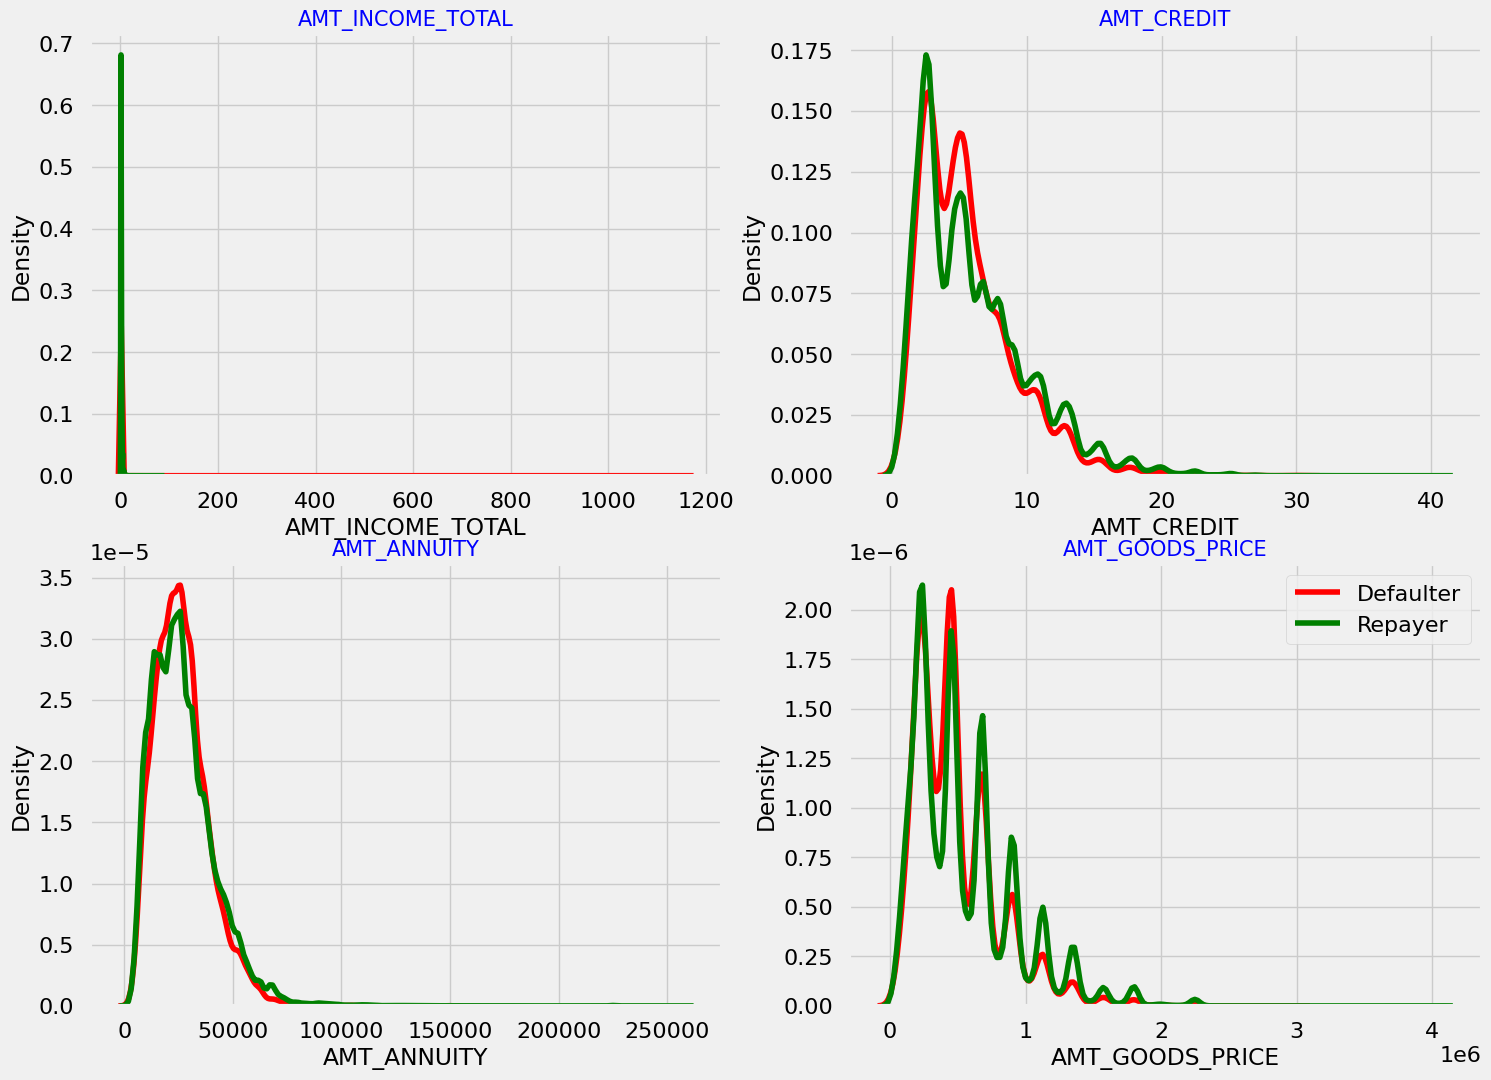

In [ ]:
amount = applicationDF[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_df[i[1]], hist=False, color='r',label ="Defaulter")
    sns.distplot(Repayer_df[i[1]], hist=False, color='g', label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'})

plt.legend()

plt.show()

<Figure size 1500x600 with 0 Axes>

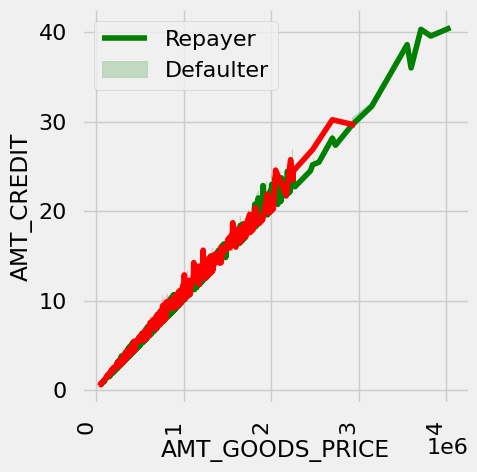

In [ ]:
bivariate_rel('AMT_GOODS_PRICE','AMT_CREDIT',applicationDF,"TARGET", "line", ['g','r'], False,(15,6))

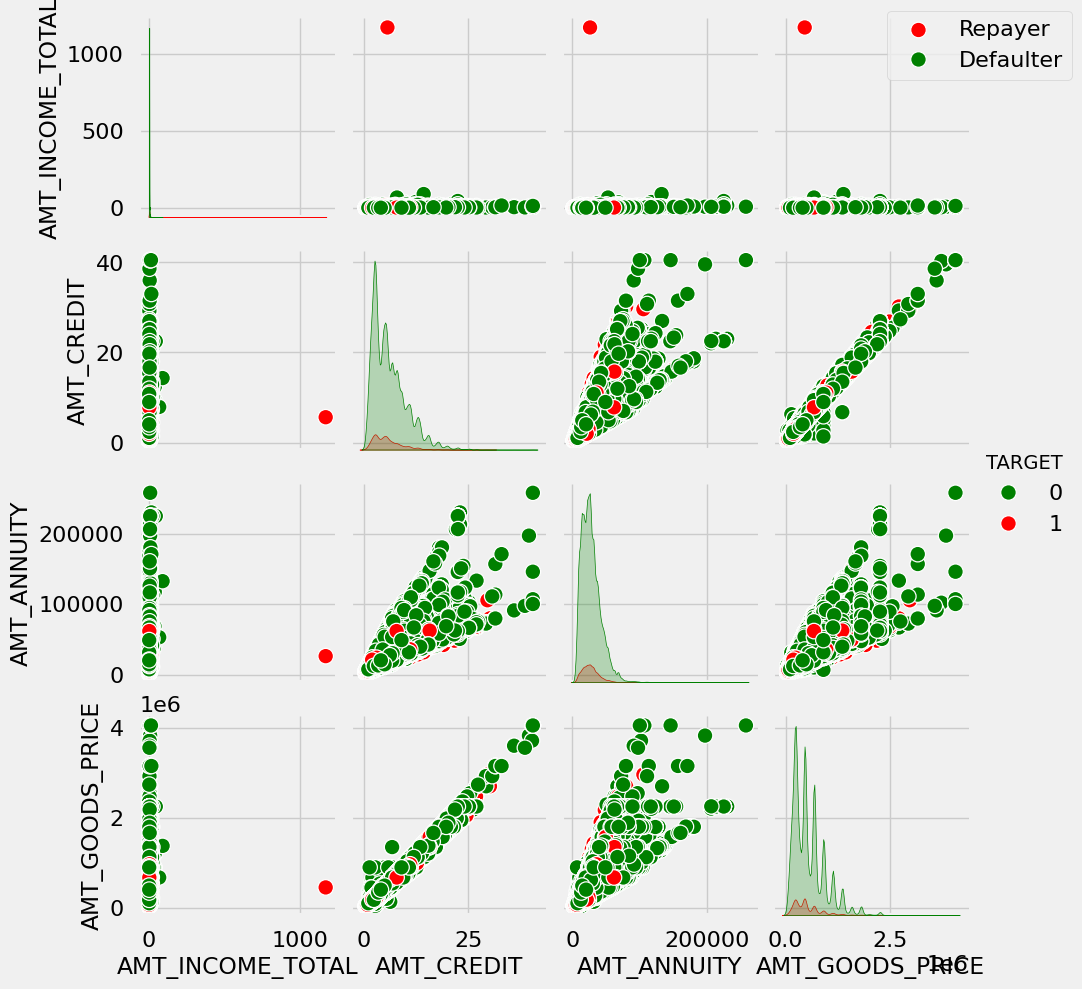

In [ ]:
amount = applicationDF[[ 'AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]
ax= sns.pairplot(amount,hue="TARGET",palette=["g","r"])
ax.fig.legend(labels=['Repayer','Defaulter'])
plt.show()

**5.Merged Dataframes Analysis**

In [ ]:
loan_process_df = pd.merge(applicationDF, previousDF, how='inner', on='SK_ID_CURR')
loan_process_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH        OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR AMT_INCOME_RANGE AMT_CREDIT_RANGE  AGE AGE_GROUP  YEARS_EMPLOYED EMPLOYMENT_YEAR  SK_ID_PREV NAME_CONTRACT_TYPE_y  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL DAYS_DECISION_GROUP
0      100035       0           Cash loans           F            N               Y             0             2.925      6.658920        24592.5           477000.0   Unaccompanied  Commercial associate  Secondary / secondary special        Civil marriage  House / apartment                    0.025164       15280           2668             5266.0             3787                Unknown              2.0                  2.0                         2.0                  WEDNESDAY                     13.0                         0.0                        0.0                         0.0                    0.0                    0.0                     0.0  Business Entity Type 3                       0.0                       0.0                       0.0                       0.0                 -1634.0              1.0                         0.0                        0.0                         0.0                        1.0                        0.0                         5.0        200k-300k        600k-700k   41     40-50               7            5-10     1339797           Cash loans     10526.4225              0.0           0.0            45000.0                    XNA              Refused          138.0                    XNA                 HC         Repeater                 XNA            XNA               XNA  Credit and cash offices               0.0                  XNA          0.0              XNA                      Cash                 NaN             NaN                        NaN            NaN               NaN                        NaN           0.0-400.0
1      100043       0           Cash loans           F            N               Y             2             1.980      6.411735        23157.0           553500.0   Unaccompanied  Commercial associate  Secondary / secondary special               Married  House / apartment                    0.018850       17199            768               63.0              735  Private service staff              4.0                  2.0                         2.0                   THURSDAY                     13.0                         0.0                        0.0                         0.0                    0.0                    0.0                     0.0                   Other                       0.0                       0.0                       0.0                       0.0     

In [ ]:
loan_process_df.shape

(4082, 80)

In [ ]:
loan_process_df.size

326560

In [ ]:
loan_process_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4082 entries, 0 to 4081
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SK_ID_CURR                   4082 non-null   int64   
 1   TARGET                       4082 non-null   int64   
 2   NAME_CONTRACT_TYPE_x         4082 non-null   category
 3   CODE_GENDER                  4082 non-null   category
 4   FLAG_OWN_CAR                 4082 non-null   category
 5   FLAG_OWN_REALTY              4082 non-null   category
 6   CNT_CHILDREN                 4082 non-null   int64   
 7   AMT_INCOME_TOTAL             4082 non-null   float64 
 8   AMT_CREDIT_x                 4082 non-null   float64 
 9   AMT_ANNUITY_x                4081 non-null   float64 
 10  AMT_GOODS_PRICE_x            4080 non-null   float64 
 11  NAME_TYPE_SUITE              4082 non-null   category
 12  NAME_INCOME_TYPE             4082 non-null   category
 13  NAM

In [ ]:
loan_process_df.describe()

SK_ID_CURR       TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE    DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR          AGE  YEARS_EMPLOYED    SK_ID_PREV  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y  DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
count    4082.000000  4082.000000   4082.000000       4082.000000   4082.000000    4081.000000       4.080000e+03                 4082.000000   4082.000000    4082.000000        4082.000000      4082.000000      4082.000000              4082.000000                 4082.000000               4068.000000               4068.000000               4068.000000               4068.000000             4082.000000      4082.000000                 4082.000000                4082.000000                 4082.000000                4082.000000                4082.000000                 4082.000000  4082.000000     4082.000000  4.082000e+03    4082.000000     4.082000e+03  4.082000e+03       4.082000e+03    4081.000000      4.081000e+03  4082.000000         2561.000000     2561.000000                2561.000000    2561.000000       2561.000000                2561.000000
mean   203858.010044     0.086967      0.432386          1.694015      5.788609   26575.433105       5.192821e+05                    0.021032  16193.457374   72227.310877        4924.709456      3071.524498         2.180304                11.931896                    0.012984                  1.562193                  0.154376                  1.545477                  0.105457            -1082.121754         0.738609                    0.002695                   0.004410                    0.031112                   0.243508                   0.309162                    2.592847    43.864772      197.352033  1.924729e+06   13920.988251     1.602917e+05  1.803904e+05       1.695739e+05     894.339133      1.334299e+03    12.239588       346368.044904    13213.635299               27764.024209   73808.193674      79251.053495                   0.304569
std     58637.364864     0.281821      0.751351          0.867600      3.824254   13440.708323       3.498820e+05                    0.013567   4403.359479  143120.986982        3536.095372      1486.862420         0.933897                 3.250961                    0.113218                  2.480079                  0.463322                  2.461735                  0.370328              809.406901         0.439447                    0.051847                   0.066266                    0.183254                   0.865913                   0.678337                    2.148569    12.063576      392.046629  5.358865e+05   12100.387457     2.615928e+05  2.893053e+05       2.564877e+05     784.884196      6.262650e+04    13.640155        80983.920354    70979.668657               97979.686019  147665.681156     151498.832851                   0.460314
min    100035.000000     0.000000      0.000000          0.270000      0.450000    2052.000000       4.500000e+04                    0.000533   7724.000000      13.000000           1.000000         0.000000         1.000000                 2.000000                    0.000000                  0.000000                  0.000000                  0.000000                  0.000000            -3818.000000         0.000000                    0.000000                   0.000000                    0.000000                   0.000000                   0.00

In [ ]:

L0 = loan_process_df[loan_process_df['TARGET']==0] # Repayers
L1 = loan_process_df[loan_process_df['TARGET']==1] # Defaulters

### **Plotting Contract Status vs purpose of the loan:**

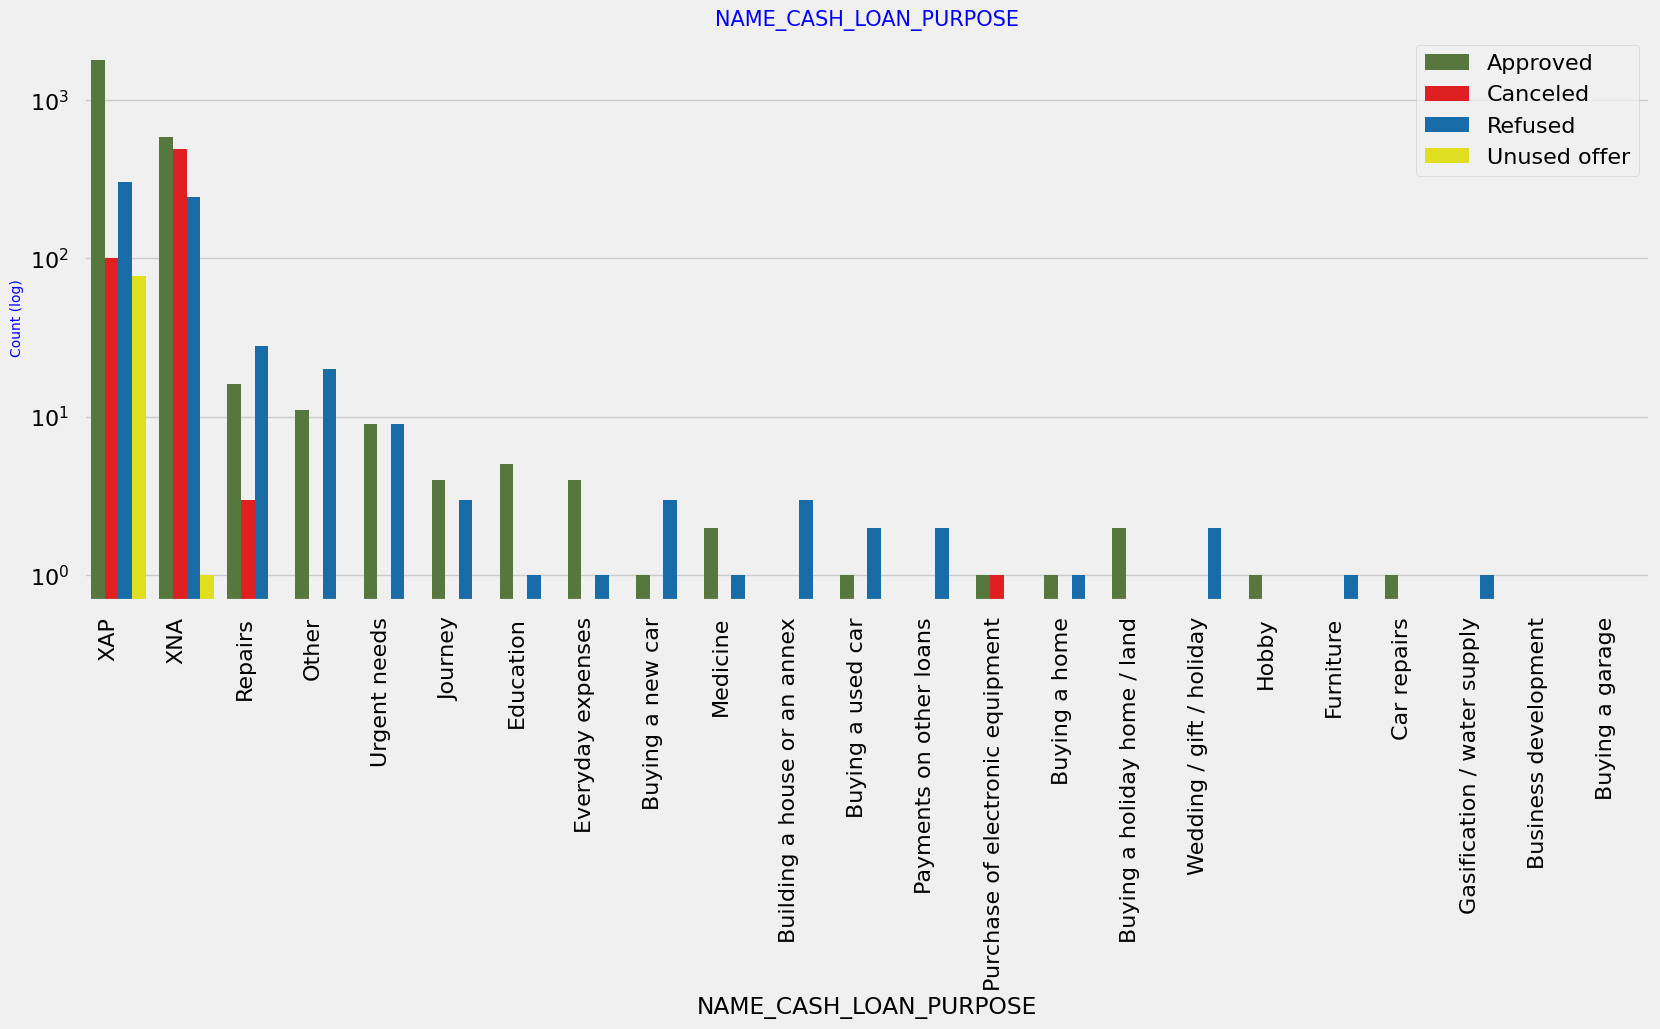

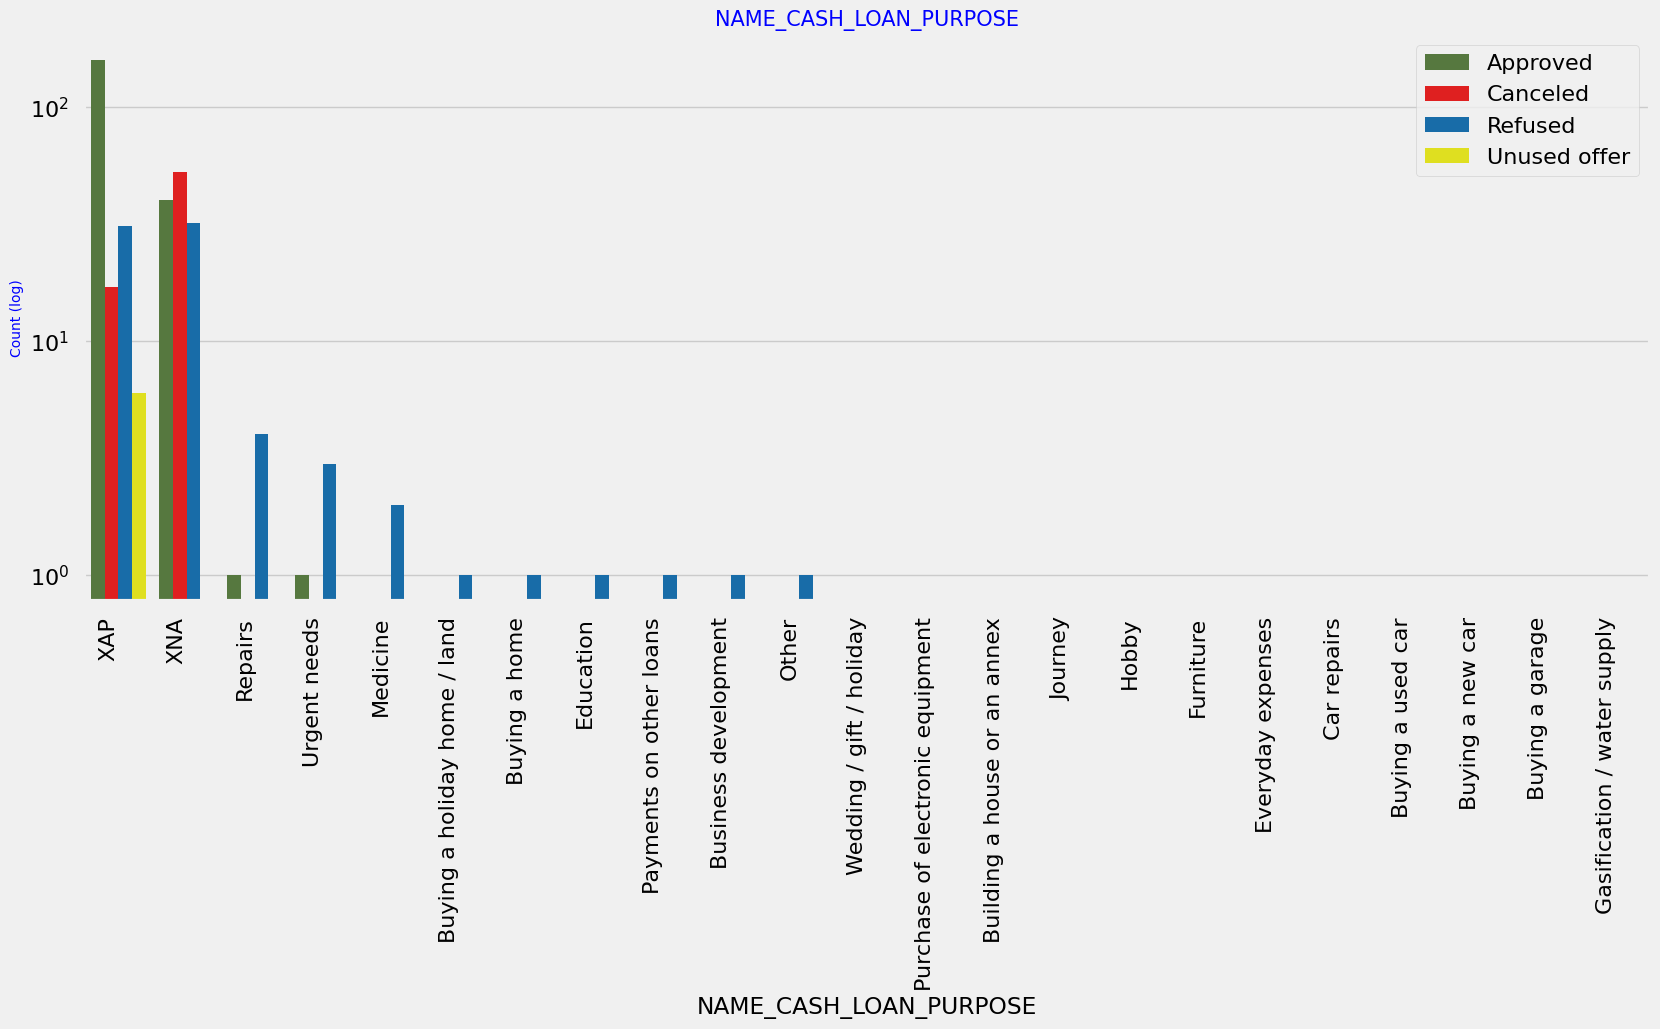

In [ ]:
univariate_merged("NAME_CASH_LOAN_PURPOSE",L0,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

univariate_merged("NAME_CASH_LOAN_PURPOSE",L1,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

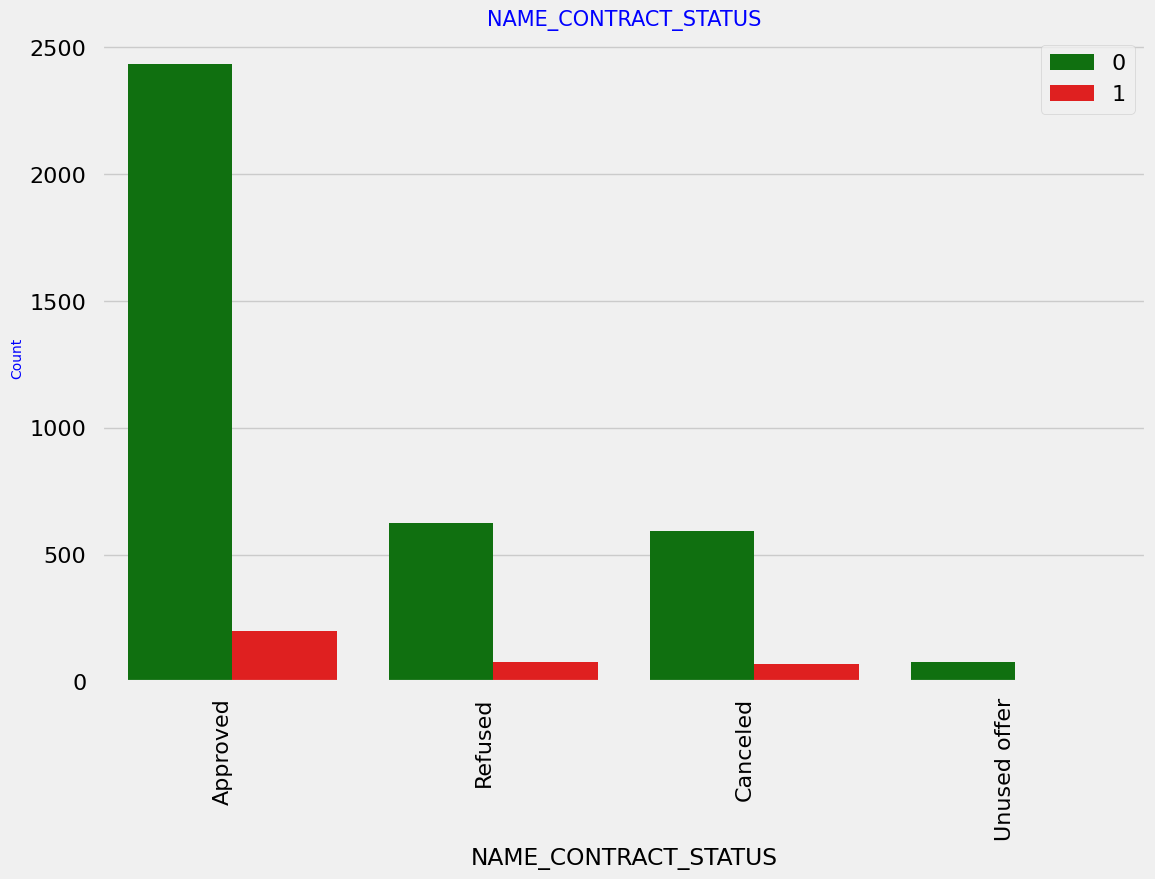

                             Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0         2431     92.36%
                     1          201      7.64%
Canceled             0          594     89.46%
                     1           70     10.54%
Refused              0          624     88.89%
                     1           78     11.11%
Unused offer         0           78     92.86%
                     1            6      7.14%


In [ ]:
univariate_merged("NAME_CONTRACT_STATUS",loan_process_df,"TARGET",['g','r'],False,(12,8))
g = loan_process_df.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([g.value_counts(),round(g.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" # adding percentage symbol in the results for understanding
print (df1)

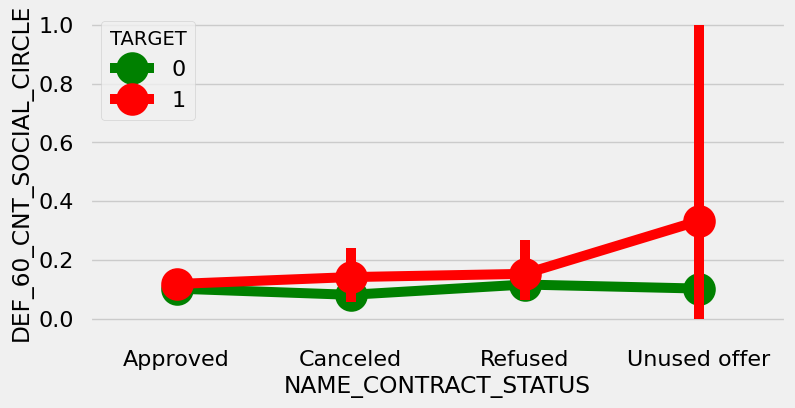

In [ ]:
merged_pointplot("NAME_CONTRACT_STATUS",'DEF_60_CNT_SOCIAL_CIRCLE')

## **Conclusions**


.90% of the previously cancelled client have actually repayed the loan. Record
the reason for cancellation which might help the bank to determine and negotiate terms with these repaying customers in future for increase business opportunity.

.88% of the clients who were refused by bank for loan earlier have now turned into a repaying client. Hence documenting the reason for rejection could mitigate the business loss and these clients could be contacted for further loans.
